<a href="https://colab.research.google.com/github/bourasmohamedyoucefenssea/Machine_Learning_Projects/blob/main/Final_Deep_learning_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 01: Explaratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.metrics import RootMeanSquaredError
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.layers import Bidirectional, GRU, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [4]:
!git clone https://github.com/bourasmohamedyoucefenssea/Natural-Language-Processing.git
%cd Natural-Language-Processing
data = pd.read_excel('data.xlsx')
data

Cloning into 'Natural-Language-Processing'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 29.13 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Natural-Language-Processing


date_time  demand_new_south_wales  price_new_south_wales  \
0      2023-01-01 00:00:00                 6906.63                 140.40   
1      2023-01-01 00:05:00                 6906.63                 140.40   
2      2023-01-01 00:10:00                 6854.28                 133.96   
3      2023-01-01 00:15:00                 6856.32                 120.00   
4      2023-01-01 00:20:00                 6796.27                 118.99   
...                    ...                     ...                    ...   
105116 2023-12-31 23:40:00                 6649.50                  57.98   
105117 2023-12-31 23:45:00                 6631.86                  57.98   
105118 2023-12-31 23:50:00                 6649.77                  57.98   
105119 2023-12-31 23:55:00                 6634.16                  57.98   
105120 2024-01-01 00:00:00                 6587.63                  57.98   

        demande_queensland  price_queensland  demand_south_australia  \
0                  5718.46            139.73                 1443.65   
1                  5718.46            139.73                 1443.65   
2                  5721.47            136.00                 1438.16   
3                  5691.56            121.80                 1433.89   
4                  5718.89            121.61                 1444.12   
...                    ...               ...                     ...   
105116             6384.64             85.55                 1339.67   
105117             6374.79             85.55                 1296.45   
105118             6386.35             85.75                 1301.21   
105119             6296.06             85.55                 1300.49   
105120             6294.38             85.55                 1296.67   

        price_south_australia  demand_tasmania  price_tasmania  \
0                      127.57          1001.74          450.10   
1                      127.57          1001.74          450.10   
2                      122.85           958.14          117.44   
3                      111.14           957.12          105.40   
4                      110.25           948.37          105.12   
...                       ...              ...             ...   
105116                  55.11          1052.62           85.28   
105117                  54.59          1058.23           85.28   
105118                  54.17          1055.42           85.28   
105119                  53.75          1051.04           85.28   
105120                  54.02          1035.11           85.28   

        demand_victoria  price_victoria  
0               4676.57          129.51  
1               4676.57          129.51  
2               4722.43          124.72  
3               4672.63          111.64  
4               4616.49          110.75  
...                 ...             ...  
105116          4070.49           51.94  
105117          4035.14           52.23  
105118          4039.52           51.83  
105119          4036.91           51.43  
105120          4024.55           51.43  

[105121 rows x 11 columns]

The dataset includes time series data on electric power demand and prices throughout 2023, with data points collected every 5 minutes in the five Australian states:
New South Wales, Victoria, South Australia, Queensland and Tasmania. For each of these states, there are separate columns showing both price and demand.

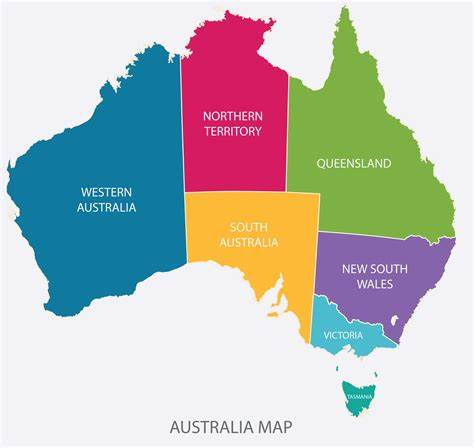

In [5]:
data['date_time'] = pd.to_datetime(data['date_time'])

## Globale Vision of the Dataset

### Descriptive Statistics

In [6]:
data_overview = {
    "Number of Records": data.shape[0],
    "Number of Features": data.shape[1],
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Date Range": (data['date_time'].min(), data['date_time'].max()),
    "Frequency of Data Points": data['date_time'].diff().value_counts().idxmax()
}
data_overview

{'Number of Records': 105121,
 'Number of Features': 11,
 'Data Types': date_time                 datetime64[ns]
 demand_new_south_wales           float64
 price_new_south_wales            float64
 demande_queensland               float64
 price_queensland                 float64
 demand_south_australia           float64
 price_south_australia            float64
 demand_tasmania                  float64
 price_tasmania                   float64
 demand_victoria                  float64
 price_victoria                   float64
 dtype: object,
 'Missing Values': date_time                 0
 demand_new_south_wales    0
 price_new_south_wales     0
 demande_queensland        0
 price_queensland          0
 demand_south_australia    0
 price_south_australia     0
 demand_tasmania           0
 price_tasmania            0
 demand_victoria           0
 price_victoria            0
 dtype: int64,
 'Date Range': (Timestamp('2023-01-01 00:00:00'),
  Timestamp('2024-01-01 00:00:00')),
 'Frequency 

### Data set overview
- Number of records** : The dataset contains 105,121 rows, where each row represents a single data point.
- Number of Features**: There are 11 columns or features in the dataset. These features include dates, demand and price data for different regions in Australia.

### Description of Features
- Data Types** :
  - `date_time`: This feature is of type `datetime64[ns]`, indicating that it contains date and time information accurate to the nanosecond.
  - `demand_new_south_wales`, `demand_queensland`, `demand_south_australia`, `demand_tasmania`, `demand_victoria`: These features are of type `float64`, representing the demand for electricity in the respective states.
  - `price_new_south_wales`, `price_queensland`, `price_south_australia`, `price_tasmania`, `price_victoria`: Similarly, these are `float64` types, showing electricity prices in the respective states.

### Missing values
- The dataset has no missing values for all features, including date-time data and demand and price data for all regions listed. This indicates a well-maintained dataset, potentially ready for analysis without the need for imputation.

### Time Range and Granularity
- Date Range** : The data covers exactly one year, from January 1, 2023 to January 1, 2024. This complete coverage enables analysis of seasonal patterns, trends and potential anomalies in electricity demand and price over an entire year.
- Data Point Frequency** : Data are recorded every 5 minutes, indicated by a `Timedelta` of '0 days 00:05:00'. This high-frequency recording provides detailed temporal resolution, suitable for time series analysis, including load forecasting, price fluctuation studies .

### Analytical considerations:
 This dataset offers a rich source for various analytical and predictive modeling tasks, such as :
- Time Series Analysis**: With high-frequency time-stamped data, analyzing time series trends, seasonality and cyclical patterns in both demand and prices across different regions becomes feasible.
- Regional Comparative Analysis** : The dataset enables comparisons of demand and price trends across different Australian states, potentially revealing regional disparities, efficiencies or impacts of local policies.
- Forecasting Models**: Use historical demand and price data to forecast future trends. Machine learning models such as ARIMA, SARIMA or LSTM,GRU networks could be applied for forecasting.
- Anomaly Detection**: Identify unusual patterns or outliers in energy demand or pricing, which could indicate system faults, extraordinary event-driven demand or pricing errors.

In [7]:
data['total_demand'] = data[['demand_new_south_wales', 'demande_queensland', 'demand_south_australia',
                             'demand_tasmania', 'demand_victoria']].sum(axis=1)
data['average_price'] = data[['price_new_south_wales', 'price_queensland', 'price_south_australia',
                              'price_tasmania', 'price_victoria']].mean(axis=1)
aggregated_stats = data[['total_demand', 'average_price']].describe()
aggregated_stats

total_demand  average_price
count  105121.000000  105121.000000
mean    20565.634852      75.439903
std      3349.400529     160.864963
min     10500.040000    -368.858000
25%     18300.560000      25.138000
50%     20172.930000      63.358000
75%     22702.870000     104.868000
max     32320.710000    9395.762000

**Interpretation:**

For the "total_request" variable:
- **Average**: The average value of the variable "total_demand" is approximately 20,565.635. This represents the typical or average value of total demand.

- **Standard deviation**: The standard deviation of the "total_demand" variable is approximately 3,349.401. This measures the dispersion of the data in relation to the mean. A higher standard deviation indicates greater variability in aggregate demand in the states.

- Minimum**: The minimum value in the "total_demand" variable is around 10,500,040. This is the lowest value observed in the dataset.

- Percentiles (25%, 50%, 75%)**: These percentiles provide information on the distribution of the data.
  - 25th percentile (25%)** : The 25th percentile value of the "total_request" variable is approximately 18,300.560. This means that 25% of the data is below this value.
  - 50th percentile (50%)** : The median value of the "total_request" variable is around 20,172.930. This is the central value when the data is sorted.
  - 75th percentile (75%): The 75th percentile value of the "total_request" variable is approximately 22,702.870. This means that 75% of the data is below this value.

- Maximum**: The maximum value in the "total_demand" variable is around 32,320.710. This is the highest value observed in the data set.

For the "average_price" variable:
- **Average**: The mean value of the "average_price" variable is approximately 75,440. This represents the average or typical price.

- Standard deviation**: The standard deviation of the "prix_moyen" variable is approximately 160.865. This measures the dispersion of the data in relation to the mean. A higher standard deviation indicates greater variability in the data.

- **Minimum**: The minimum value in the "average_price" variable is approximately -368.858. This is the lowest price observed in the data set, and is negative, which may be unusual for a price variable.

- Percentiles (25%, 50%, 75%)** :
  - 25th percentile(25%)**: The 25th percentile value of the "prix_moyen" variable is approximately 25.138. This means that 25% of the data have prices below this value.
  - 50th percentile (50%)** : The median value of the "prix_moyen" variable is approximately 63.358. This is the central value when the data is sorted.
  - 75th percentile (75%)** : The 75th percentile value of the "average_price" variable is approximately 104.868. This means that 75% of the data have prices below this value.

- Maximum** : The maximum value in the "average_price" variable is around 9,395.762. This is the highest price observed in the data set, and is well above average, indicating the possible presence of outliers in the data.

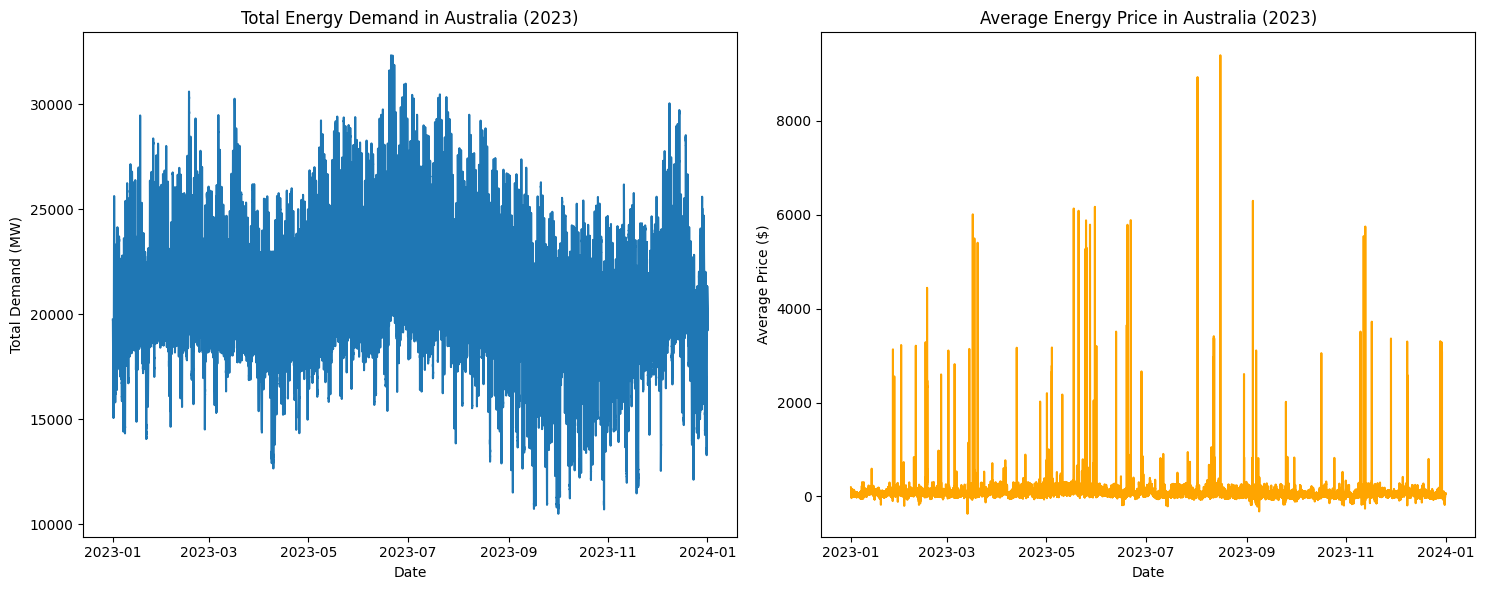

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(data['date_time'], data['total_demand'])
plt.title('Total Energy Demand in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.subplot(1, 2, 2)
plt.plot(data['date_time'], data['average_price'], color='orange')
plt.title('Average Energy Price in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

**Interpretation**:

Total energy demand in Australia (2023) : The graph on the left represents total energy demand in megawatts (MW). The vertical axis represents total demand in MW, and the horizontal axis represents the time of year from January 2023 to early 2024. The graph shows fluctuations in energy demand, with peaks that appear to exceed 30,000 MW. There are also notable troughs down to around 15,000 MW. Demand appears to be seasonal, with higher peaks likely in winter and summer, when heating and cooling needs are greatest, and lower demand in the transitional seasons.

Average energy price in Australia (2023): The graph on the right shows the average price of energy in Australian dollars. The vertical axis represents the price, and the horizontal axis corresponds to the same period as the first graph. This graph shows significant price volatility, with numerous peaks, some reaching over $7,000. It seems that the price of energy is not directly correlated with the total demand observed in the graph on the left, as price peaks do not always correspond to demand peaks.

**Interpretation**:

In [9]:
data_daily_demand = data.resample('D', on='date_time')['total_demand'].sum()
data_weekly_demand = data.resample('W', on='date_time')['total_demand'].sum()
data_daily_price = data.resample('D', on='date_time')['average_price'].mean()
data_weekly_price = data.resample('W', on='date_time')['average_price'].mean()
daily_data = pd.DataFrame({
    'Daily Demand': data_daily_demand,
    'Daily Price': data_daily_price,
})
weekly_data = pd.DataFrame({
    'Weekly Price': data_weekly_price,
    'Weekly Demand': data_weekly_demand,
})

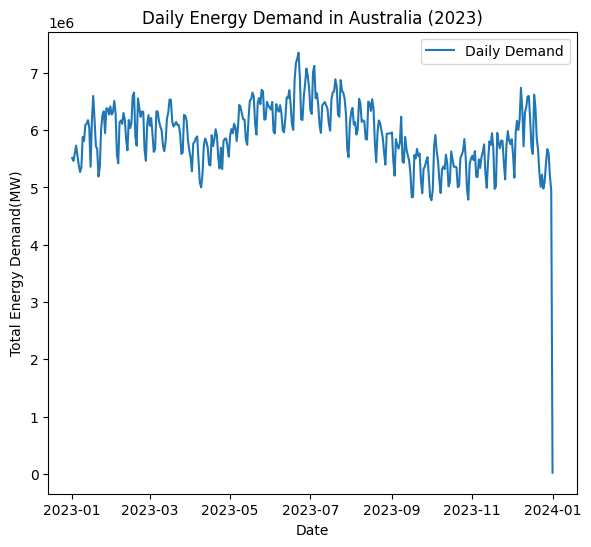

In [10]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(daily_data.index, daily_data['Daily Demand'], label='Daily Demand')
plt.title('Daily Energy Demand in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Total Energy Demand(MW)')
plt.legend()

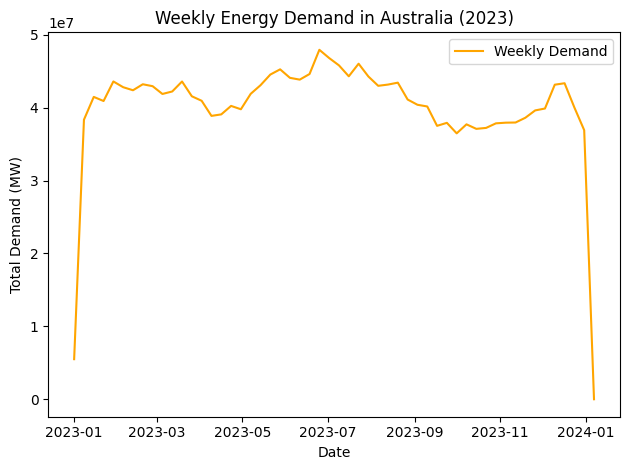

In [11]:
plt.subplot(1,1, 1)
weekly_demand_plot = weekly_data['Weekly Demand'].dropna()
plt.plot(weekly_demand_plot.index, weekly_demand_plot, label='Weekly Demand', color='orange')
plt.title('Weekly Energy Demand in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.legend()
plt.tight_layout()
plt.show()

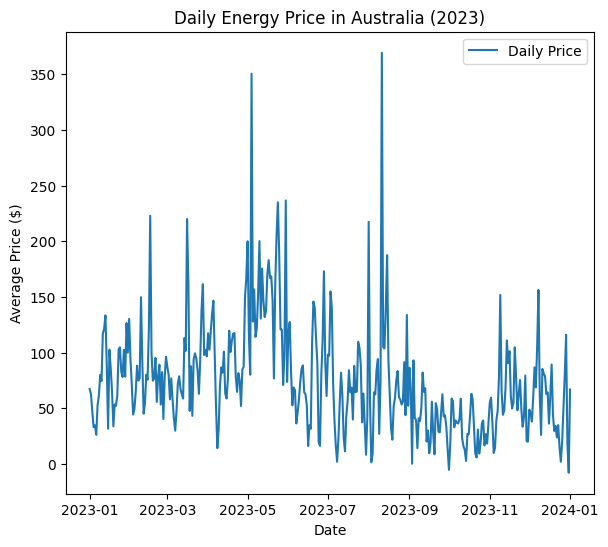

In [12]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(daily_data.index, daily_data['Daily Price'], label='Daily Price')
plt.title('Daily Energy Price in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend()

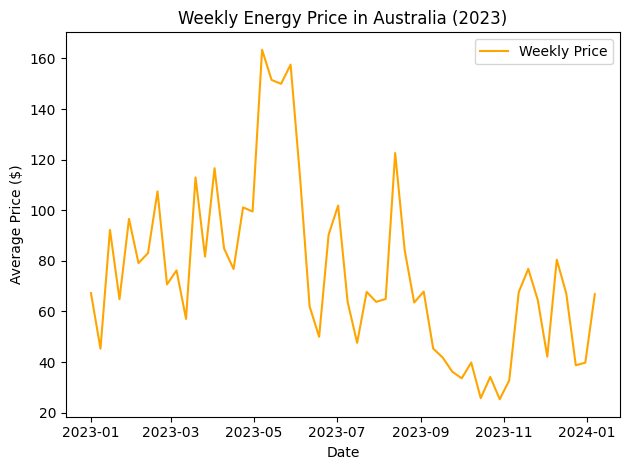

In [13]:
plt.subplot(1, 1, 1)
weekly_price_plot = weekly_data['Weekly Price'].dropna()
plt.plot(weekly_price_plot.index, weekly_price_plot, label='Weekly Price', color='orange')
plt.title('Weekly Energy Price in Australia (2023)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

### Temporal Characteristics Analysis "Energy Demand"



#### Trend Analysis



In [14]:
data.set_index('date_time', inplace=True)

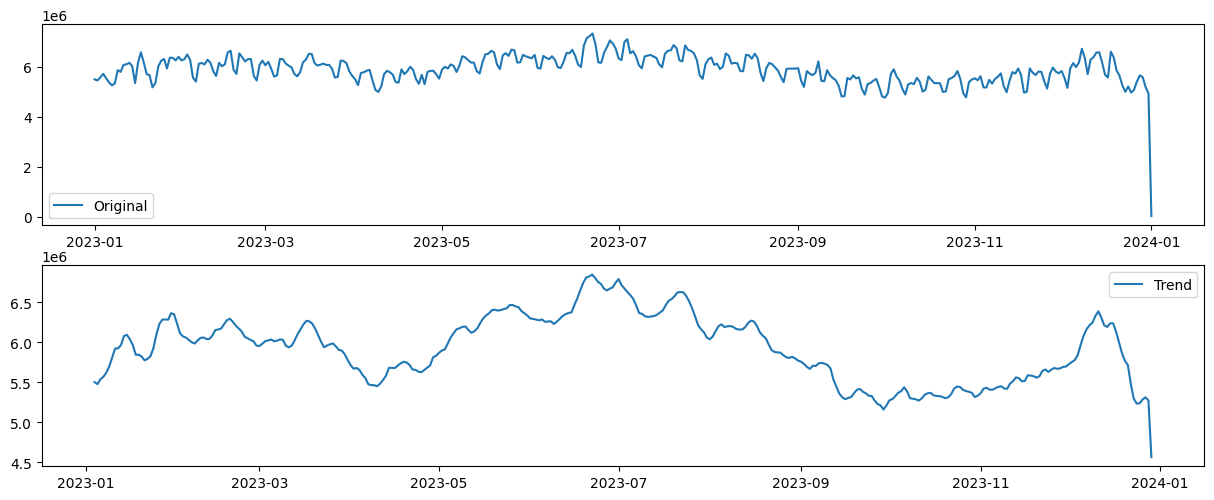

In [15]:
daily_data = data.resample('D').sum()
decomposition = seasonal_decompose(daily_data['total_demand'], model='additive')
plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(daily_data['total_demand'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

#### Seasonality Analysis

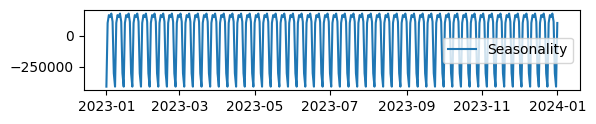

In [16]:
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

#### Residuals Analysis

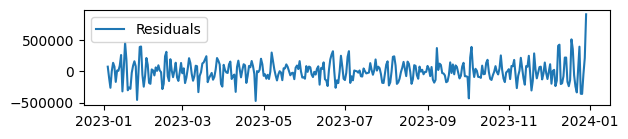

In [17]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Autocorrelation Analysis

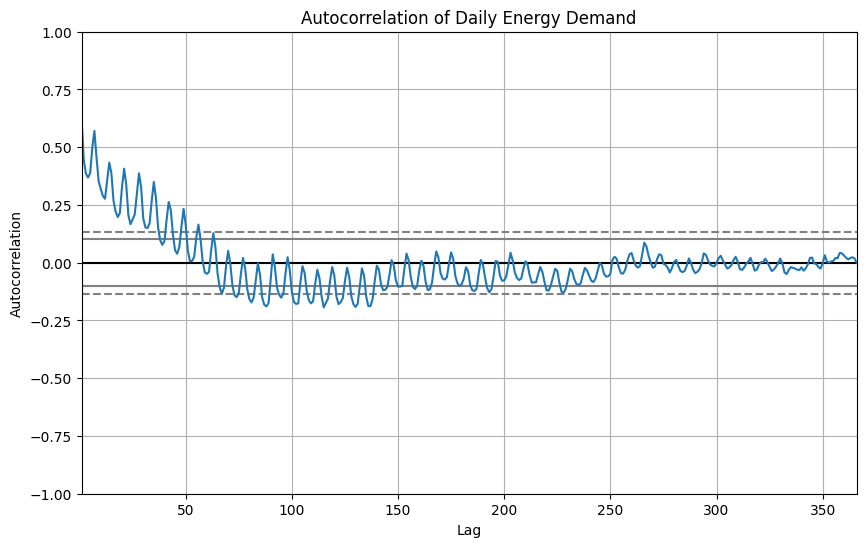

In [18]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(daily_data['total_demand'])
plt.title('Autocorrelation of Daily Energy Demand')
plt.show()

### Temporal Characteristics Analysis "average price"



#### Trend Analysis


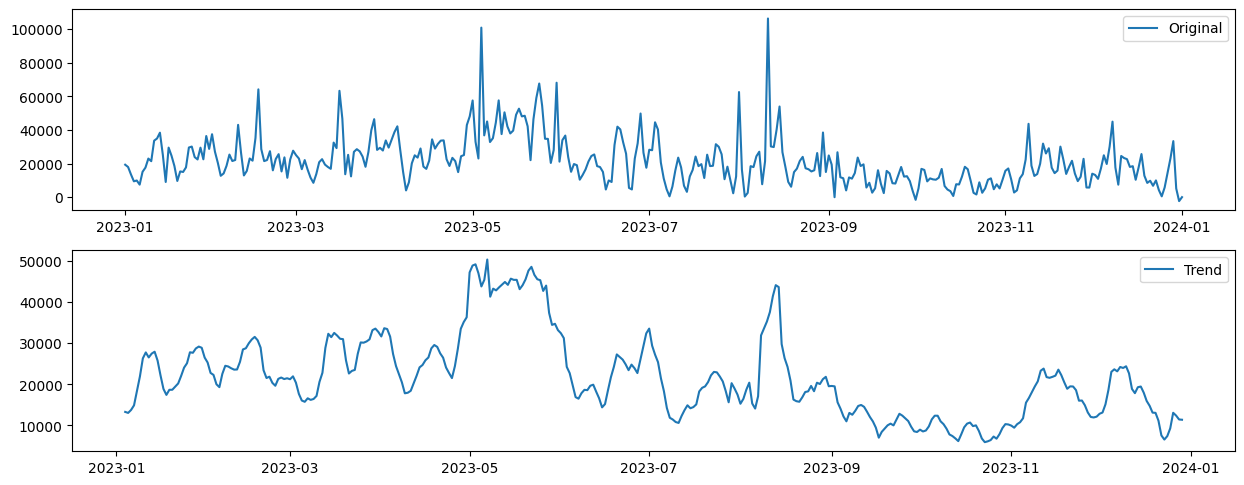

In [19]:
daily_data = data.resample('D').sum()
decomposition = seasonal_decompose(daily_data['average_price'], model='additive')
plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(daily_data['average_price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

**Interpretation**:

 The chart shows the original time series of energy prices, with values ranging from $0 to $100,000, and the trend of these prices over time, smoothed to eliminate short-term fluctuations. The trend reveals the underlying changes in energy prices without the daily peaks and troughs that are visible in the original series.

#### Seasonality Analysis

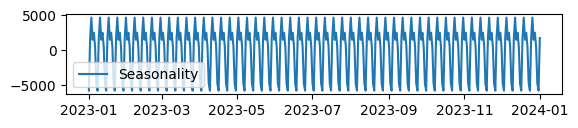

In [20]:
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

**Interpretation**:

The graph illustrates the seasonal component of the time series, showing repetitive patterns or short-term cycles. Seasonality is very regular, indicating repeated patterns in energy consumption, perhaps linked to weekly habits or industrial cycles.

#### Residuals Analysis

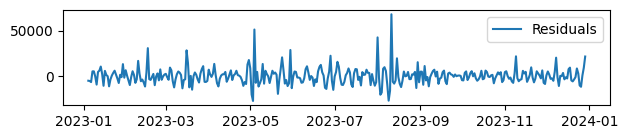

In [21]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Interpretation**:

This graph shows random fluctuations around zero, indicating that trends and seasonality capture much of the movement in energy prices.

#### Autocorrelation Analysis


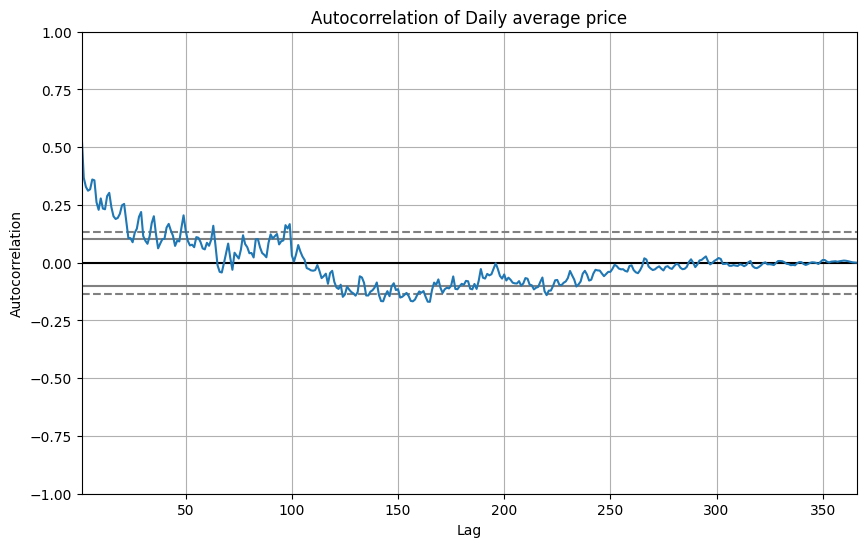

In [22]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(daily_data['average_price'])
plt.title('Autocorrelation of Daily average price')
plt.show()

**Interpretation**:

Autocorrelation measures the relationship between series values at different time intervals (lags).
A rapid decline to zero indicates that there is little correlation between prices on consecutive days beyond the immediate effects of trend and seasonality.
The fact that autocorrelation remains around zero for longer lags suggests that there is little predictable long-term correlation in energy prices, but considerable short-term autocorrelation after allowing for trend and seasonality.

### Outlier Detection

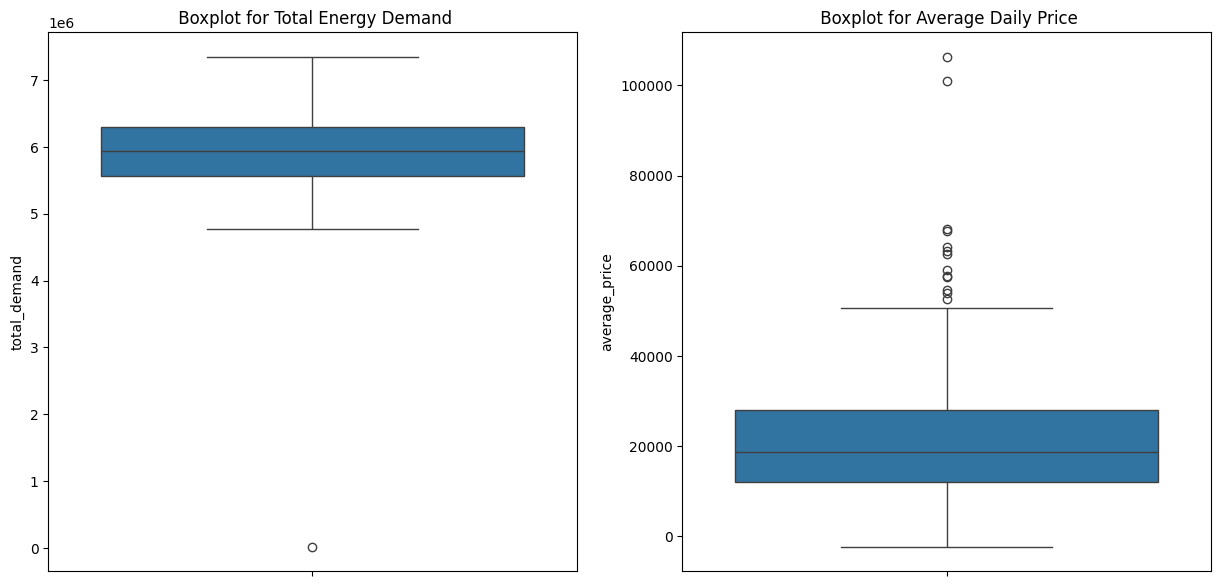

In [23]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(daily_data['total_demand'])
plt.title(" Boxplot for Total Energy Demand")

plt.subplot(1, 2, 2)
sns.boxplot(daily_data['average_price'])
plt.title(" Boxplot for Average Daily Price")
plt.show()

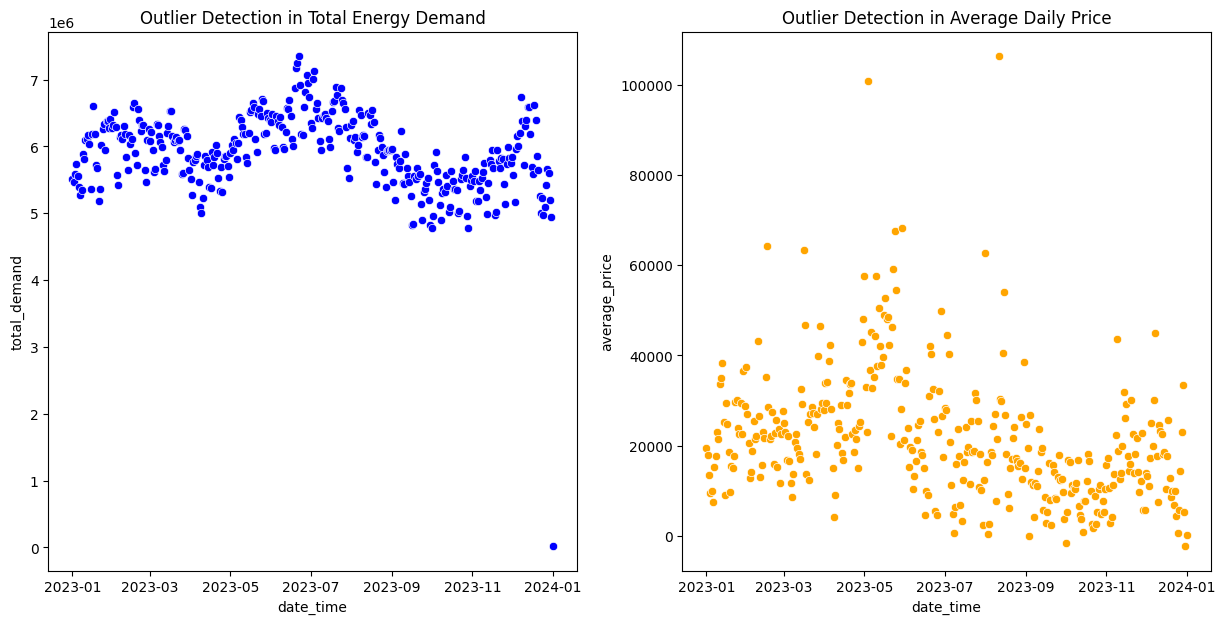

In [24]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=daily_data, x=daily_data.index, y='total_demand', color="blue")
plt.title("Outlier Detection in Total Energy Demand")

plt.subplot(1, 2, 2)
sns.scatterplot(data=daily_data, x=daily_data.index, y='average_price', color="orange")
plt.title("Outlier Detection in Average Daily Price")
plt.show()

**Interpretation**:

Boxplot for total energy demand: This graph shows the distribution of energy demand. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box shows the median. The "whiskers" extend to the highest and lowest values that are not considered outliers, and the individual points represent the outliers.
Boxplot for average daily price: This shows more significant variability in prices, with a number of extreme outliers. Prices also have a lower median relative to the data range, suggesting that prices are generally lower with occasional spikes.
Outlier detection graphs :

Detecting outliers in total energy demand: This scatter plot shows energy demand over time and highlights outliers. It can be seen that most of the data are clustered, with a few points clearly outside the main range, indicating days with abnormally low demand.
Detecting outliers in the daily average price: Similarly, the scatterplot for prices reveals a number of outliers that are well above the general trend, indicating days when prices were exceptionally high.
Joint interpretation:

Comparing the two boxplots, we can see that the price distribution is wider with more extreme outliers than energy demand. This may indicate that prices are subject to more volatility, or to occasional events that cause price spikes.
Looking at the outlier detection graphs, we can see that energy demand shows less extreme variation than prices. This may suggest that energy demand is more stable, or that energy production and distribution systems are better able to dampen fluctuations.

In [25]:
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return data[(data < lower_bound) | (data > upper_bound)]
outliers_demand = detect_outliers_iqr(daily_data['total_demand'])
print("Outliers in Total Energy Demand:")
print(outliers_demand)
outliers_price = detect_outliers_iqr(daily_data['average_price'])
print("\nOutliers in Average Daily Price:")
outliers_price

Outliers in Total Energy Demand:
date_time
2024-01-01    19238.34
Freq: D, Name: total_demand, dtype: float64

Outliers in Average Daily Price:


date_time
2023-02-16     64207.906
2023-03-16     63351.430
2023-05-01     57592.070
2023-05-04    100942.668
2023-05-10     57642.804
2023-05-17     52715.212
2023-05-23     59058.688
2023-05-24     67669.784
2023-05-25     54553.092
2023-05-30     68157.052
2023-08-01     62609.670
2023-08-11    106376.720
2023-08-15     53999.660
Name: average_price, dtype: float64

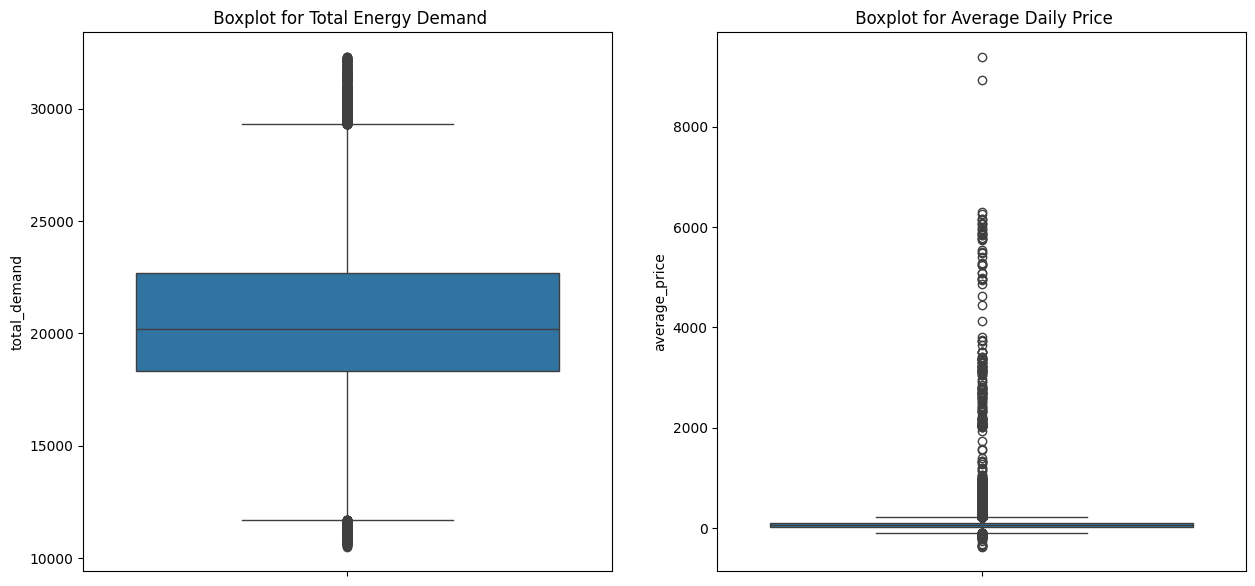

In [26]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data['total_demand'])
plt.title(" Boxplot for Total Energy Demand")

plt.subplot(1, 2, 2)
sns.boxplot(data['average_price'])
plt.title(" Boxplot for Average Daily Price")
plt.show()

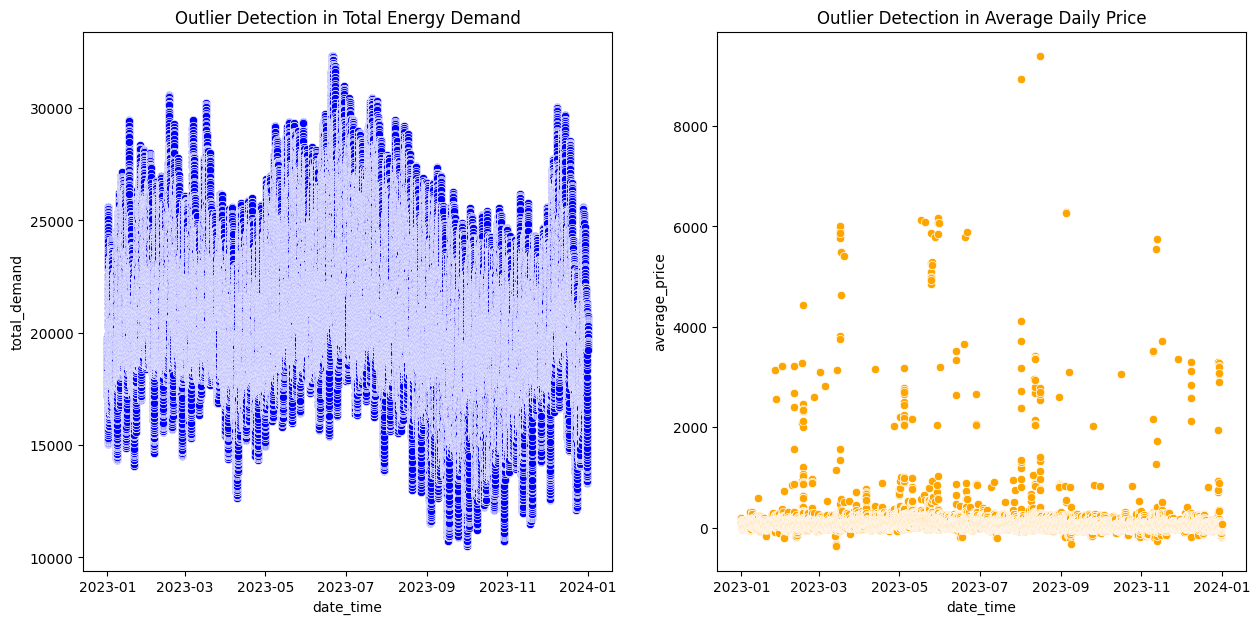

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x=data.index, y='total_demand', color="blue")
plt.title("Outlier Detection in Total Energy Demand")

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x=data.index, y='average_price', color="orange")
plt.title("Outlier Detection in Average Daily Price")
plt.show()

**Interpretation**:

Detecting outliers in total energy demand: The graph shows a scatter plot for total energy demand. The values appear to oscillate regularly, probably due to daily or weekly seasonality. Points that deviate significantly from these regular oscillations are considered outliers. These anomalies could correspond to days of very high or very low demand, which could be linked to specific events or errors in the data.
Detecting outliers in the daily average price: The chart also shows outliers for daily average prices. Here, outliers are less frequent but more pronounced, suggesting that prices may be subject to significant variations that do not correspond to typical trends or seasonal cycles.
Boxplots:
Boxplot for total energy demand: The box represents the distribution of energy demand values, with the median indicated by the line at the center of the box. The whiskers extend to the lowest and highest values within 1.5 IQR (interquartile range) from the edge of the box. Individual points beyond the whiskers are outliers.
Boxplot for average daily price: This boxplot shows a median closer to the first quartile, indicating an asymmetrical price distribution. There are a large number of outliers, reflecting the variability observed in the outlier graph.
Joint interpretation:
Energy demand shows a fairly regular seasonality without too many extreme outliers, indicating relative stability and predictability.
Prices, on the other hand, show much greater volatility and many outliers, indicating that prices are likely to be influenced by external factors or unforeseen events, making them more volatile.

In [28]:
outliers_demand = detect_outliers_iqr(data['total_demand'])
print("Outliers in Total Energy Demand:")
print(outliers_demand)

outliers_price = detect_outliers_iqr(data['average_price'])
print("\nOutliers in Average Daily Price:")
print(outliers_price)

Outliers in Total Energy Demand:
date_time
2023-01-17 17:40:00    29349.11
2023-01-17 17:45:00    29456.42
2023-01-17 17:50:00    29419.73
2023-01-17 18:00:00    29442.19
2023-02-16 16:40:00    29483.63
                         ...   
2023-12-14 18:45:00    29645.57
2023-12-14 18:50:00    29460.90
2023-12-14 18:55:00    29477.34
2023-12-14 19:00:00    29443.97
2023-12-14 19:05:00    29334.82
Name: total_demand, Length: 906, dtype: float64

Outliers in Average Daily Price:
date_time
2023-01-07 15:15:00    225.064
2023-01-07 18:00:00    235.274
2023-01-07 18:25:00    267.914
2023-01-07 18:45:00    259.170
2023-01-07 19:00:00    248.918
                        ...   
2023-12-31 14:20:00   -152.514
2023-12-31 14:25:00   -131.508
2023-12-31 14:30:00   -114.858
2023-12-31 14:35:00   -107.226
2023-12-31 14:50:00   -105.586
Name: average_price, Length: 3705, dtype: float64


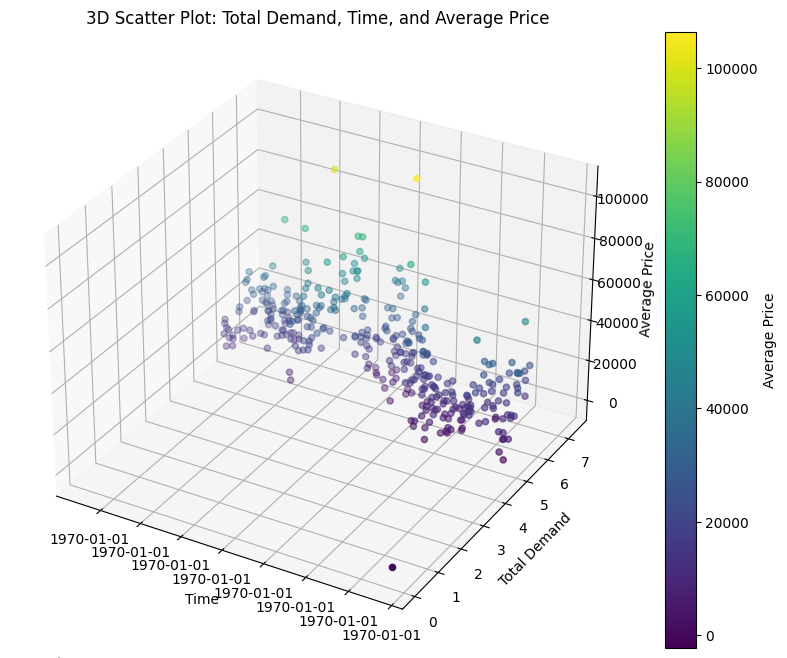

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
dates = daily_data.index.map(pd.Timestamp.toordinal)
scatter = ax.scatter(dates, daily_data['total_demand'], daily_data['average_price'], c=daily_data['average_price'], cmap='viridis', depthshade=True)
ax.set_xlabel('Time')
ax.set_ylabel('Total Demand')
ax.set_zlabel('Average Price')
ax.set_title('3D Scatter Plot: Total Demand, Time, and Average Price')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%Y-%m-%d')))
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Price')
plt.show()

##States


In [30]:
descriptive_stats = data.describe()
descriptive_stats

demand_new_south_wales  price_new_south_wales  demande_queensland  \
count            105121.00000          105121.000000       105121.000000   
mean               7468.58267              95.944691         6053.848546   
std                1340.11007             294.873845         1055.402721   
min                3664.34000            -999.990000         3016.910000   
25%                6532.68000              57.920000         5378.180000   
50%                7342.90000              85.980000         5914.820000   
75%                8255.13000             114.770000         6768.760000   
max               13118.73000           16599.890000        10099.620000   

       price_queensland  demand_south_australia  price_south_australia  \
count     105121.000000           105121.000000          105121.000000   
mean          90.668680             1261.000649              80.072688   
std          342.646083              419.608648             396.652108   
min         -355.000000              -44.560000            -999.000000   
25%           39.660000             1092.600000               0.000000   
50%           75.890000             1319.500000              59.070000   
75%          112.400000             1496.120000             115.130000   
max        15500.000000             3141.660000           16600.000000   

       demand_tasmania  price_tasmania  demand_victoria  price_victoria  \
count    105121.000000   105121.000000    105121.000000   105121.000000   
mean       1138.636309       55.735670      4643.566678       54.777784   
std         133.209536       86.546443       971.788304      111.013126   
min         635.060000     -998.070000      1456.400000     -995.780000   
25%        1042.400000       12.140000      4001.160000        2.320000   
50%        1119.150000       54.280000      4538.620000       53.530000   
75%        1216.330000       81.900000      5227.760000       99.450000   
max        1687.050000    15500.000000      8949.370000    14522.260000   

        total_demand  average_price  
count  105121.000000  105121.000000  
mean    20565.634852      75.439903  
std      3349.400529     160.864963  
min     10500.040000    -368.858000  
25%     18300.560000      25.138000  
50%     20172.930000      63.358000  
75%     22702.870000     104.868000  
max     32320.710000    9395.762000

**Interpretation**:
Interpretation:

Moyenne (Mean) :

Average electricity demand varies between regions, with New South Wales having the highest average demand (7468.58) and Tasmania the lowest (1138.63).
Average electricity prices also differ by region, with South Australia having the highest average price (80.07) and Tasmania the lowest (55.73).
Standard Deviation (std):

Demand in New South Wales shows the greatest variability (std: 1340.11) among the states, while Tasmania shows the lowest demand variability (std: 133.20).
Price variability is highest in New South Wales (std: 294.87) and lowest in Victoria (std: 111.03).
Minimum (min):

The minimum demand recorded is 3016.91 for Queensland, while the minimum price goes down to -999.99 for New South Wales and South Australia, suggesting the presence of negative prices in the dataset.
Percentiles (25%, 50%, 75%):

The 25th, 50th (median) and 75th percentiles give an idea of the distribution of the data. For example, in New South Wales, 25% of the time, demand is below 6532.68, and 75% of the time, it is below 8255.13.
The percentiles for prices indicate that there may be a significant range, especially given the difference between the 25th and 75th percentiles in most regions.
Maximum (max):

Maximum recorded demand is highest in New South Wales (13118.73) and lowest in Tasmania (1687.05).
The maximum price recorded is significantly higher in South Australia (16600.00) compared to the other regions, with Tasmania having the lowest maximum price (15500.00).
Analytical insights:
Negative electricity prices, as observed in the dataset for New South Wales and South Australia, may be the result of several electricity market factors, which may include:
Renewable energy overproduction: When energy production, particularly from renewable sources such as wind and solar, exceeds demand, the surplus electricity can drive prices down, sometimes to negative values. This can happen when weather conditions are particularly favorable for the production of renewable energy.

Inflexibility of the energy system: Some energy sources, such as nuclear or coal-fired power plants, cannot rapidly reduce their energy output in response to falling demand without incurring costs or technical constraints. Consequently, they sometimes prefer to pay for energy to be consumed (hence negative prices) rather than stop production.

Disconnection and restart costs: For some power plants, stopping and restarting production can be more expensive than continuing to produce energy, even if it means selling the energy at a negative price.

Real-time pricing: With the advent of real-time electricity markets and dynamic pricing, prices can fluctuate rapidly in response to immediate changes in the balance between supply and demand.

Subsidy policies: Renewable energy producers sometimes benefit from subsidies or guaranteed credits that enable them to maintain profitable production even when market prices are negative.

Avoiding imbalance penalties: Electricity producers may be subject to penalties if they fail to deliver the quantity of electricity they have committed to produce, which may encourage them to sell at negative prices rather than face higher penalties.

It is important to note that negative prices are generally not a long-term phenomenon; they can occur during certain hours of the day or during exceptional market conditions.

#Part 02

## South_Wales Analysis

In [ ]:
!pip install mplcursors

#####Import Librairies



In [32]:
import mplcursors
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import matplotlib.dates as mdates
from keras.models import Sequential
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Bidirectional, GRU, LSTM, Dense, Dropout
from keras.metrics import RootMeanSquaredError,mean_squared_error,mean_absolute_error

######Import Dataset


In [33]:
!git clone https://github.com/bourasmohamedyoucefenssea/Natural-Language-Processing.git
%cd Natural-Language-Processing
data = pd.read_excel('data.xlsx')
data

Cloning into 'Natural-Language-Processing'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 29.13 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Natural-Language-Processing/Natural-Language-Processing


date_time  demand_new_south_wales  price_new_south_wales  \
0      2023-01-01 00:00:00                 6906.63                 140.40   
1      2023-01-01 00:05:00                 6906.63                 140.40   
2      2023-01-01 00:10:00                 6854.28                 133.96   
3      2023-01-01 00:15:00                 6856.32                 120.00   
4      2023-01-01 00:20:00                 6796.27                 118.99   
...                    ...                     ...                    ...   
105116 2023-12-31 23:40:00                 6649.50                  57.98   
105117 2023-12-31 23:45:00                 6631.86                  57.98   
105118 2023-12-31 23:50:00                 6649.77                  57.98   
105119 2023-12-31 23:55:00                 6634.16                  57.98   
105120 2024-01-01 00:00:00                 6587.63                  57.98   

        demande_queensland  price_queensland  demand_south_australia  \
0                  5718.46            139.73                 1443.65   
1                  5718.46            139.73                 1443.65   
2                  5721.47            136.00                 1438.16   
3                  5691.56            121.80                 1433.89   
4                  5718.89            121.61                 1444.12   
...                    ...               ...                     ...   
105116             6384.64             85.55                 1339.67   
105117             6374.79             85.55                 1296.45   
105118             6386.35             85.75                 1301.21   
105119             6296.06             85.55                 1300.49   
105120             6294.38             85.55                 1296.67   

        price_south_australia  demand_tasmania  price_tasmania  \
0                      127.57          1001.74          450.10   
1                      127.57          1001.74          450.10   
2                      122.85           958.14          117.44   
3                      111.14           957.12          105.40   
4                      110.25           948.37          105.12   
...                       ...              ...             ...   
105116                  55.11          1052.62           85.28   
105117                  54.59          1058.23           85.28   
105118                  54.17          1055.42           85.28   
105119                  53.75          1051.04           85.28   
105120                  54.02          1035.11           85.28   

        demand_victoria  price_victoria  
0               4676.57          129.51  
1               4676.57          129.51  
2               4722.43          124.72  
3               4672.63          111.64  
4               4616.49          110.75  
...                 ...             ...  
105116          4070.49           51.94  
105117          4035.14           52.23  
105118          4039.52           51.83  
105119          4036.91           51.43  
105120          4024.55           51.43  

[105121 rows x 11 columns]

In [34]:
df = data[["date_time","price_new_south_wales"]]
df

date_time  price_new_south_wales
0      2023-01-01 00:00:00                 140.40
1      2023-01-01 00:05:00                 140.40
2      2023-01-01 00:10:00                 133.96
3      2023-01-01 00:15:00                 120.00
4      2023-01-01 00:20:00                 118.99
...                    ...                    ...
105116 2023-12-31 23:40:00                  57.98
105117 2023-12-31 23:45:00                  57.98
105118 2023-12-31 23:50:00                  57.98
105119 2023-12-31 23:55:00                  57.98
105120 2024-01-01 00:00:00                  57.98

[105121 rows x 2 columns]

#### Hourly

In [35]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

date_time  price_new_south_wales
0    2023-01-01 00:00:00             120.326667
1    2023-01-01 01:00:00             108.527500
2    2023-01-01 02:00:00              95.204167
3    2023-01-01 03:00:00              88.006667
4    2023-01-01 04:00:00              81.882500
...                  ...                    ...
8756 2023-12-31 20:00:00              50.100000
8757 2023-12-31 21:00:00              54.545833
8758 2023-12-31 22:00:00              55.647500
8759 2023-12-31 23:00:00              57.465000
8760 2024-01-01 00:00:00              57.980000

[8761 rows x 2 columns]

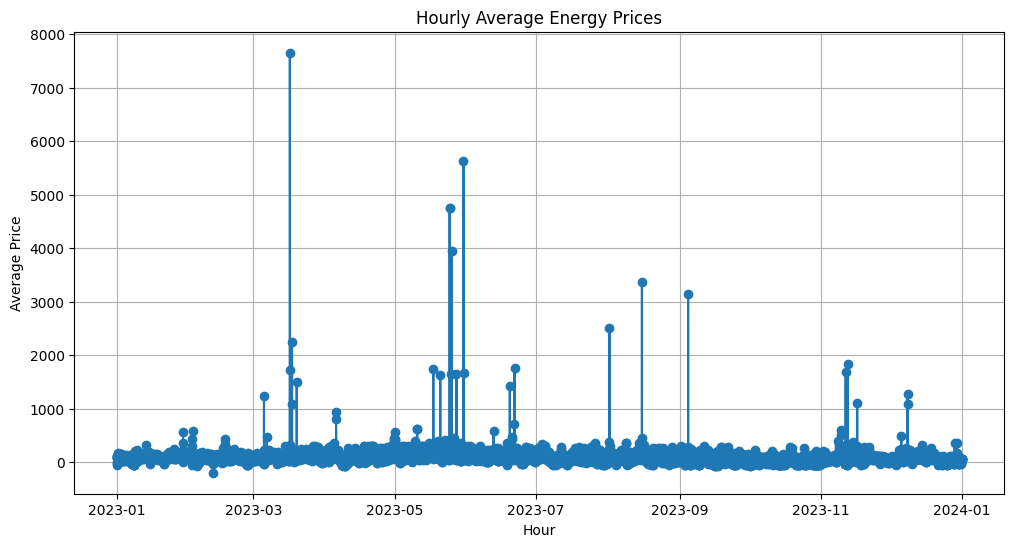

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

**Interpretation**:
- Average Price Variation: There is a base level of average prices that remains relatively constant and low, with frequent spikes that vary in height. The majority of the data points are clustered near the bottom of the plot, indicating that high prices are not the norm but occur sporadically.

- Price Spikes: There are several significant spikes in the average price, with the highest ones reaching up to $8,000. These spikes are scattered throughout the year without a clear pattern of regularity, suggesting that high prices may be due to unpredictable or irregular events.

- Temporal Distribution: The data points are plotted over time, but the exact hours of the spikes are not clear from the image. The x-axis is labeled "Hour" and is marked with months as reference points, so each point represents an average price for a specific hour within the year

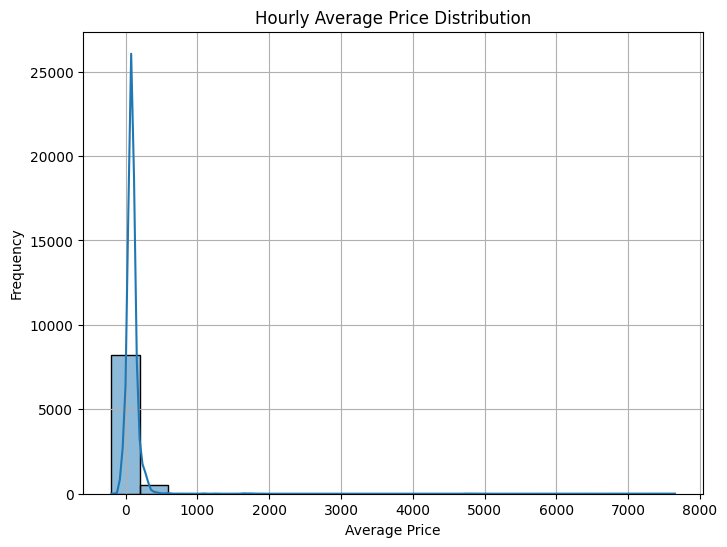

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_new_south_wales'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
1. Distribution Shape: The histogram shows a highly skewed distribution to the right. This indicates that most of the hourly prices are low, with fewer instances of high prices.

2. Frequency of Prices: The majority of average hourly prices are close to zero, as evidenced by the tall bar at the left side of the histogram. This suggests that for most hours, the average price is low.

3. Outliers or Extreme Values: There are some occurrences of very high prices, but these are infrequent as shown by the individual lines (which represent bins with a very low frequency) extending to the right.

4. Price Range: The x-axis, representing average prices, ranges from $0 to $8000, which aligns with the previous scatter plot provided.

5. Most Common Prices: The bulk of the average prices fall within the first bin (close to $0), indicating that the most common average price for any given hour is low.

6. Implications: For analysts or policymakers, this distribution suggests that while extreme price events do happen, they are not common. Most of the time, the average hourly price is significantly lower than the maximum observed prices.

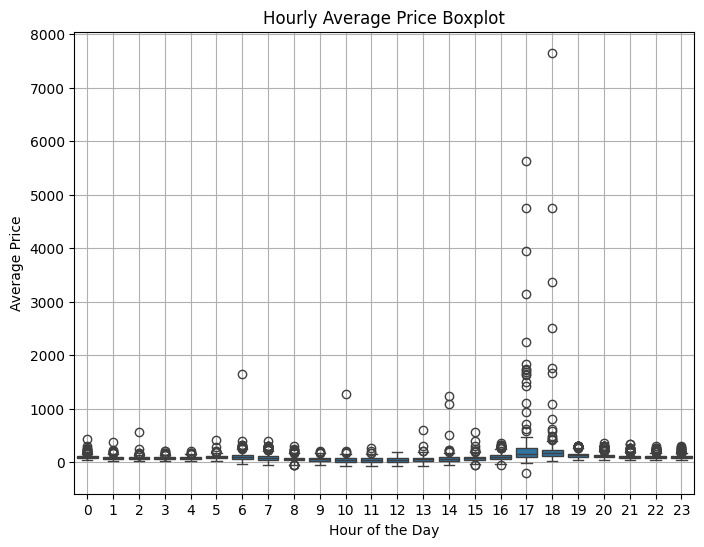

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_new_south_wales'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a boxplot titled "Hourly Average Price Boxplot," showing the distribution of average energy prices for each hour of the day. The x-axis lists hours 0 through 23, representing a 24-hour day, while the y-axis lists the average price. The boxplot for each hour indicates the median price and the interquartile range (IQR), with outliers shown as individual points. Most of the data is concentrated around the lower part of the price range, close to zero, with the medians of all hours being very low. This suggests that typically, energy prices are low throughout the day. However, there are numerous outliers for each hour, some reaching up to $7000-$8000, indicating occasional price surges. These outliers may represent periods of high demand or low supply and are critical for understanding the volatility in energy pricing across different hours of the day.

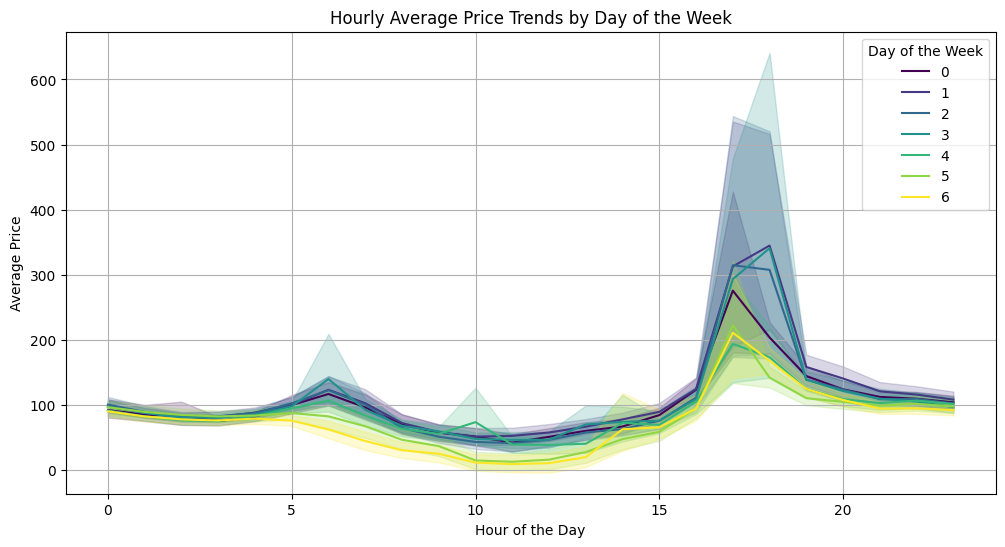

In [39]:
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_new_south_wales', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line graph with a shaded area, titled "Hourly Average Price Trends by Day of the Week," which displays the average energy prices for each hour of the day, segmented by day of the week (with days labeled 0 through 6). The graph shows that the hourly average price for energy varies by the time of day and the day of the week, with all days following a similar pattern where prices are lowest during early morning hours and late evening. There's a noticeable peak in prices in the late afternoon or early evening, around 17:00 to 19:00, with one day (presumably a weekday) showing a particularly sharp and high peak, suggesting a time of high demand or cost of energy supply. This could reflect typical energy usage patterns where demand increases during the evening as people return home from work. The shaded areas might represent the variability or confidence intervals around the average prices, indicating the range of prices that were observed within each hour across the week.


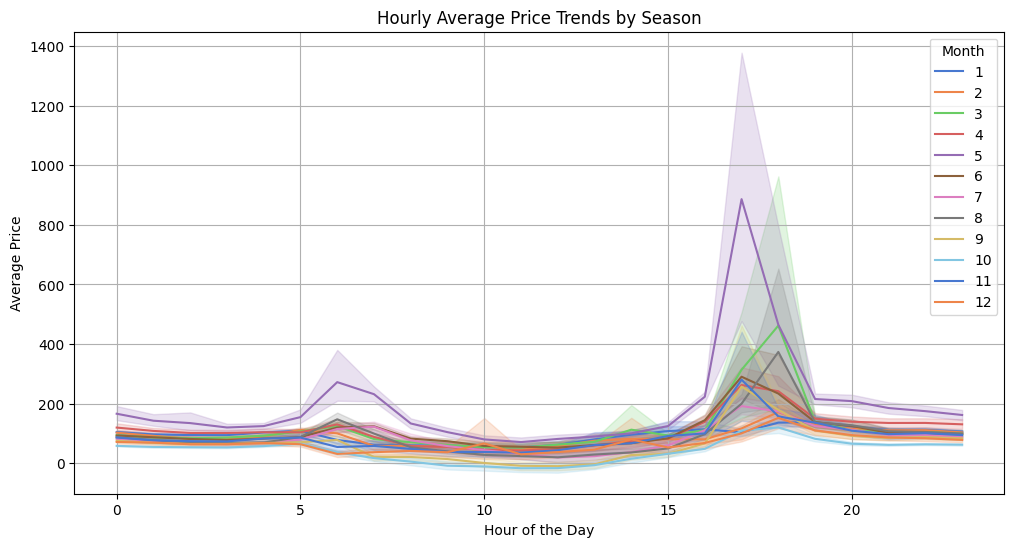

In [40]:
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_new_south_wales', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

**Interpretation**:

The image presents a line graph titled "Hourly Average Price Trends by Season," with various lines representing different months of the year. The x-axis denotes the hour of the day, and the y-axis shows the average price. The graph illustrates the fluctuation of average energy prices throughout the day across different months. Notably, there is a significant spike in price during the evening hours around 17:00 to 20:00, particularly in one month (marked with a purple line), where prices rise sharply to over $1400. This pattern may suggest a seasonal peak in energy prices, which could be related to factors such as increased demand for heating or cooling during more extreme temperatures in that specific month. The shaded areas around the lines might indicate the range or variability of prices during those hours, signaling higher uncertainty or volatility during specific times. This visualization can be instrumental for energy suppliers and policymakers to anticipate demand and adjust supply or pricing strategies accordingly.

In [41]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

date_time  price_new_south_wales heure_seulement  heure
204    2023-01-01 17:00:00                 108.98           17:00     17
205    2023-01-01 17:05:00                  81.81           17:05     17
206    2023-01-01 17:10:00                  82.64           17:10     17
207    2023-01-01 17:15:00                  80.24           17:15     17
208    2023-01-01 17:20:00                  81.56           17:20     17
...                    ...                    ...             ...    ...
105043 2023-12-31 17:35:00                 -55.55           17:35     17
105044 2023-12-31 17:40:00                   0.00           17:40     17
105045 2023-12-31 17:45:00                 -23.01           17:45     17
105046 2023-12-31 17:50:00                  36.08           17:50     17
105047 2023-12-31 17:55:00                  35.88           17:55     17

[4380 rows x 4 columns]

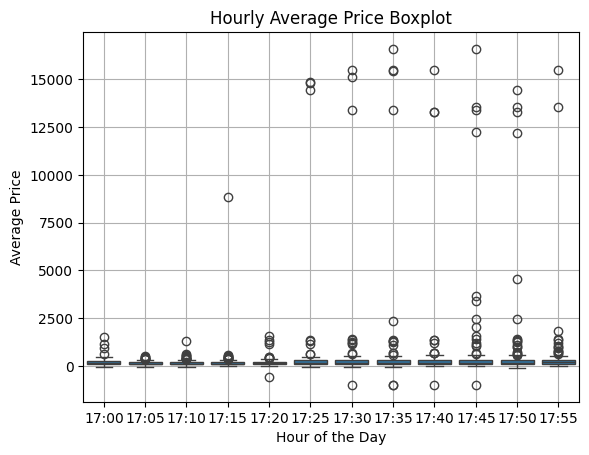

In [42]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_new_south_wales'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [43]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

date_time  price_new_south_wales heure_seulement  heure
216    2023-01-01 18:00:00                 150.33           18:00     18
217    2023-01-01 18:05:00                 160.01           18:05     18
218    2023-01-01 18:10:00                 191.25           18:10     18
219    2023-01-01 18:15:00                 160.01           18:15     18
220    2023-01-01 18:20:00                 160.01           18:20     18
...                    ...                    ...             ...    ...
105055 2023-12-31 18:35:00                  36.06           18:35     18
105056 2023-12-31 18:40:00                  36.06           18:40     18
105057 2023-12-31 18:45:00                  36.06           18:45     18
105058 2023-12-31 18:50:00                  36.08           18:50     18
105059 2023-12-31 18:55:00                  36.08           18:55     18

[4380 rows x 4 columns]

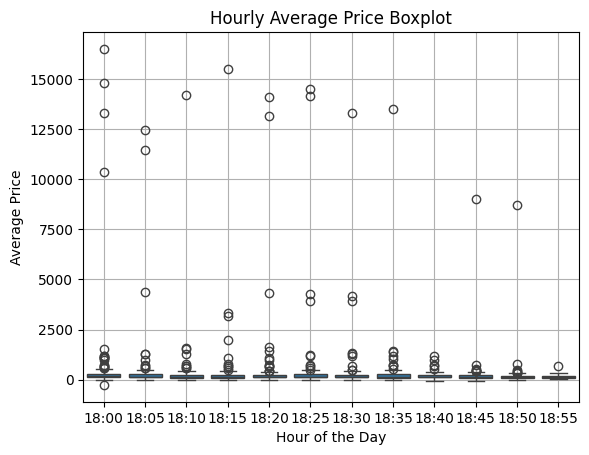

In [44]:
sns.boxplot(x=observations_a_lheure_18['heure_seulement'], y=observations_a_lheure_18['price_new_south_wales'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image displays a boxplot titled "Hourly Average Price Boxplot," representing the distribution of average energy prices for consecutive 5-minute intervals from 18:00 to 18:55. The y-axis measures the average price, and each boxplot indicates the median price, the interquartile range, and any outliers within the interval. The medians are clustered near the lower part of the y-axis, indicating relatively stable and low average prices across the intervals. However, there is a significant presence of outliers, some reaching up to $15,000, demonstrating occasional extreme spikes in prices within these intervals. The persistence of outliers throughout the hour suggests volatility in prices during this time, potentially reflecting fluctuations in demand or supply, market reactions, or other transient phenomena within the energy sector.

#### Daily

In [45]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

date_time  price_new_south_wales
0   2023-01-01              70.994201
1   2023-01-02              86.269028
2   2023-01-03              74.482222
3   2023-01-04              83.291632
4   2023-01-05              85.600417
..         ...                    ...
361 2023-12-28              50.416632
362 2023-12-29              74.763472
363 2023-12-30              30.594514
364 2023-12-31              28.368646
365 2024-01-01              57.980000

[366 rows x 2 columns]

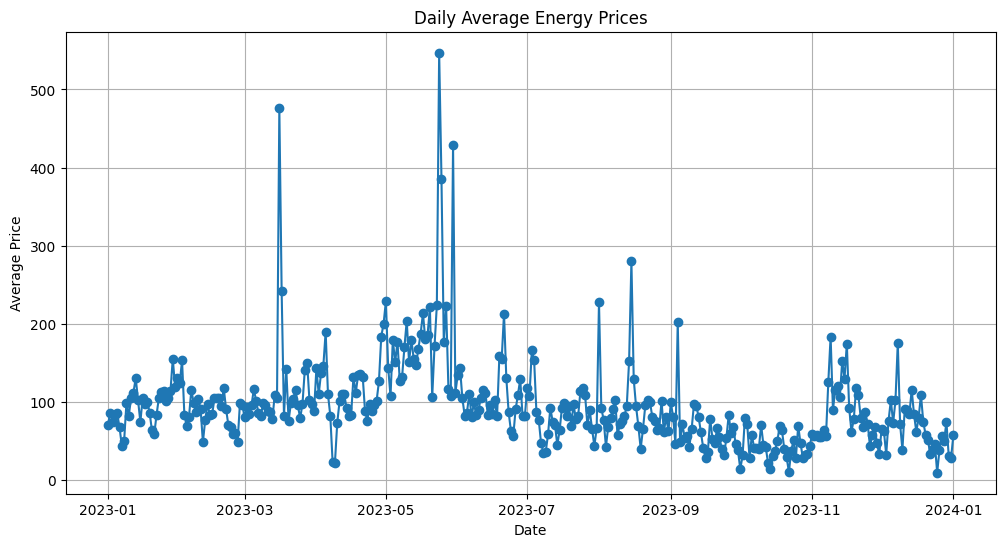

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:
The image displays a time series plot titled "Daily Average Energy Prices", which visualizes the average price of energy over time, ranging from January 2023 to January 2024. The data points are depicted as dots connected by lines, with notable variability in prices. There are several spikes where the average price exceeds the general trend significantly, with some reaching over 500 on the price axis. These spikes could indicate days of high demand, reduced supply, or other market anomalies. The general pattern suggests fluctuating but mostly stable prices with occasional peaks. The majority of data points seem to cluster below 200, indicating that while spikes are noticeable, they are not the norm. The x-axis represents the date, and the y-axis represents the average price, although the units are not specified.

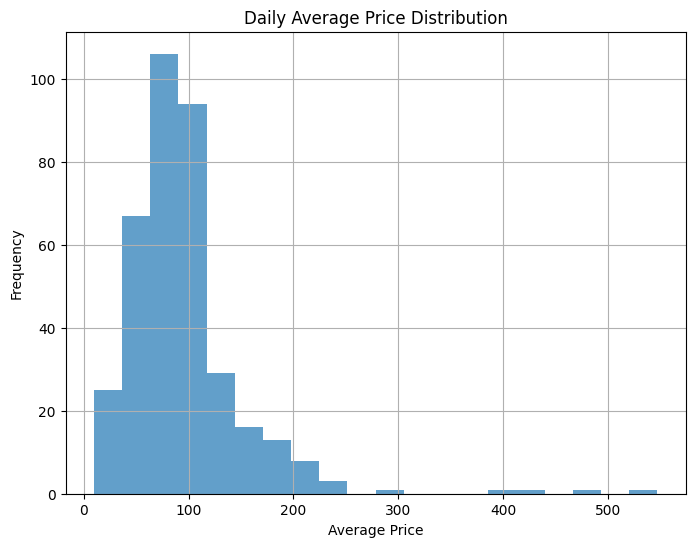

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_new_south_wales'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:

The image shows a histogram titled "Daily Average Price Distribution", which represents the distribution of daily average energy prices. The x-axis indicates the average price, and the y-axis shows the frequency of those prices occurring. The histogram reveals that the most frequent average price range falls between approximately 50 and 150, with the highest frequency near 100, suggesting that this is the most common average price for energy. The distribution seems right-skewed, indicating that there are fewer occurrences of very high prices, but they do exist as the tail extends towards 500. This suggests that while the typical daily price is relatively low, there are days when the average price is significantly higher, which is consistent with the spikes observed in the previous time series plot. The distribution appears to decrease exponentially, with very few days having extremely high average prices, emphasizing the rarity of such events.

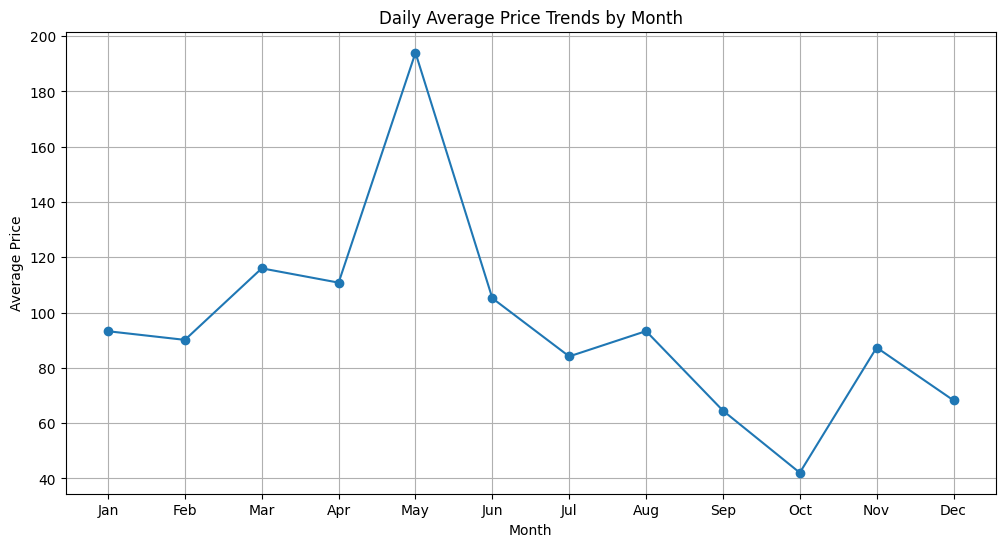

In [48]:
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_new_south_wales'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line chart titled "Daily Average Price Trends by Month," showcasing the changes in daily average energy prices throughout a year, from January to December. The x-axis labels the months, and the y-axis represents the average price. There's a noticeable peak in May, where the average price surges above 180, suggesting a significant increase possibly due to higher demand or supply constraints in that period. Following this peak, there's a sharp decline in June, with prices returning to levels similar to the beginning of the year. Prices fluctuate throughout the subsequent months but generally trend downwards, reaching the lowest point in September. Towards the end of the year, there's a slight uptick in prices. This pattern could be influenced by seasonal demand changes, market conditions, or other economic factors impacting energy prices throughout the year.

<Figure size 1000x600 with 0 Axes>

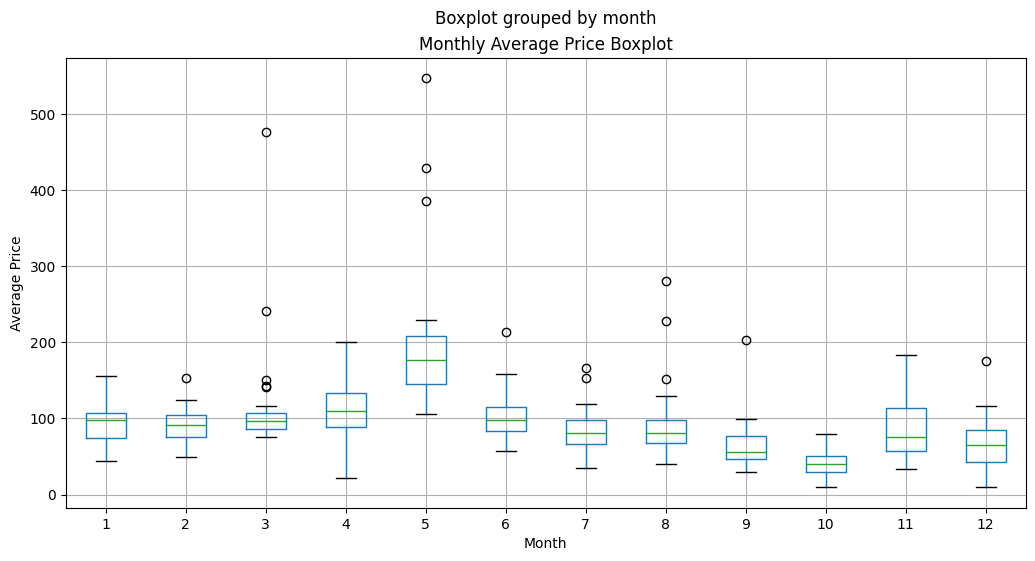

In [49]:
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_new_south_wales', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

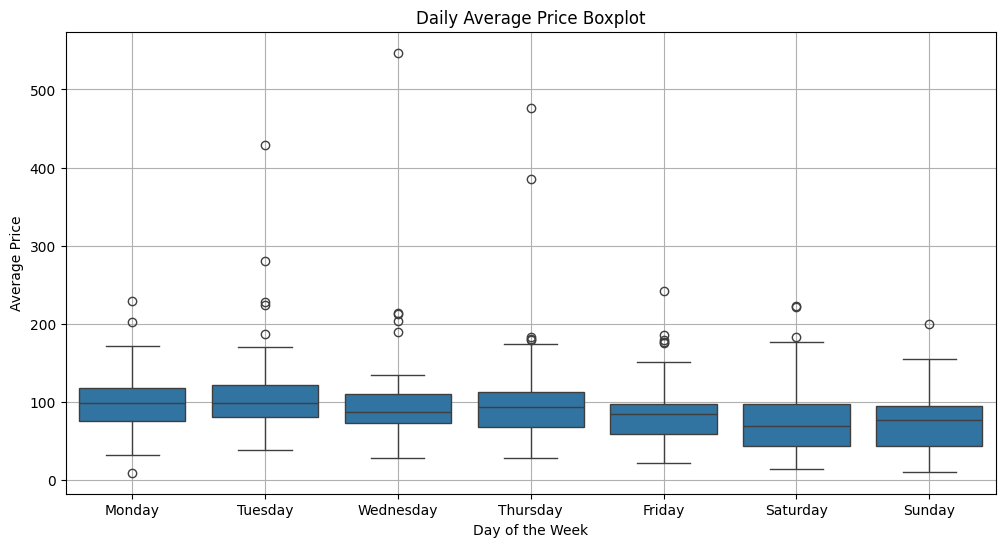

In [50]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_new_south_wales', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#### Monthly

In [51]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

date_time  price_new_south_wales
0  2023-01-31              94.395689
1  2023-02-28              90.133947
2  2023-03-31             116.010338
3  2023-04-30             110.834674
4  2023-05-31             193.998234
5  2023-06-30             105.194963
6  2023-07-31              84.151867
7  2023-08-31              93.307366
8  2023-09-30              64.543947
9  2023-10-31              42.082014
10 2023-11-30              87.356270
11 2023-12-31              68.257650
12 2024-01-31              57.980000

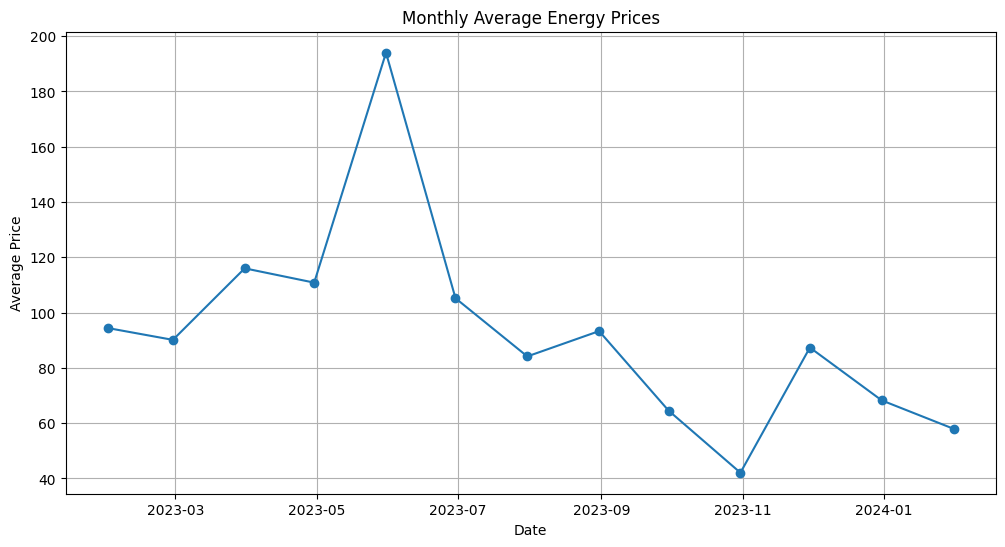

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

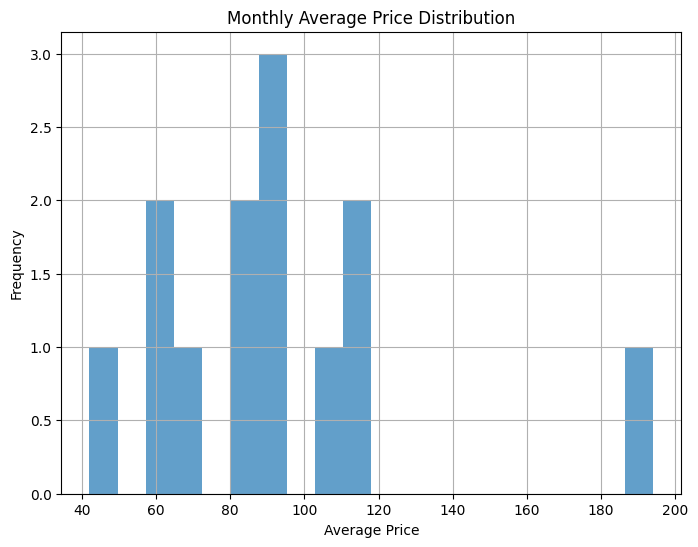

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_new_south_wales'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Modeling phase First appraoche

In [54]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_new_south_wales']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01      140.40      140.40      133.96      120.00      118.99   
2023-01-02       83.57       93.00      101.69      111.50       99.65   
2023-01-03      100.00      109.50      106.80      109.00      109.00   
2023-01-04       89.73      109.50      109.50      109.00       89.18   
2023-01-05      108.55      120.02      120.02      120.02      120.02   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:40:00  X_00:45:00  ...  \
2023-01-01      118.99      107.55      118.99      117.02      109.50  ...   
2023-01-02       92.60       88.33       91.33       88.74       89.37  ...   
2023-01-03      100.00       97.51      100.00      113.14      109.50  ...   
2023-01-04       89.51       86.52       90.42       89.51       89.51  ...   
2023-01-05      119.06      118.00      118.99      118.99      109.50  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01      101.69      111.50       99.65       92.60       88.33   
2023-01-02      106.80      109.00      109.00      100.00       97.51   
2023-01-03      109.50      109.00       89.18       89.51       86.52   
2023-01-04      120.02      120.02      120.02      119.06      118.00   
2023-01-05       89.51       89.51       86.52       89.00       89.00   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01       91.33       88.74       89.37       80.02       80.02  
2023-01-02      100.00      113.14      109.50      100.00      106.71  
2023-01-03       90.42       89.51       89.51       89.51       89.51  
2023-01-04      118.99      118.99      109.50      118.99      108.66  
2023-01-05       94.35       89.00       86.52       81.02       80.03  

[5 rows x 300 columns]

In [55]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01    0.404552    0.367006    0.341517    0.285215    0.320469   
2023-01-02    0.184187    0.179083    0.213532    0.251459    0.247860   
2023-01-03    0.247896    0.244499    0.233799    0.241531    0.282963   
2023-01-04    0.208073    0.244499    0.244507    0.241531    0.208552   
2023-01-05    0.281050    0.286207    0.286230    0.285294    0.324335   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:40:00  X_00:45:00  ...  \
2023-01-01    0.322554    0.317225    0.320264    0.027812    0.282875  ...   
2023-01-02    0.223782    0.249033    0.216389    0.018140    0.207093  ...   
2023-01-03    0.251478    0.281604    0.248948    0.026485    0.282875  ...   
2023-01-04    0.212216    0.242611    0.212971    0.018403    0.207620  ...   
2023-01-05    0.322816    0.354302    0.320264    0.028485    0.282875  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01    0.213532    0.251459    0.247860    0.223782    0.249033   
2023-01-02    0.233799    0.241531    0.282963    0.251478    0.281604   
2023-01-03    0.244507    0.241531    0.208552    0.212216    0.242611   
2023-01-04    0.286230    0.285294    0.324335    0.322816    0.354302   
2023-01-05    0.165226    0.164132    0.198566    0.210308    0.251410   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01    0.216389    0.018140    0.207093    0.167127    0.174566  
2023-01-02    0.248948    0.026485    0.282875    0.242778    0.274720  
2023-01-03    0.212971    0.018403    0.207620    0.203059    0.210177  
2023-01-04    0.320264    0.028485    0.282875    0.314679    0.282037  
2023-01-05    0.227730    0.018229    0.196363    0.170914    0.174603  

[5 rows x 300 columns]

In [56]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

Y_00:00:00 Y_00:05:00 Y_00:10:00 Y_00:15:00 Y_00:20:00 Y_00:25:00  \
X_00:00:00   0.611561   0.627875   0.617593   0.592347   0.607284   0.614877   
X_00:05:00   0.586361   0.578773   0.582515   0.557207   0.590382   0.576093   
X_00:10:00   0.627025   0.622403   0.637653   0.598351   0.637896   0.616451   
X_00:15:00    0.62283   0.634779   0.647665   0.615159   0.652262   0.625627   
X_00:20:00   0.640882   0.649432   0.659583   0.625517   0.657055   0.646238   

           Y_00:30:00 Y_00:35:00 Y_00:40:00 Y_00:45:00 Y_00:50:00 Y_00:55:00  
X_00:00:00   0.628982   0.598278   0.463262   0.599572   0.602662   0.630483  
X_00:05:00   0.590444   0.569054   0.371718   0.569407   0.579002   0.623796  
X_00:10:00   0.632114   0.594097   0.365586   0.607858   0.611799   0.658122  
X_00:15:00   0.637896   0.599342   0.358349   0.621531   0.615512   0.658742  
X_00:20:00   0.665099   0.620415   0.411324   0.630613   0.626123   0.671498

####Modeling with scaled data

In [57]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [58]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)

Epoch 1/20
13/13 [==============================] - 22s 189ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.1549 - root_mean_squared_error: 0.2086 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_mean_absolute_error: 0.0850 - val_root_mean_squared_error: 0.1019
Epoch 2/20
13/13 [==============================] - 0s 33ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - mean_absolute_error: 0.0754 - root_mean_squared_error: 0.1127 - val_loss: 0.0058 - val_mean_squared_error: 0.0058 - val_mean_absolute_error: 0.0525 - val_root_mean_squared_error: 0.0764
Epoch 3/20
13/13 [==============================] - 0s 28ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - mean_absolute_error: 0.0678 - root_mean_squared_error: 0.1021 - val_loss: 0.0050 - val_mean_squared_error: 0.0050 - val_mean_absolute_error: 0.0484 - val_root_mean_squared_error: 0.0708
Epoch 4/20
13/13 [==============================] - 0s 28ms/step - loss: 0.0075 - mean_squared_error: 0.007

**Interpretation**:

The model architecture consists of a Bidirectional LSTM neural network with three layers, each followed by dropout layers to prevent overfitting. The first two LSTM layers have 200 and 128 units, respectively, with 'relu' activation, and the last LSTM layer also has 128 units. It ends with a Dense output layer with a number of units equal to the number of output columns.

The evaluation metrics for the model include Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). During training, the model achieved a final test loss of approximately 0.0058, an MSE of 0.0058, an MAE of 0.0449, and an RMSE of 0.0761. These metrics provide insights into how well the model fits the data and its prediction accuracy.

In [59]:
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Loss: 0.005980588961392641, MSE: 0.005980588961392641, MAE: 0.047284699976444244, RMSE: 0.07733426243066788
3/3 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0473 - root_mean_squared_error: 0.0773 - 106ms/epoch - 35ms/step


In [60]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

Epoch 1/30
13/13 [==============================] - 37s 2s/step - loss: 0.0409 - mean_squared_error: 0.0409 - mean_absolute_error: 0.1499 - root_mean_squared_error: 0.2022 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0812 - val_root_mean_squared_error: 0.1084
Epoch 2/30
13/13 [==============================] - 25s 2s/step - loss: 0.0211 - mean_squared_error: 0.0211 - mean_absolute_error: 0.1060 - root_mean_squared_error: 0.1451 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_mean_absolute_error: 0.0704 - val_root_mean_squared_error: 0.1026
Epoch 3/30
13/13 [==============================] - 30s 2s/step - loss: 0.0171 - mean_squared_error: 0.0171 - mean_absolute_error: 0.0882 - root_mean_squared_error: 0.1308 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0604 - val_root_mean_squared_error: 0.0856
Epoch 4/30
13/13 [==============================] - 25s 2s/step - loss: 0.0125 - mean_squared_error: 0.0125 - me

**Interpretation**:

The second model has a different architecture compared to the first model. It starts with a 1D Convolutional layer with 32 filters and a kernel size of 3, followed by MaxPooling and two Bidirectional GRU layers with 128 and 32 units, respectively, and 'relu' activation functions. Both models have dropout layers to prevent overfitting, and both output layers are Dense with a number of units equal to the number of output columns.

When comparing the evaluation metrics of the two models, we can see that the second model achieved a lower test loss (approximately 0.0052) compared to the first model's test loss (approximately 0.0058). This suggests that the second model performed slightly better in terms of mean squared error on the test data. Additionally, the second model has a lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), indicating better accuracy in predictions.

Overall, the second model seems to outperform the first model based on these evaluation metrics, although the difference is relatively small. The choice between the two models may depend on other factors such as computational efficiency and interpretability.

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

Epoch 1/50
8/8 - 7s - loss: 0.0372 - val_loss: 0.0115 - 7s/epoch - 877ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0117 - val_loss: 0.0052 - 213ms/epoch - 27ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0079 - val_loss: 0.0043 - 248ms/epoch - 31ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0070 - val_loss: 0.0044 - 170ms/epoch - 21ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0061 - val_loss: 0.0043 - 135ms/epoch - 17ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0051 - val_loss: 0.0040 - 134ms/epoch - 17ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0049 - val_loss: 0.0043 - 152ms/epoch - 19ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0044 - val_loss: 0.0043 - 152ms/epoch - 19ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0041 - val_loss: 0.0045 - 121ms/epoch - 15ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0037 - val_loss: 0.0051 - 139ms/epoch - 17ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0045 - val_loss: 0.0053 - 138ms/epoch - 17ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0038 - val_loss: 0.0048 - 125ms/epoch - 16ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0033 - v

#### Modeling with new scaled data: remove uncorrelated X's

In [62]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

['X_00:40:00',
 'X_01:25:00',
 'X_02:10:00',
 'X_02:45:00',
 'X_05:10:00',
 'X_05:40:00',
 'X_05:45:00',
 'X_05:50:00',
 'X_06:50:00',
 'X_06:55:00',
 'X_10:05:00',
 'X_13:10:00',
 'X_14:35:00',
 'X_14:40:00',
 'X_14:50:00',
 'X_15:10:00',
 'X_17:20:00',
 'X_17:25:00',
 'X_17:30:00',
 'X_17:35:00',
 'X_17:40:00',
 'X_17:45:00',
 'X_17:50:00',
 'X_17:55:00',
 'X_18:00:00',
 'X_18:05:00',
 'X_18:10:00',
 'X_18:15:00',
 'X_18:20:00',
 'X_18:25:00',
 'X_18:30:00',
 'X_18:35:00',
 'X_18:45:00',
 'X_18:50:00']

In [63]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01    0.404552    0.367006    0.341517    0.285215    0.320469   
2023-01-02    0.184187    0.179083    0.213532    0.251459    0.247860   
2023-01-03    0.247896    0.244499    0.233799    0.241531    0.282963   
2023-01-04    0.208073    0.244499    0.244507    0.241531    0.208552   
2023-01-05    0.281050    0.286207    0.286230    0.285294    0.324335   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:45:00  X_00:50:00  ...  \
2023-01-01    0.322554    0.317225    0.320264    0.282875    0.281095  ...   
2023-01-02    0.223782    0.249033    0.216389    0.207093    0.167127  ...   
2023-01-03    0.251478    0.281604    0.248948    0.282875    0.242778  ...   
2023-01-04    0.212216    0.242611    0.212971    0.207620    0.203059  ...   
2023-01-05    0.322816    0.354302    0.320264    0.282875    0.314679  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01    0.213532    0.251459    0.247860    0.223782    0.249033   
2023-01-02    0.233799    0.241531    0.282963    0.251478    0.281604   
2023-01-03    0.244507    0.241531    0.208552    0.212216    0.242611   
2023-01-04    0.286230    0.285294    0.324335    0.322816    0.354302   
2023-01-05    0.165226    0.164132    0.198566    0.210308    0.251410   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01    0.216389    0.018140    0.207093    0.167127    0.174566  
2023-01-02    0.248948    0.026485    0.282875    0.242778    0.274720  
2023-01-03    0.212971    0.018403    0.207620    0.203059    0.210177  
2023-01-04    0.320264    0.028485    0.282875    0.314679    0.282037  
2023-01-05    0.227730    0.018229    0.196363    0.170914    0.174603  

[5 rows x 266 columns]

In [64]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [65]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/50
13/13 [==============================] - 11s 120ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - mean_absolute_error: 0.1534 - root_mean_squared_error: 0.2032 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0937 - val_root_mean_squared_error: 0.1134
Epoch 2/50
13/13 [==============================] - 0s 18ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0886 - root_mean_squared_error: 0.1343 - val_loss: 0.0054 - val_mean_squared_error: 0.0054 - val_mean_absolute_error: 0.0531 - val_root_mean_squared_error: 0.0737
Epoch 3/50
13/13 [==============================] - 0s 21ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - mean_absolute_error: 0.0740 - root_mean_squared_error: 0.1102 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0425 - val_root_mean_squared_error: 0.0622
Epoch 4/50
13/13 [==============================] - 0s 22ms/step - loss: 0.0114 - mean_squared_error: 0.011

In [66]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

Epoch 1/30
13/13 [==============================] - 18s 886ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - mean_absolute_error: 0.1768 - root_mean_squared_error: 0.2325 - val_loss: 0.0248 - val_mean_squared_error: 0.0248 - val_mean_absolute_error: 0.1116 - val_root_mean_squared_error: 0.1574
Epoch 2/30
13/13 [==============================] - 10s 769ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - mean_absolute_error: 0.1166 - root_mean_squared_error: 0.1666 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_mean_absolute_error: 0.0695 - val_root_mean_squared_error: 0.1024
Epoch 3/30
13/13 [==============================] - 11s 757ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0919 - root_mean_squared_error: 0.1342 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0571 - val_root_mean_squared_error: 0.0841
Epoch 4/30
13/13 [==============================] - 11s 839ms/step - loss: 0.0156 - mean_squared_error:

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [68]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

NameError: name 'filtered_df_normalized' is not defined

In [70]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/5
203/203 [==============================] - 112s 524ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0785 - root_mean_squared_error: 0.1201 - r2_score: -0.0053 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0567 - val_root_mean_squared_error: 0.0837 - val_r2_score: 0.5036
Epoch 2/5
203/203 [==============================] - 106s 522ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - mean_absolute_error: 0.0824 - root_mean_squared_error: 0.1208 - r2_score: 0.0226 - val_loss: 0.0058 - val_mean_squared_error: 0.0058 - val_mean_absolute_error: 0.0566 - val_root_mean_squared_error: 0.0760 - val_r2_score: 0.5531
Epoch 3/5
203/203 [==============================] - 102s 505ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0798 - root_mean_squared_error: 0.1153 - r2_score: 0.2292 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0627 - val_root_mean_squared_error: 

ValueError: not enough values to unpack (expected 5, got 4)

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [72]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

X_23:30:00  X_23:45:00  X_23:50:00  X_23:55:00  Y_00:00:00  \
2023-01-01    0.269768    0.222937    0.202455    0.169755    0.184187   
2023-01-02    0.276361    0.277498    0.242204    0.242204    0.247896   
2023-01-03    0.202516    0.209496    0.278201    0.276306    0.208073   
2023-01-04    0.278256    0.278747    0.267970    0.248570    0.281050   
2023-01-05    0.216497    0.201128    0.200523    0.191126    0.205243   

            Y_00:05:00  Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  \
2023-01-01    0.179083    0.213532    0.251459    0.247860    0.223782   
2023-01-02    0.244499    0.233799    0.241531    0.282963    0.251478   
2023-01-03    0.244499    0.244507    0.241531    0.208552    0.212216   
2023-01-04    0.286207    0.286230    0.285294    0.324335    0.322816   
2023-01-05    0.181105    0.165226    0.164132    0.198566    0.210308   

            Y_00:30:00  Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  \
2023-01-01    0.249033    0.216389    0.018140    0.207093    0.167127   
2023-01-02    0.281604    0.248948    0.026485    0.282875    0.242778   
2023-01-03    0.242611    0.212971    0.018403    0.207620    0.203059   
2023-01-04    0.354302    0.320264    0.028485    0.282875    0.314679   
2023-01-05    0.251410    0.227730    0.018229    0.196363    0.170914   

            Y_00:55:00  
2023-01-01    0.174566  
2023-01-02    0.274720  
2023-01-03    0.210177  
2023-01-04    0.282037  
2023-01-05    0.174603

In [73]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [74]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
13/13 [==============================] - 17s 171ms/step - loss: 0.0616 - mean_squared_error: 0.0616 - mean_absolute_error: 0.1958 - root_mean_squared_error: 0.2482 - r2_score: -2.0981 - val_loss: 0.0400 - val_mean_squared_error: 0.0400 - val_mean_absolute_error: 0.1551 - val_root_mean_squared_error: 0.2000 - val_r2_score: -1.5782
Epoch 2/20
13/13 [==============================] - 0s 19ms/step - loss: 0.0326 - mean_squared_error: 0.0326 - mean_absolute_error: 0.1290 - root_mean_squared_error: 0.1806 - r2_score: -0.7311 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0633 - val_root_mean_squared_error: 0.0885 - val_r2_score: 0.2555
Epoch 3/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - mean_absolute_error: 0.0844 - root_mean_squared_error: 0.1068 - r2_score: -0.0180 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - val_mean_absolute_error: 0.0576 - val_root_mean_squared_error: 0.0796 

In [75]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/30
13/13 [==============================] - 7s 149ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - mean_absolute_error: 0.1862 - root_mean_squared_error: 0.2380 - r2_score: -2.0809 - val_loss: 0.0319 - val_mean_squared_error: 0.0319 - val_mean_absolute_error: 0.1354 - val_root_mean_squared_error: 0.1787 - val_r2_score: -1.4437
Epoch 2/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - mean_absolute_error: 0.1194 - root_mean_squared_error: 0.1761 - r2_score: -1.0743 - val_loss: 0.0111 - val_mean_squared_error: 0.0111 - val_mean_absolute_error: 0.0722 - val_root_mean_squared_error: 0.1053 - val_r2_score: 0.0105
Epoch 3/30
13/13 [==============================] - 0s 22ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0874 - root_mean_squared_error: 0.1200 - r2_score: -1.0909 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0690 - val_root_mean_squared_error: 0.0901 -

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

### Modeling phase Second Approche

In [78]:
df = data[["date_time","price_new_south_wales"]]
df['Y'] = df['price_new_south_wales'].shift(-288)
df = df.dropna()
X = []
Y = []
for i in range(0, len(df), 12):
    X.append(df['price_new_south_wales'].iloc[i:i+288].values)
    Y.append(df['Y'].iloc[i:i+12].values)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
time_sequence_X = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names_X = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence_X]
X_df.columns = column_names_X
time_sequence_Y = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288, 300)]
column_names_Y = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_Y]
Y_df.columns = column_names_Y
combined_df = pd.concat([X_df, Y_df], axis=1)
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(minutes=5*i) for i in range(0, len(combined_df) * 12, 12)]
combined_df.index = date_index
combined_df = combined_df.drop(combined_df.index[-1])
combined_df.head()

<ipython-input-78-f466d62f2374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = df['price_new_south_wales'].shift(-288)


X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  \
2023-01-01 00:00:00      140.40      140.40      133.96      120.00   
2023-01-01 01:00:00      106.80      109.50      109.50      104.14   
2023-01-01 02:00:00      104.11      100.79      103.86       97.71   
2023-01-01 03:00:00       89.21       96.49       89.51       89.51   
2023-01-01 04:00:00       89.00       80.02       82.13       84.78   

                     X_00:20:00  X_00:25:00  X_00:30:00  X_00:35:00  \
2023-01-01 00:00:00      118.99      118.99      107.55      118.99   
2023-01-01 01:00:00      106.75      104.48      105.00      120.97   
2023-01-01 02:00:00       99.82       97.21       89.51       88.54   
2023-01-01 03:00:00       89.51       87.66       88.90       88.31   
2023-01-01 04:00:00       86.52       80.02       80.02       80.02   

                     X_00:40:00  X_00:45:00  ...  Y_00:10:00  Y_00:15:00  \
2023-01-01 00:00:00      117.02      109.50  ...      101.69      111.50   
2023-01-01 01:00:00      109.50      108.83  ...       86.75       86.52   
2023-01-01 02:00:00       86.81       88.23  ...       80.01       80.01   
2023-01-01 03:00:00       88.67       75.27  ...       80.01       80.01   
2023-01-01 04:00:00       80.02       80.02  ...      109.50      110.75   

                     Y_00:20:00  Y_00:25:00  Y_00:30:00  Y_00:35:00  \
2023-01-01 00:00:00       99.65       92.60       88.33       91.33   
2023-01-01 01:00:00       89.51       89.51       82.81       85.22   
2023-01-01 02:00:00       80.01       80.01       80.01       80.01   
2023-01-01 03:00:00       80.01       80.01       80.07       81.72   
2023-01-01 04:00:00      110.63      108.38       96.39       89.00   

                     Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01 00:00:00       88.74       89.37       80.02       80.02  
2023-01-01 01:00:00       80.01       80.01       80.01       80.01  
2023-01-01 02:00:00       80.01       80.01       80.01       80.01  
2023-01-01 03:00:00       81.72       82.61       89.51       80.99  
2023-01-01 04:00:00       94.05       93.20       95.08       85.62  

[5 rows x 300 columns]

In [79]:
combined_df= combined_df.dropna()
combined_df

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  \
2023-01-01 00:00:00      140.40      140.40      133.96      120.00   
2023-01-01 01:00:00      106.80      109.50      109.50      104.14   
2023-01-01 02:00:00      104.11      100.79      103.86       97.71   
2023-01-01 03:00:00       89.21       96.49       89.51       89.51   
2023-01-01 04:00:00       89.00       80.02       82.13       84.78   
...                         ...         ...         ...         ...   
2023-12-29 20:00:00       73.18       74.51       73.97       61.55   
2023-12-29 21:00:00       70.31       68.86       78.31       70.31   
2023-12-29 22:00:00       68.86       67.81      105.94       99.17   
2023-12-29 23:00:00       69.62       69.73       84.76       88.63   
2023-12-30 00:00:00       67.75       68.86       69.34       61.97   

                     X_00:20:00  X_00:25:00  X_00:30:00  X_00:35:00  \
2023-01-01 00:00:00      118.99      118.99      107.55      118.99   
2023-01-01 01:00:00      106.75      104.48      105.00      120.97   
2023-01-01 02:00:00       99.82       97.21       89.51       88.54   
2023-01-01 03:00:00       89.51       87.66       88.90       88.31   
2023-01-01 04:00:00       86.52       80.02       80.02       80.02   
...                         ...         ...         ...         ...   
2023-12-29 20:00:00       62.75       62.75       62.75       58.89   
2023-12-29 21:00:00       70.31       78.50       78.41       68.79   
2023-12-29 22:00:00       97.29       71.88       67.73       81.19   
2023-12-29 23:00:00       69.33       69.32       70.41       69.38   
2023-12-30 00:00:00       62.35       58.00       54.75       36.08   

                     X_00:40:00  X_00:45:00  ...  Y_00:10:00  Y_00:15:00  \
2023-01-01 00:00:00      117.02      109.50  ...      101.69      111.50   
2023-01-01 01:00:00      109.50      108.83  ...       86.75       86.52   
2023-01-01 02:00:00       86.81       88.23  ...       80.01       80.01   
2023-01-01 03:00:00       88.67       75.27  ...       80.01       80.01   
2023-01-01 04:00:00       80.02       80.02  ...      109.50      110.75   
...                         ...         ...  ...         ...         ...   
2023-12-29 20:00:00       78.34       78.27  ...       59.99       59.99   
2023-12-29 21:00:00       77.11       78.71  ...       76.19       59.70   
2023-12-29 22:00:00       72.82       78.39  ...       58.00       58.00   
2023-12-29 23:00:00       94.38       75.59  ...       57.98       57.36   
2023-12-30 00:00:00       58.00       46.49  ...       57.98       54.95   

                     Y_00:20:00  Y_00:25:00  Y_00:30:00  Y_00:35:00  \
2023-01-01 00:00:00       99.65       92.60       88.33       91.33   
2023-01-01 01:00:00       89.51       89.51       82.81       85.22   
2023-01-01 02:00:00       80.01       80.01       80.01       80.01   
2023-01-01 03:00:00       80.01       80.01       80.07       81.72   
2023-01-01 04:00:00      110.63      108.38       96.39       89.00   
...                         ...         ...         ...         ...   
2023-12-29 20:00:00       58.19       64.95       60.99       59.99   
2023-12-29 21:00:00       57.98       58.00       57.98       57.98   
2023-12-29 22:00:00       58.00       58.00       57.98       58.00   
2023-12-29 23:00:00       57.98       57.98       57.98       58.00   
2023-12-30 00:00:00       54.95       53.81       51.65       54.95   

                     Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01 00:00:00       88.74       89.37       80.02       80.02  
2023-01-01 01:00:00       80.01       80.01       80.01       80.01  
2023-01-01 02:00:00       80.01       80.01       80.01       80.01  
2023-01-01 03:00:00       81.72       82.61       89.51       80.99  
2023-01-01 04:00:00       94.05       93.20       95.08       85.62  
...                         ...         ...         ...         ...  
2023-12-29 20:00:00       59.99       59.99       59.99    

In [80]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  \
2023-01-01 00:00:00    0.023829    0.015189    0.074476    0.067868   
2023-01-01 01:00:00    0.021824    0.013032    0.072868    0.066907   
2023-01-01 02:00:00    0.021664    0.012424    0.072498    0.066517   
2023-01-01 03:00:00    0.020775    0.012124    0.071555    0.066020   
2023-01-01 04:00:00    0.020762    0.010974    0.071070    0.065734   

                     X_00:20:00  X_00:25:00  X_00:30:00  X_00:35:00  \
2023-01-01 00:00:00    0.046193    0.013317    0.067112    0.063579   
2023-01-01 01:00:00    0.045359    0.012346    0.066958    0.063691   
2023-01-01 02:00:00    0.044887    0.011860    0.066019    0.061849   
2023-01-01 03:00:00    0.044184    0.011221    0.065982    0.061836   
2023-01-01 04:00:00    0.043981    0.010709    0.065444    0.061365   

                     X_00:40:00  X_00:45:00  ...  Y_00:10:00  Y_00:15:00  \
2023-01-01 00:00:00    0.067751    0.062612  ...    0.072355    0.067353   
2023-01-01 01:00:00    0.067294    0.062574  ...    0.071373    0.065839   
2023-01-01 02:00:00    0.065918    0.061403  ...    0.070930    0.065444   
2023-01-01 03:00:00    0.066031    0.060667  ...    0.070930    0.065444   
2023-01-01 04:00:00    0.065506    0.060937  ...    0.072868    0.067307   

                     Y_00:20:00  Y_00:25:00  Y_00:30:00  Y_00:35:00  \
2023-01-01 00:00:00    0.044875    0.011551    0.065948    0.062007   
2023-01-01 01:00:00    0.044184    0.011344    0.065613    0.061660   
2023-01-01 02:00:00    0.043537    0.010709    0.065443    0.061364   
2023-01-01 03:00:00    0.043537    0.010709    0.065447    0.061461   
2023-01-01 04:00:00    0.045623    0.012607    0.066436    0.061875   

                     Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01 00:00:00    0.066035    0.061468    0.069892    0.012805  
2023-01-01 01:00:00    0.065506    0.060936    0.069892    0.012805  
2023-01-01 02:00:00    0.065506    0.060936    0.069892    0.012805  
2023-01-01 03:00:00    0.065609    0.061084    0.070506    0.012867  
2023-01-01 04:00:00    0.066357    0.061686    0.070867    0.013164  

[5 rows x 300 columns]

In [81]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

Y_00:00:00 Y_00:05:00 Y_00:10:00 Y_00:15:00 Y_00:20:00 Y_00:25:00  \
X_00:00:00    0.09971   0.063258   0.084333   0.067992   0.079108   0.055443   
X_00:05:00   0.251548   0.057494   0.080949   0.070807   0.069768   0.053166   
X_00:10:00   0.393533   0.076283   0.110666   0.090187   0.099722   0.081157   
X_00:15:00   0.135167   0.067694   0.092535    0.08034   0.083164   0.061653   
X_00:20:00   0.320321   0.065021   0.098962   0.083255   0.101246   0.076265   

           Y_00:30:00 Y_00:35:00 Y_00:40:00 Y_00:45:00 Y_00:50:00 Y_00:55:00  
X_00:00:00    0.07625    0.05019   0.058331   0.051168    0.05115   0.052262  
X_00:05:00   0.057054   0.046627   0.055649   0.052521   0.051295   0.050127  
X_00:10:00   0.081668   0.062532    0.07898   0.075612   0.070375   0.068208  
X_00:15:00   0.070765   0.055397   0.067228   0.071897   0.066483   0.062917  
X_00:20:00   0.101484   0.059349    0.07103   0.059512   0.056745   0.066971

In [82]:
correlation_results

Y_00:00:00 Y_00:05:00 Y_00:10:00 Y_00:15:00 Y_00:20:00 Y_00:25:00  \
X_00:00:00    0.09971   0.063258   0.084333   0.067992   0.079108   0.055443   
X_00:05:00   0.251548   0.057494   0.080949   0.070807   0.069768   0.053166   
X_00:10:00   0.393533   0.076283   0.110666   0.090187   0.099722   0.081157   
X_00:15:00   0.135167   0.067694   0.092535    0.08034   0.083164   0.061653   
X_00:20:00   0.320321   0.065021   0.098962   0.083255   0.101246   0.076265   
...               ...        ...        ...        ...        ...        ...   
X_23:35:00   0.257071   0.087158   0.095637   0.425717   0.311053   0.205965   
X_23:40:00   0.280283   0.075499   0.101076   0.091687   0.356571   0.246005   
X_23:45:00   0.220979   0.136287   0.197079   0.157689   0.159242   0.103896   
X_23:50:00   0.435908   0.086604   0.104721   0.098211   0.347081   0.232529   
X_23:55:00   0.183018   0.410448   0.561297   0.634182   0.468553   0.303752   

           Y_00:30:00 Y_00:35:00 Y_00:40:00 Y_00:45:00 Y_00:50:00 Y_00:55:00  
X_00:00:00    0.07625    0.05019   0.058331   0.051168    0.05115   0.052262  
X_00:05:00   0.057054   0.046627   0.055649   0.052521   0.051295   0.050127  
X_00:10:00   0.081668   0.062532    0.07898   0.075612   0.070375   0.068208  
X_00:15:00   0.070765   0.055397   0.067228   0.071897   0.066483   0.062917  
X_00:20:00   0.101484   0.059349    0.07103   0.059512   0.056745   0.066971  
...               ...        ...        ...        ...        ...        ...  
X_23:35:00   0.218955    0.05333   0.045189   0.040403    0.03607   0.042337  
X_23:40:00   0.262399   0.058787   0.050759     0.0456   0.042177    0.04771  
X_23:45:00   0.075276   0.089692   0.059216   0.094269   0.084586   0.058272  
X_23:50:00   0.261714   0.064277   0.058379   0.052471   0.046447   0.057123  
X_23:55:00   0.104168   0.259596   0.064884   0.204807   0.193242   0.072754  

[288 rows x 12 columns]

####Modeling with scaled data

In [83]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [84]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
305/305 [==============================] - 17s 26ms/step - loss: 4.7038e-04 - mean_squared_error: 4.7038e-04 - mean_absolute_error: 0.0070 - root_mean_squared_error: 0.0217 - val_loss: 3.3849e-04 - val_mean_squared_error: 3.3849e-04 - val_mean_absolute_error: 0.0034 - val_root_mean_squared_error: 0.0184
Epoch 2/20
305/305 [==============================] - 6s 18ms/step - loss: 3.7776e-04 - mean_squared_error: 3.7776e-04 - mean_absolute_error: 0.0045 - root_mean_squared_error: 0.0194 - val_loss: 3.3625e-04 - val_mean_squared_error: 3.3625e-04 - val_mean_absolute_error: 0.0034 - val_root_mean_squared_error: 0.0183
Epoch 3/20
305/305 [==============================] - 6s 21ms/step - loss: 3.7131e-04 - mean_squared_error: 3.7131e-04 - mean_absolute_error: 0.0041 - root_mean_squared_error: 0.0193 - val_loss: 3.4129e-04 - val_mean_squared_error: 3.4129e-04 - val_mean_absolute_error: 0.0046 - val_root_mean_squared_error: 0.0185
Epoch 4/20
305/305 [==============================] - 

In [85]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/5
305/305 [==============================] - 343s 1s/step - loss: 4.7352e-04 - mean_squared_error: 4.7352e-04 - mean_absolute_error: 0.0080 - root_mean_squared_error: 0.0218 - r2_score: -0.4289 - val_loss: 3.4200e-04 - val_mean_squared_error: 3.4200e-04 - val_mean_absolute_error: 0.0036 - val_root_mean_squared_error: 0.0185 - val_r2_score: -0.0236
Epoch 2/5
305/305 [==============================] - 633s 2s/step - loss: 3.6634e-04 - mean_squared_error: 3.6634e-04 - mean_absolute_error: 0.0039 - root_mean_squared_error: 0.0191 - r2_score: 0.0022 - val_loss: 3.5272e-04 - val_mean_squared_error: 3.5272e-04 - val_mean_absolute_error: 0.0040 - val_root_mean_squared_error: 0.0188 - val_r2_score: -0.1720
Epoch 3/5
305/305 [==============================] - 621s 2s/step - loss: 3.6594e-04 - mean_squared_error: 3.6594e-04 - mean_absolute_error: 0.0037 - root_mean_squared_error: 0.0191 - r2_score: 0.0042 - val_loss: 3.4258e-04 - val_mean_squared_error: 3.4258e-04 - val_mean_absolute_erro

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

Epoch 1/100
175/175 - 11s - loss: 4.4950e-04 - val_loss: 2.2130e-04 - 11s/epoch - 62ms/step
Epoch 2/100
175/175 - 2s - loss: 3.8682e-04 - val_loss: 2.1417e-04 - 2s/epoch - 14ms/step
Epoch 3/100
175/175 - 3s - loss: 3.7073e-04 - val_loss: 2.3659e-04 - 3s/epoch - 18ms/step
Epoch 4/100
175/175 - 3s - loss: 3.5605e-04 - val_loss: 2.5553e-04 - 3s/epoch - 15ms/step
Epoch 5/100
175/175 - 2s - loss: 3.3565e-04 - val_loss: 2.3708e-04 - 2s/epoch - 13ms/step
Epoch 6/100
175/175 - 2s - loss: 3.2692e-04 - val_loss: 3.8266e-04 - 2s/epoch - 14ms/step
Epoch 7/100
175/175 - 2s - loss: 3.1797e-04 - val_loss: 2.9414e-04 - 2s/epoch - 14ms/step
Epoch 8/100
175/175 - 3s - loss: 3.3978e-04 - val_loss: 2.6587e-04 - 3s/epoch - 19ms/step
Epoch 9/100
175/175 - 2s - loss: 2.9346e-04 - val_loss: 4.1019e-04 - 2s/epoch - 14ms/step
Epoch 10/100
175/175 - 2s - loss: 3.0420e-04 - val_loss: 2.5100e-04 - 2s/epoch - 13ms/step
Epoch 11/100
175/175 - 2s - loss: 3.1378e-04 - val_loss: 3.4510e-04 - 2s/epoch - 14ms/step
Epoch 

#### Modeling with new scaled data: remove uncorrelated X's

In [87]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.20), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

['X_00:00:00',
 'X_00:15:00',
 'X_00:45:00',
 'X_01:15:00',
 'X_01:40:00',
 'X_01:45:00',
 'X_01:50:00',
 'X_01:55:00',
 'X_02:00:00',
 'X_02:05:00',
 'X_02:10:00',
 'X_02:15:00',
 'X_02:20:00',
 'X_02:25:00',
 'X_02:30:00',
 'X_02:35:00',
 'X_02:40:00',
 'X_02:45:00',
 'X_02:50:00',
 'X_02:55:00',
 'X_03:00:00',
 'X_03:05:00',
 'X_03:10:00',
 'X_03:15:00',
 'X_03:20:00',
 'X_03:25:00',
 'X_03:30:00',
 'X_03:35:00',
 'X_03:40:00',
 'X_03:45:00',
 'X_03:50:00',
 'X_03:55:00',
 'X_04:00:00',
 'X_04:05:00',
 'X_04:10:00',
 'X_04:15:00',
 'X_04:20:00',
 'X_04:25:00',
 'X_04:30:00',
 'X_04:35:00',
 'X_04:40:00',
 'X_04:45:00',
 'X_04:50:00',
 'X_04:55:00',
 'X_05:00:00',
 'X_05:05:00',
 'X_05:10:00',
 'X_05:15:00',
 'X_05:20:00',
 'X_05:25:00',
 'X_05:30:00',
 'X_05:35:00',
 'X_05:40:00',
 'X_05:45:00',
 'X_05:50:00',
 'X_05:55:00',
 'X_06:00:00',
 'X_06:05:00',
 'X_06:10:00',
 'X_06:15:00',
 'X_06:20:00',
 'X_06:25:00',
 'X_06:30:00',
 'X_06:35:00',
 'X_06:40:00',
 'X_06:45:00',
 'X_06:50:

In [88]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

X_00:05:00  X_00:10:00  X_00:20:00  X_00:25:00  \
2023-01-01 00:00:00    0.015189    0.074476    0.046193    0.013317   
2023-01-01 01:00:00    0.013032    0.072868    0.045359    0.012346   
2023-01-01 02:00:00    0.012424    0.072498    0.044887    0.011860   
2023-01-01 03:00:00    0.012124    0.071555    0.044184    0.011221   
2023-01-01 04:00:00    0.010974    0.071070    0.043981    0.010709   

                     X_00:30:00  X_00:35:00  X_00:40:00  X_00:50:00  \
2023-01-01 00:00:00    0.067112    0.063579    0.067751    0.071840   
2023-01-01 01:00:00    0.066958    0.063691    0.067294    0.071800   
2023-01-01 02:00:00    0.066019    0.061849    0.065918    0.070949   
2023-01-01 03:00:00    0.065982    0.061836    0.066031    0.070313   
2023-01-01 04:00:00    0.065444    0.061365    0.065506    0.069892   

                     X_00:55:00  X_01:00:00  ...  Y_00:10:00  Y_00:15:00  \
2023-01-01 00:00:00    0.014597    0.021824  ...    0.072355    0.067353   
2023-01-01 01:00:00    0.014556    0.021664  ...    0.071373    0.065839   
2023-01-01 02:00:00    0.013413    0.020775  ...    0.070930    0.065444   
2023-01-01 03:00:00    0.013222    0.020762  ...    0.070930    0.065444   
2023-01-01 04:00:00    0.012805    0.020226  ...    0.072868    0.067307   

                     Y_00:20:00  Y_00:25:00  Y_00:30:00  Y_00:35:00  \
2023-01-01 00:00:00    0.044875    0.011551    0.065948    0.062007   
2023-01-01 01:00:00    0.044184    0.011344    0.065613    0.061660   
2023-01-01 02:00:00    0.043537    0.010709    0.065443    0.061364   
2023-01-01 03:00:00    0.043537    0.010709    0.065447    0.061461   
2023-01-01 04:00:00    0.045623    0.012607    0.066436    0.061875   

                     Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01 00:00:00    0.066035    0.061468    0.069892    0.012805  
2023-01-01 01:00:00    0.065506    0.060936    0.069892    0.012805  
2023-01-01 02:00:00    0.065506    0.060936    0.069892    0.012805  
2023-01-01 03:00:00    0.065609    0.061084    0.070506    0.012867  
2023-01-01 04:00:00    0.066357    0.061686    0.070867    0.013164  

[5 rows x 45 columns]

In [89]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [90]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
305/305 [==============================] - 40s 50ms/step - loss: 4.8659e-04 - mean_squared_error: 4.8659e-04 - mean_absolute_error: 0.0073 - root_mean_squared_error: 0.0221 - val_loss: 3.3570e-04 - val_mean_squared_error: 3.3570e-04 - val_mean_absolute_error: 0.0035 - val_root_mean_squared_error: 0.0183
Epoch 2/20
305/305 [==============================] - 13s 42ms/step - loss: 3.7494e-04 - mean_squared_error: 3.7494e-04 - mean_absolute_error: 0.0045 - root_mean_squared_error: 0.0194 - val_loss: 3.2574e-04 - val_mean_squared_error: 3.2574e-04 - val_mean_absolute_error: 0.0031 - val_root_mean_squared_error: 0.0180
Epoch 3/20
305/305 [==============================] - 13s 41ms/step - loss: 3.6278e-04 - mean_squared_error: 3.6278e-04 - mean_absolute_error: 0.0041 - root_mean_squared_error: 0.0190 - val_loss: 3.2360e-04 - val_mean_squared_error: 3.2360e-04 - val_mean_absolute_error: 0.0034 - val_root_mean_squared_error: 0.0180
Epoch 4/20
305/305 [==============================] 

In [91]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/5
305/305 [==============================] - 89s 264ms/step - loss: 4.7930e-04 - mean_squared_error: 4.7930e-04 - mean_absolute_error: 0.0080 - root_mean_squared_error: 0.0219 - r2_score: -0.4457 - val_loss: 3.3648e-04 - val_mean_squared_error: 3.3648e-04 - val_mean_absolute_error: 0.0036 - val_root_mean_squared_error: 0.0183 - val_r2_score: -0.0343
Epoch 2/5
305/305 [==============================] - 85s 279ms/step - loss: 3.6476e-04 - mean_squared_error: 3.6476e-04 - mean_absolute_error: 0.0039 - root_mean_squared_error: 0.0191 - r2_score: 0.0028 - val_loss: 3.3844e-04 - val_mean_squared_error: 3.3844e-04 - val_mean_absolute_error: 0.0038 - val_root_mean_squared_error: 0.0184 - val_r2_score: -0.0040
Epoch 3/5
305/305 [==============================] - 83s 273ms/step - loss: 3.6260e-04 - mean_squared_error: 3.6260e-04 - mean_absolute_error: 0.0038 - root_mean_squared_error: 0.0190 - r2_score: 0.0095 - val_loss: 3.4348e-04 - val_mean_squared_error: 3.4348e-04 - val_mean_absolut

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [99]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.50 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

['X_00:00:00',
 'X_00:05:00',
 'X_00:10:00',
 'X_00:15:00',
 'X_00:20:00',
 'X_00:25:00',
 'X_00:30:00',
 'X_00:35:00',
 'X_00:40:00',
 'X_00:45:00',
 'X_00:50:00',
 'X_00:55:00',
 'X_01:00:00',
 'X_01:05:00',
 'X_01:10:00',
 'X_01:15:00',
 'X_01:25:00',
 'X_01:30:00',
 'X_01:35:00',
 'X_01:40:00',
 'X_01:45:00',
 'X_01:50:00',
 'X_01:55:00',
 'X_02:00:00',
 'X_02:05:00',
 'X_02:10:00',
 'X_02:15:00',
 'X_02:20:00',
 'X_02:25:00',
 'X_02:30:00',
 'X_02:35:00',
 'X_02:40:00',
 'X_02:45:00',
 'X_02:50:00',
 'X_02:55:00',
 'X_03:00:00',
 'X_03:05:00',
 'X_03:10:00',
 'X_03:15:00',
 'X_03:20:00',
 'X_03:25:00',
 'X_03:30:00',
 'X_03:35:00',
 'X_03:40:00',
 'X_03:45:00',
 'X_03:50:00',
 'X_03:55:00',
 'X_04:00:00',
 'X_04:05:00',
 'X_04:10:00',
 'X_04:15:00',
 'X_04:20:00',
 'X_04:25:00',
 'X_04:30:00',
 'X_04:35:00',
 'X_04:40:00',
 'X_04:45:00',
 'X_04:50:00',
 'X_04:55:00',
 'X_05:00:00',
 'X_05:05:00',
 'X_05:10:00',
 'X_05:15:00',
 'X_05:20:00',
 'X_05:25:00',
 'X_05:30:00',
 'X_05:35:

In [121]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

X_01:20:00  X_23:55:00  Y_00:00:00  Y_00:05:00  \
2023-01-01 00:00:00    0.045359    0.012860    0.020438    0.011880   
2023-01-01 01:00:00    0.044887    0.012805    0.020226    0.011372   
2023-01-01 02:00:00    0.044184    0.012805    0.020226    0.010973   
2023-01-01 03:00:00    0.043981    0.012805    0.020226    0.010973   
2023-01-01 04:00:00    0.043538    0.012867    0.020762    0.011091   

                     Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  \
2023-01-01 00:00:00    0.072355    0.067353    0.044875    0.011551   
2023-01-01 01:00:00    0.071373    0.065839    0.044184    0.011344   
2023-01-01 02:00:00    0.070930    0.065444    0.043537    0.010709   
2023-01-01 03:00:00    0.070930    0.065444    0.043537    0.010709   
2023-01-01 04:00:00    0.072868    0.067307    0.045623    0.012607   

                     Y_00:30:00  Y_00:35:00  Y_00:40:00  Y_00:45:00  \
2023-01-01 00:00:00    0.065948    0.062007    0.066035    0.061468   
2023-01-01 01:00:00    0.065613    0.061660    0.065506    0.060936   
2023-01-01 02:00:00    0.065443    0.061364    0.065506    0.060936   
2023-01-01 03:00:00    0.065447    0.061461    0.065609    0.061084   
2023-01-01 04:00:00    0.066436    0.061875    0.066357    0.061686   

                     Y_00:50:00  Y_00:55:00  
2023-01-01 00:00:00    0.069892    0.012805  
2023-01-01 01:00:00    0.069892    0.012805  
2023-01-01 02:00:00    0.069892    0.012805  
2023-01-01 03:00:00    0.070506    0.012867  
2023-01-01 04:00:00    0.070867    0.013164

In [122]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [106]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size =16)

Epoch 1/20
305/305 [==============================] - 39s 65ms/step - loss: 4.6691e-04 - mean_squared_error: 4.6691e-04 - mean_absolute_error: 0.0071 - root_mean_squared_error: 0.0216 - val_loss: 3.3824e-04 - val_mean_squared_error: 3.3824e-04 - val_mean_absolute_error: 0.0036 - val_root_mean_squared_error: 0.0184
Epoch 2/20
305/305 [==============================] - 19s 62ms/step - loss: 3.7794e-04 - mean_squared_error: 3.7794e-04 - mean_absolute_error: 0.0046 - root_mean_squared_error: 0.0194 - val_loss: 3.3744e-04 - val_mean_squared_error: 3.3744e-04 - val_mean_absolute_error: 0.0037 - val_root_mean_squared_error: 0.0184
Epoch 3/20
305/305 [==============================] - 17s 54ms/step - loss: 3.7143e-04 - mean_squared_error: 3.7143e-04 - mean_absolute_error: 0.0041 - root_mean_squared_error: 0.0193 - val_loss: 3.2825e-04 - val_mean_squared_error: 3.2825e-04 - val_mean_absolute_error: 0.0043 - val_root_mean_squared_error: 0.0181
Epoch 4/20
305/305 [==============================] 

In [118]:
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

Loss: 0.0002608221839182079, MSE: 0.0002608221839182079, MAE: 0.0035718712024390697, RMSE: 0.016149988397955894


In [124]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_15. Consider increasing the input size. Received input shape [None, 1, 2] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## Tasmania Analysis

In [2]:
df =  data[["date_time","price_tasmania"]]
df

NameError: name 'data' is not defined

#### Hourly

In [126]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

date_time  price_tasmania
0    2023-01-01 00:00:00      159.576667
1    2023-01-01 01:00:00      122.403333
2    2023-01-01 02:00:00       86.013333
3    2023-01-01 03:00:00       85.550000
4    2023-01-01 04:00:00       87.488333
...                  ...             ...
8756 2023-12-31 20:00:00       73.674167
8757 2023-12-31 21:00:00       62.035000
8758 2023-12-31 22:00:00       85.282500
8759 2023-12-31 23:00:00       85.280000
8760 2024-01-01 00:00:00       85.280000

[8761 rows x 2 columns]

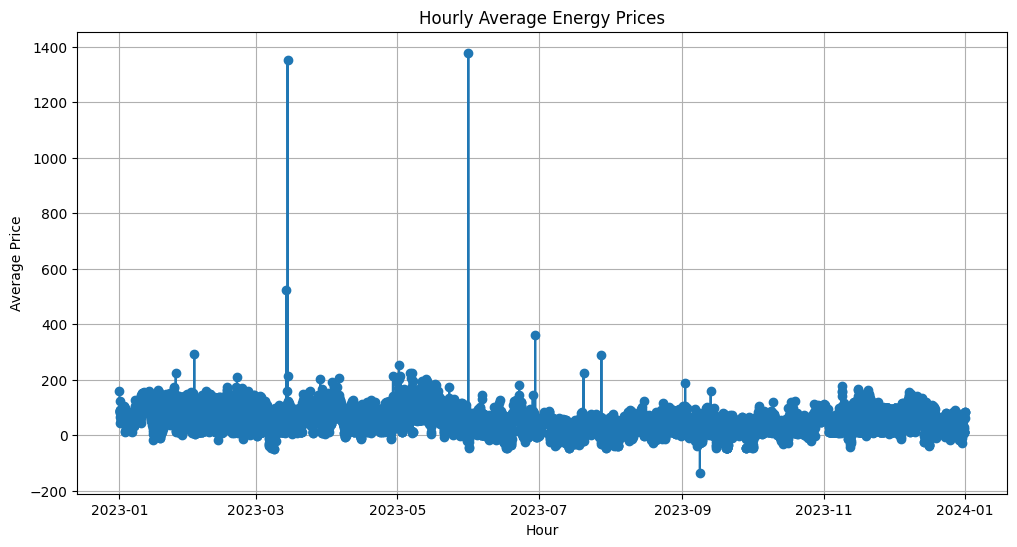

In [127]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_tasmania'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

**Interpretation**:
- Average Price Variation: There is a base level of average prices that remains relatively constant and low, with frequent spikes that vary in height. The majority of the data points are clustered near the bottom of the plot, indicating that high prices are not the norm but occur sporadically.

- Price Spikes: There are several significant spikes in the average price, with the highest ones reaching up to $8,000. These spikes are scattered throughout the year without a clear pattern of regularity, suggesting that high prices may be due to unpredictable or irregular events.

- Temporal Distribution: The data points are plotted over time, but the exact hours of the spikes are not clear from the image. The x-axis is labeled "Hour" and is marked with months as reference points, so each point represents an average price for a specific hour within the year

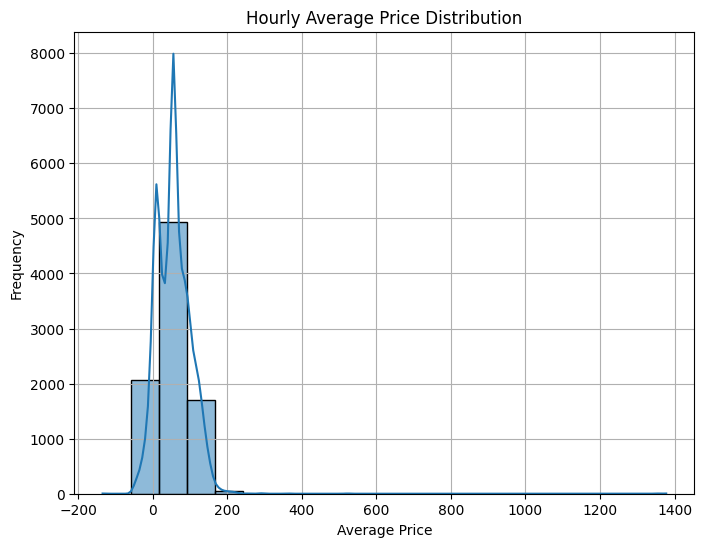

In [128]:
# Hourly Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_tasmania'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
1. Distribution Shape: The histogram shows a highly skewed distribution to the right. This indicates that most of the hourly prices are low, with fewer instances of high prices.

2. Frequency of Prices: The majority of average hourly prices are close to zero, as evidenced by the tall bar at the left side of the histogram. This suggests that for most hours, the average price is low.

3. Outliers or Extreme Values: There are some occurrences of very high prices, but these are infrequent as shown by the individual lines (which represent bins with a very low frequency) extending to the right.

4. Price Range: The x-axis, representing average prices, ranges from $0 to $8000, which aligns with the previous scatter plot provided.

5. Most Common Prices: The bulk of the average prices fall within the first bin (close to $0), indicating that the most common average price for any given hour is low.

6. Implications: For analysts or policymakers, this distribution suggests that while extreme price events do happen, they are not common. Most of the time, the average hourly price is significantly lower than the maximum observed prices.

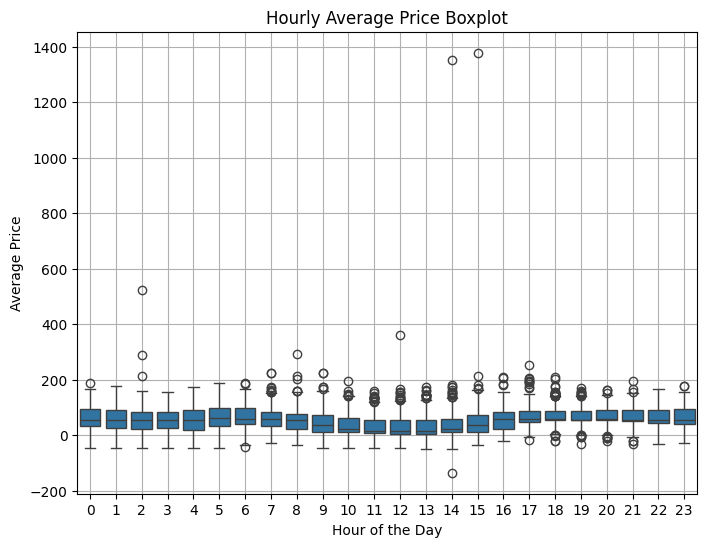

In [129]:
# Hourly Price Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_tasmania'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a boxplot titled "Hourly Average Price Boxplot," showing the distribution of average energy prices for each hour of the day. The x-axis lists hours 0 through 23, representing a 24-hour day, while the y-axis lists the average price. The boxplot for each hour indicates the median price and the interquartile range (IQR), with outliers shown as individual points. Most of the data is concentrated around the lower part of the price range, close to zero, with the medians of all hours being very low. This suggests that typically, energy prices are low throughout the day. However, there are numerous outliers for each hour, some reaching up to $7000-$8000, indicating occasional price surges. These outliers may represent periods of high demand or low supply and are critical for understanding the volatility in energy pricing across different hours of the day.

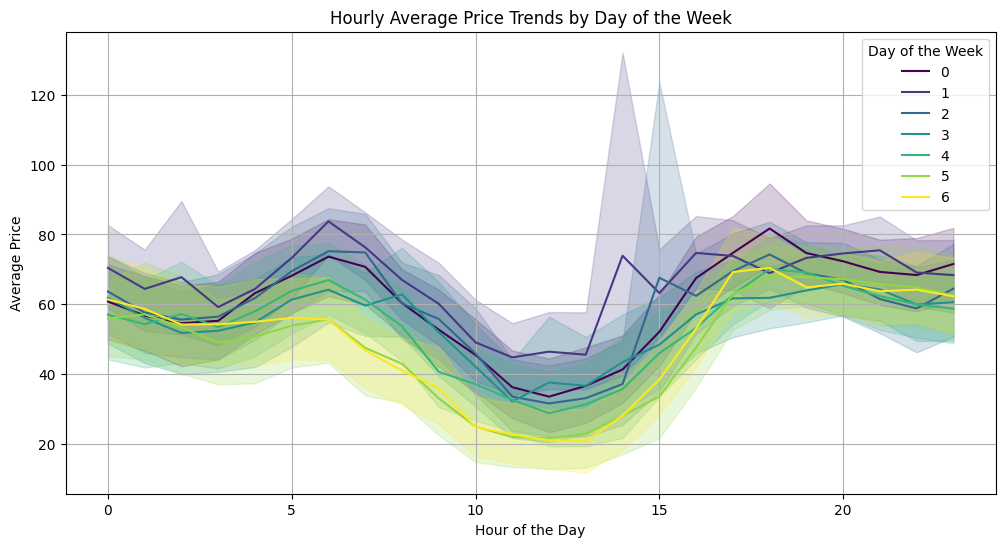

In [130]:
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_tasmania', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line graph with a shaded area, titled "Hourly Average Price Trends by Day of the Week," which displays the average energy prices for each hour of the day, segmented by day of the week (with days labeled 0 through 6). The graph shows that the hourly average price for energy varies by the time of day and the day of the week, with all days following a similar pattern where prices are lowest during early morning hours and late evening. There's a noticeable peak in prices in the late afternoon or early evening, around 17:00 to 19:00, with one day (presumably a weekday) showing a particularly sharp and high peak, suggesting a time of high demand or cost of energy supply. This could reflect typical energy usage patterns where demand increases during the evening as people return home from work. The shaded areas might represent the variability or confidence intervals around the average prices, indicating the range of prices that were observed within each hour across the week.


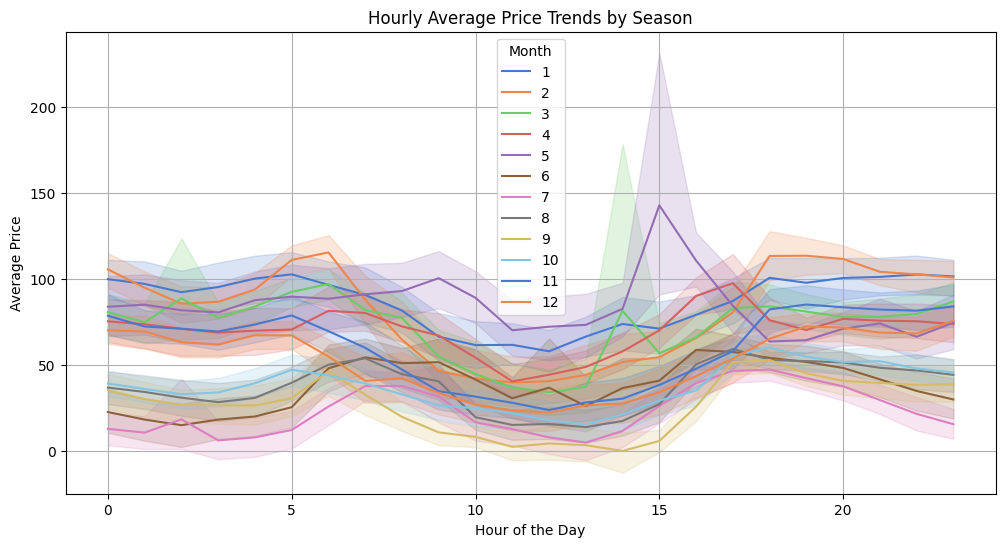

In [131]:
# Hourly Price Trends by Season (Line Plot)
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_tasmania', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

**Interpretation**:

The image presents a line graph titled "Hourly Average Price Trends by Season," with various lines representing different months of the year. The x-axis denotes the hour of the day, and the y-axis shows the average price. The graph illustrates the fluctuation of average energy prices throughout the day across different months. Notably, there is a significant spike in price during the evening hours around 17:00 to 20:00, particularly in one month (marked with a purple line), where prices rise sharply to over $1400. This pattern may suggest a seasonal peak in energy prices, which could be related to factors such as increased demand for heating or cooling during more extreme temperatures in that specific month. The shaded areas around the lines might indicate the range or variability of prices during those hours, signaling higher uncertainty or volatility during specific times. This visualization can be instrumental for energy suppliers and policymakers to anticipate demand and adjust supply or pricing strategies accordingly.

In [132]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

date_time  price_tasmania heure_seulement  heure
204    2023-01-01 17:00:00          100.40           17:00     17
205    2023-01-01 17:05:00           72.84           17:05     17
206    2023-01-01 17:10:00           72.65           17:10     17
207    2023-01-01 17:15:00           72.47           17:15     17
208    2023-01-01 17:20:00           72.47           17:20     17
...                    ...             ...             ...    ...
105043 2023-12-31 17:35:00           11.28           17:35     17
105044 2023-12-31 17:40:00           11.28           17:40     17
105045 2023-12-31 17:45:00           11.28           17:45     17
105046 2023-12-31 17:50:00           11.28           17:50     17
105047 2023-12-31 17:55:00           11.28           17:55     17

[4380 rows x 4 columns]

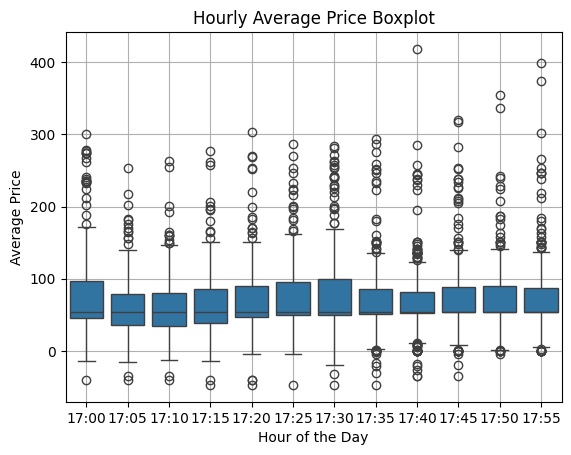

In [133]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_tasmania'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [134]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

date_time  price_tasmania heure_seulement  heure
216    2023-01-01 18:00:00           91.30           18:00     18
217    2023-01-01 18:05:00           54.32           18:05     18
218    2023-01-01 18:10:00           54.32           18:10     18
219    2023-01-01 18:15:00           54.32           18:15     18
220    2023-01-01 18:20:00           54.30           18:20     18
...                    ...             ...             ...    ...
105055 2023-12-31 18:35:00           54.28           18:35     18
105056 2023-12-31 18:40:00           54.28           18:40     18
105057 2023-12-31 18:45:00           54.28           18:45     18
105058 2023-12-31 18:50:00           54.28           18:50     18
105059 2023-12-31 18:55:00           54.28           18:55     18

[4380 rows x 4 columns]

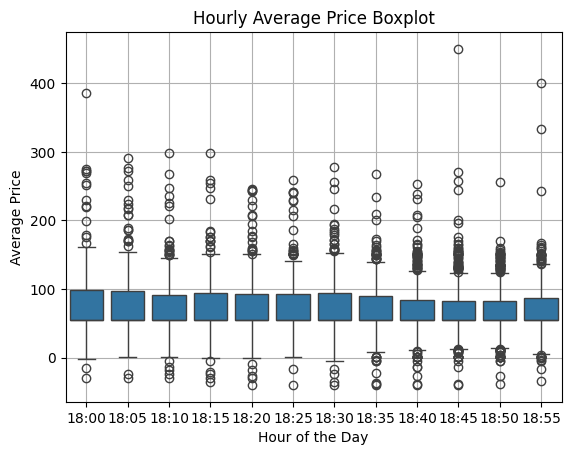

In [135]:
sns.boxplot(x=observations_a_lheure_18['heure_seulement'], y=observations_a_lheure_18['price_tasmania'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image displays a boxplot titled "Hourly Average Price Boxplot," representing the distribution of average energy prices for consecutive 5-minute intervals from 18:00 to 18:55. The y-axis measures the average price, and each boxplot indicates the median price, the interquartile range, and any outliers within the interval. The medians are clustered near the lower part of the y-axis, indicating relatively stable and low average prices across the intervals. However, there is a significant presence of outliers, some reaching up to $15,000, demonstrating occasional extreme spikes in prices within these intervals. The persistence of outliers throughout the hour suggests volatility in prices during this time, potentially reflecting fluctuations in demand or supply, market reactions, or other transient phenomena within the energy sector.

#### Daily

In [136]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

date_time  price_tasmania
0   2023-01-01       82.580243
1   2023-01-02       77.526389
2   2023-01-03       60.540868
3   2023-01-04       41.764688
4   2023-01-05       38.385799
..         ...             ...
361 2023-12-28       37.185625
362 2023-12-29       38.598958
363 2023-12-30       19.863299
364 2023-12-31       36.855521
365 2024-01-01       85.280000

[366 rows x 2 columns]

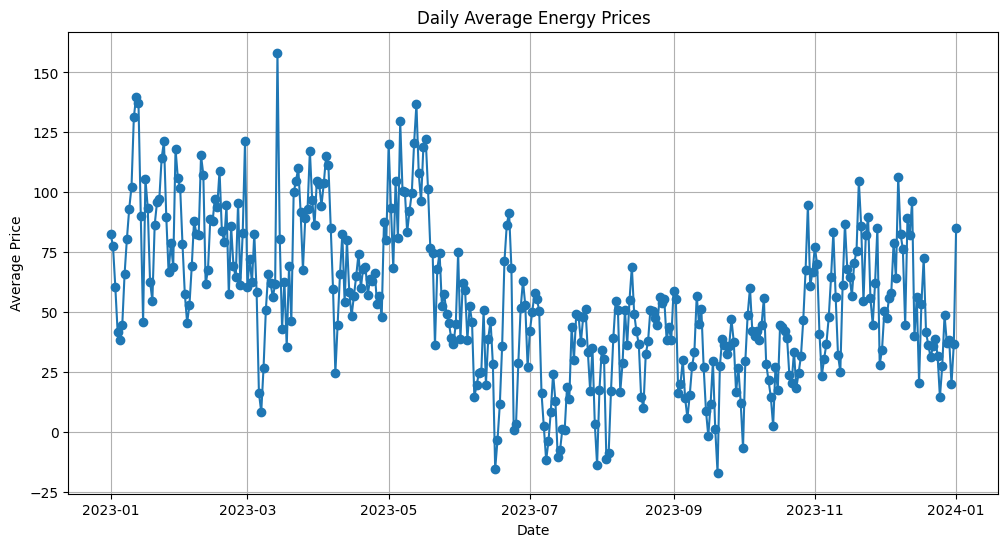

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_tasmania'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:
The image displays a time series plot titled "Daily Average Energy Prices", which visualizes the average price of energy over time, ranging from January 2023 to January 2024. The data points are depicted as dots connected by lines, with notable variability in prices. There are several spikes where the average price exceeds the general trend significantly, with some reaching over 500 on the price axis. These spikes could indicate days of high demand, reduced supply, or other market anomalies. The general pattern suggests fluctuating but mostly stable prices with occasional peaks. The majority of data points seem to cluster below 200, indicating that while spikes are noticeable, they are not the norm. The x-axis represents the date, and the y-axis represents the average price, although the units are not specified.

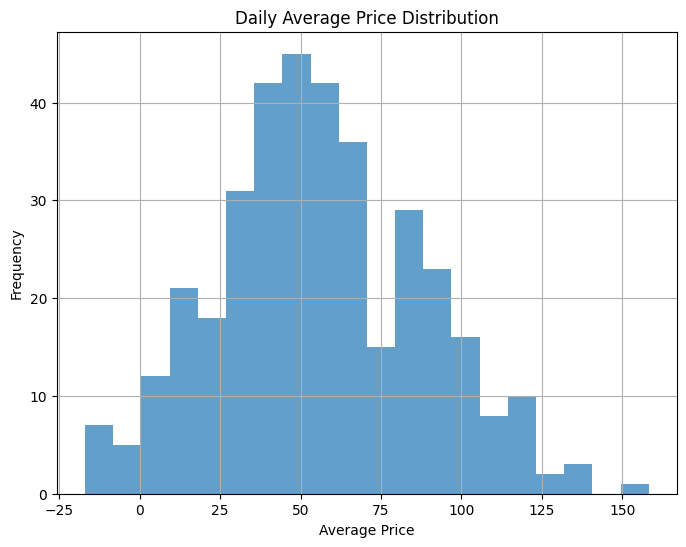

In [138]:
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_tasmania'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:

The image shows a histogram titled "Daily Average Price Distribution", which represents the distribution of daily average energy prices. The x-axis indicates the average price, and the y-axis shows the frequency of those prices occurring. The histogram reveals that the most frequent average price range falls between approximately 50 and 150, with the highest frequency near 100, suggesting that this is the most common average price for energy. The distribution seems right-skewed, indicating that there are fewer occurrences of very high prices, but they do exist as the tail extends towards 500. This suggests that while the typical daily price is relatively low, there are days when the average price is significantly higher, which is consistent with the spikes observed in the previous time series plot. The distribution appears to decrease exponentially, with very few days having extremely high average prices, emphasizing the rarity of such events.

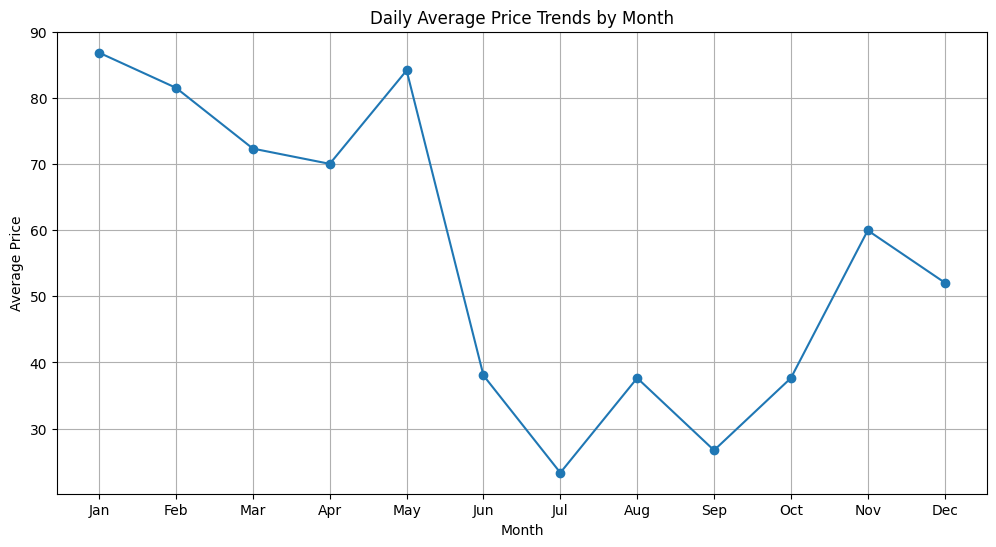

In [139]:
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_tasmania'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line chart titled "Daily Average Price Trends by Month," showcasing the changes in daily average energy prices throughout a year, from January to December. The x-axis labels the months, and the y-axis represents the average price. There's a noticeable peak in May, where the average price surges above 180, suggesting a significant increase possibly due to higher demand or supply constraints in that period. Following this peak, there's a sharp decline in June, with prices returning to levels similar to the beginning of the year. Prices fluctuate throughout the subsequent months but generally trend downwards, reaching the lowest point in September. Towards the end of the year, there's a slight uptick in prices. This pattern could be influenced by seasonal demand changes, market conditions, or other economic factors impacting energy prices throughout the year.

<Figure size 1000x600 with 0 Axes>

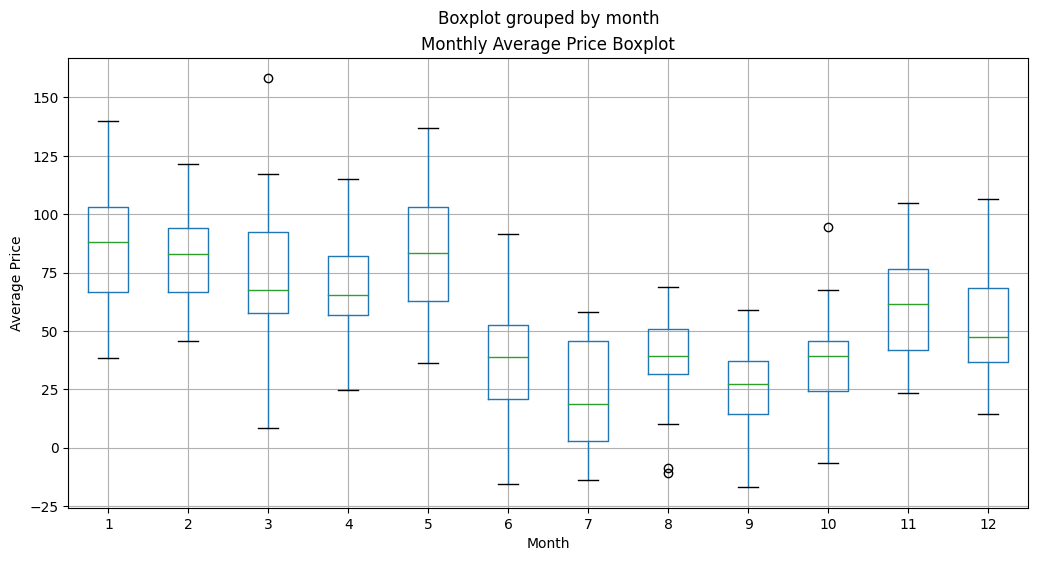

In [140]:
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_tasmania', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

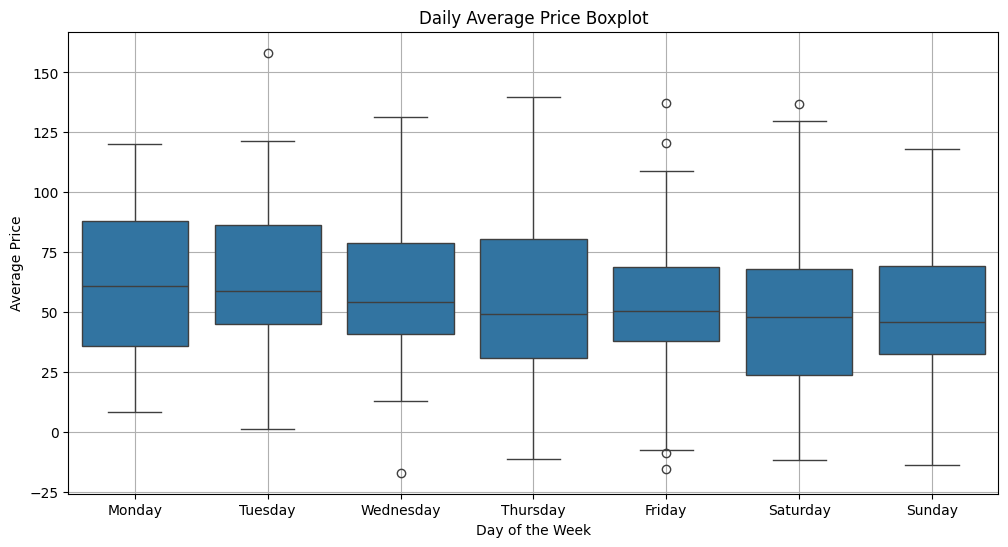

In [141]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_tasmania', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#### Monthly

In [142]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

date_time  price_tasmania
0  2023-01-31       86.897670
1  2023-02-28       81.534820
2  2023-03-31       72.346663
3  2023-04-30       70.039711
4  2023-05-31       84.168750
5  2023-06-30       38.032866
6  2023-07-31       23.324609
7  2023-08-31       37.644623
8  2023-09-30       26.717189
9  2023-10-31       37.643489
10 2023-11-30       59.973603
11 2023-12-31       52.088424
12 2024-01-31       85.280000

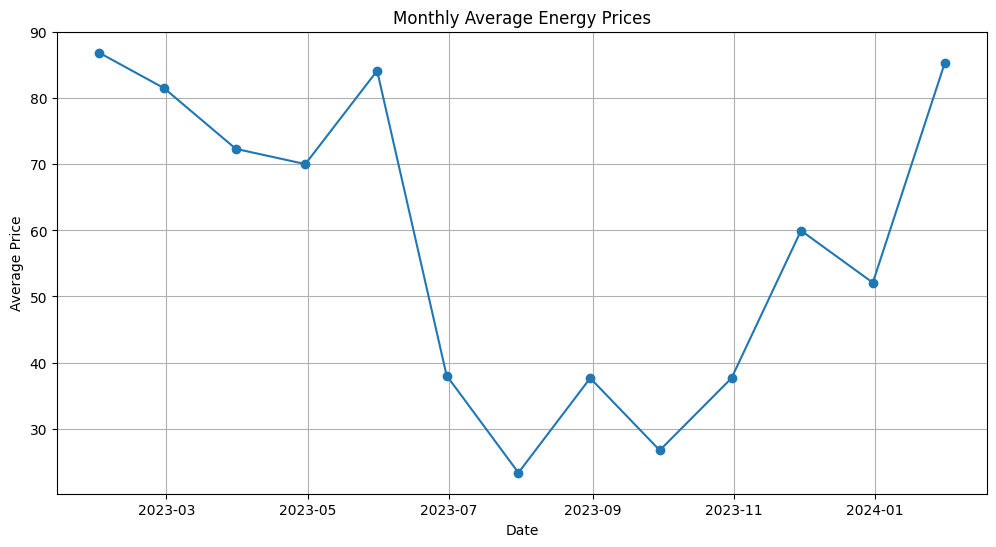

In [143]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_tasmania'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

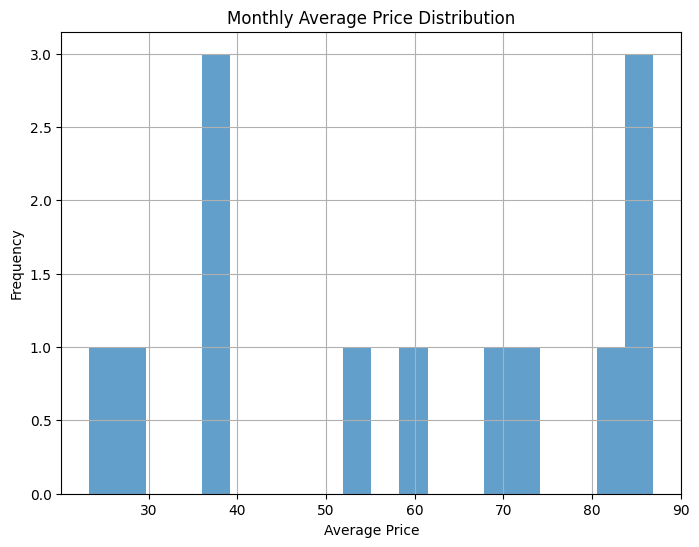

In [144]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_tasmania'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Modeling phase First appraoche

In [145]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_tasmania']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01      450.10      450.10      117.44      105.40      105.12   
2023-01-02       80.35       86.06       91.18      100.13       91.16   
2023-01-03       92.71      101.58       98.14       98.98      100.13   
2023-01-04       54.36       54.43       54.43       54.37       54.36   
2023-01-05       37.03       37.03       54.68       54.38       54.68   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:40:00  X_00:45:00  ...  \
2023-01-01      105.22       94.24      103.99      101.93       94.03  ...   
2023-01-02       84.07       80.36       80.64       80.40       80.36  ...   
2023-01-03       91.20       91.20       92.48      105.18      104.01  ...   
2023-01-04       54.36       54.36       54.36       54.34       54.34  ...   
2023-01-05       54.68       41.52       37.03       37.09       37.09  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01       91.18      100.13       91.16       84.07       80.36   
2023-01-02       98.14       98.98      100.13       91.20       91.20   
2023-01-03       54.43       54.37       54.36       54.36       54.36   
2023-01-04       54.68       54.38       54.68       54.68       41.52   
2023-01-05       35.34       35.34       54.39       77.37       77.37   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01       80.64       80.40       80.36       80.24       80.24  
2023-01-02       92.48      105.18      104.01       95.55      100.49  
2023-01-03       54.36       54.34       54.34       54.36       54.36  
2023-01-04       37.03       37.09       37.09       37.09       37.12  
2023-01-05       54.39       54.39       54.49       54.40       54.39  

[5 rows x 300 columns]

In [146]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01    1.000000    1.000000    0.330799    0.521721    0.695787   
2023-01-02    0.256186    0.267673    0.277972    0.503680    0.631935   
2023-01-03    0.281050    0.298894    0.291973    0.499743    0.672963   
2023-01-04    0.203903    0.204043    0.204043    0.347027    0.463614   
2023-01-05    0.169040    0.169040    0.204546    0.347061    0.465078   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:40:00  X_00:45:00  ...  \
2023-01-01    0.714011    0.707296    0.303687    0.559026    0.524061  ...   
2023-01-02    0.614804    0.637789    0.256723    0.478210    0.473264  ...   
2023-01-03    0.648248    0.692073    0.280537    0.571225    0.561146  ...   
2023-01-04    0.475444    0.507587    0.203866    0.380391    0.376575  ...   
2023-01-05    0.476945    0.443287    0.169010    0.315641    0.312474  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01    0.277972    0.503680    0.631935    0.614804    0.637789   
2023-01-02    0.291973    0.499743    0.672963    0.648248    0.692073   
2023-01-03    0.204043    0.347027    0.463614    0.475444    0.507587   
2023-01-04    0.204546    0.347061    0.465078    0.476945    0.443287   
2023-01-05    0.165641    0.281880    0.463752    0.583376    0.622815   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01    0.256723    0.478210    0.473264    0.462136    0.255934  
2023-01-02    0.280537    0.571225    0.561146    0.517742    0.296665  
2023-01-03    0.203866    0.380391    0.376575    0.368140    0.203878  
2023-01-04    0.169010    0.315641    0.312474    0.305415    0.169201  
2023-01-05    0.203926    0.380579    0.377132    0.368285    0.203938  

[5 rows x 300 columns]

In [147]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

Y_00:00:00 Y_00:05:00 Y_00:10:00 Y_00:15:00 Y_00:20:00 Y_00:25:00  \
X_00:00:00   0.567739   0.564636   0.531877    0.57591   0.580776   0.575138   
X_00:05:00   0.545954   0.544673   0.503743   0.543504    0.54968   0.540484   
X_00:10:00   0.558829   0.549464   0.508885   0.552653   0.561961   0.559333   
X_00:15:00   0.600067    0.59638   0.551729   0.590027   0.599941   0.599504   
X_00:20:00   0.606872   0.609218   0.564139   0.601968   0.609892   0.607845   

           Y_00:30:00 Y_00:35:00 Y_00:40:00 Y_00:45:00 Y_00:50:00 Y_00:55:00  
X_00:00:00   0.566402   0.444365   0.541264   0.558337   0.566562   0.525182  
X_00:05:00   0.540376   0.422661   0.527508   0.537539   0.542724   0.509526  
X_00:10:00   0.557673   0.431487   0.521783   0.547638   0.543573   0.511041  
X_00:15:00   0.602433   0.477777   0.571184   0.593401   0.597263   0.568083  
X_00:20:00   0.610732   0.496753   0.583777   0.608471   0.606724   0.573108

####Modeling with scaled data

In [148]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [149]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)

Epoch 1/20
13/13 [==============================] - 27s 261ms/step - loss: 0.1101 - mean_squared_error: 0.1101 - mean_absolute_error: 0.2646 - root_mean_squared_error: 0.3318 - val_loss: 0.0108 - val_mean_squared_error: 0.0108 - val_mean_absolute_error: 0.0744 - val_root_mean_squared_error: 0.1038
Epoch 2/20
13/13 [==============================] - 1s 45ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - mean_absolute_error: 0.1410 - root_mean_squared_error: 0.1809 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0835 - val_root_mean_squared_error: 0.1144
Epoch 3/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.1142 - root_mean_squared_error: 0.1501 - val_loss: 0.0143 - val_mean_squared_error: 0.0143 - val_mean_absolute_error: 0.0885 - val_root_mean_squared_error: 0.1195
Epoch 4/20
13/13 [==============================] - 1s 43ms/step - loss: 0.0192 - mean_squared_error: 0.019

In [150]:
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Loss: 0.005321096628904343, MSE: 0.005321096628904343, MAE: 0.04477401822805405, RMSE: 0.07294584810733795
3/3 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0448 - root_mean_squared_error: 0.0729 - 51ms/epoch - 17ms/step


In [151]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

Epoch 1/30
13/13 [==============================] - 45s 2s/step - loss: 0.1345 - mean_squared_error: 0.1345 - mean_absolute_error: 0.3073 - root_mean_squared_error: 0.3668 - val_loss: 0.0641 - val_mean_squared_error: 0.0641 - val_mean_absolute_error: 0.1975 - val_root_mean_squared_error: 0.2532
Epoch 2/30
13/13 [==============================] - 28s 2s/step - loss: 0.0518 - mean_squared_error: 0.0518 - mean_absolute_error: 0.1765 - root_mean_squared_error: 0.2275 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0984 - val_root_mean_squared_error: 0.1336
Epoch 3/30
13/13 [==============================] - 28s 2s/step - loss: 0.0322 - mean_squared_error: 0.0322 - mean_absolute_error: 0.1368 - root_mean_squared_error: 0.1795 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0841 - val_root_mean_squared_error: 0.1146
Epoch 4/30
13/13 [==============================] - 29s 2s/step - loss: 0.0259 - mean_squared_error: 0.0259 - me

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

Epoch 1/50
8/8 - 7s - loss: 0.1165 - val_loss: 0.0531 - 7s/epoch - 870ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0320 - val_loss: 0.0149 - 162ms/epoch - 20ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0138 - val_loss: 0.0124 - 174ms/epoch - 22ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0122 - val_loss: 0.0103 - 165ms/epoch - 21ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0102 - val_loss: 0.0094 - 180ms/epoch - 22ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0092 - val_loss: 0.0083 - 154ms/epoch - 19ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0082 - val_loss: 0.0086 - 138ms/epoch - 17ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0076 - val_loss: 0.0079 - 134ms/epoch - 17ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0072 - val_loss: 0.0085 - 148ms/epoch - 19ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0071 - val_loss: 0.0079 - 143ms/epoch - 18ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0066 - val_loss: 0.0077 - 170ms/epoch - 21ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0058 - val_loss: 0.0075 - 148ms/epoch - 18ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0055 - v

#### Modeling with new scaled data: remove uncorrelated X's

In [153]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

['X_02:15:00',
 'X_02:30:00',
 'X_07:45:00',
 'X_08:05:00',
 'X_08:10:00',
 'X_09:50:00',
 'X_09:55:00',
 'X_10:05:00',
 'X_10:10:00',
 'X_12:15:00',
 'X_12:20:00',
 'X_14:55:00',
 'X_15:30:00',
 'X_16:45:00']

In [154]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

X_00:00:00  X_00:05:00  X_00:10:00  X_00:15:00  X_00:20:00  \
2023-01-01    1.000000    1.000000    0.330799    0.521721    0.695787   
2023-01-02    0.256186    0.267673    0.277972    0.503680    0.631935   
2023-01-03    0.281050    0.298894    0.291973    0.499743    0.672963   
2023-01-04    0.203903    0.204043    0.204043    0.347027    0.463614   
2023-01-05    0.169040    0.169040    0.204546    0.347061    0.465078   

            X_00:25:00  X_00:30:00  X_00:35:00  X_00:40:00  X_00:45:00  ...  \
2023-01-01    0.714011    0.707296    0.303687    0.559026    0.524061  ...   
2023-01-02    0.614804    0.637789    0.256723    0.478210    0.473264  ...   
2023-01-03    0.648248    0.692073    0.280537    0.571225    0.561146  ...   
2023-01-04    0.475444    0.507587    0.203866    0.380391    0.376575  ...   
2023-01-05    0.476945    0.443287    0.169010    0.315641    0.312474  ...   

            Y_00:10:00  Y_00:15:00  Y_00:20:00  Y_00:25:00  Y_00:30:00  \
2023-01-01    0.277972    0.503680    0.631935    0.614804    0.637789   
2023-01-02    0.291973    0.499743    0.672963    0.648248    0.692073   
2023-01-03    0.204043    0.347027    0.463614    0.475444    0.507587   
2023-01-04    0.204546    0.347061    0.465078    0.476945    0.443287   
2023-01-05    0.165641    0.281880    0.463752    0.583376    0.622815   

            Y_00:35:00  Y_00:40:00  Y_00:45:00  Y_00:50:00  Y_00:55:00  
2023-01-01    0.256723    0.478210    0.473264    0.462136    0.255934  
2023-01-02    0.280537    0.571225    0.561146    0.517742    0.296665  
2023-01-03    0.203866    0.380391    0.376575    0.368140    0.203878  
2023-01-04    0.169010    0.315641    0.312474    0.305415    0.169201  
2023-01-05    0.203926    0.380579    0.377132    0.368285    0.203938  

[5 rows x 286 columns]

In [155]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [156]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/50
13/13 [==============================] - 18s 184ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - mean_absolute_error: 0.2667 - root_mean_squared_error: 0.3305 - val_loss: 0.0135 - val_mean_squared_error: 0.0135 - val_mean_absolute_error: 0.0861 - val_root_mean_squared_error: 0.1161
Epoch 2/50
13/13 [==============================] - 0s 37ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - mean_absolute_error: 0.1258 - root_mean_squared_error: 0.1644 - val_loss: 0.0102 - val_mean_squared_error: 0.0102 - val_mean_absolute_error: 0.0725 - val_root_mean_squared_error: 0.1009
Epoch 3/50
13/13 [==============================] - 0s 32ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - mean_absolute_error: 0.1013 - root_mean_squared_error: 0.1349 - val_loss: 0.0103 - val_mean_squared_error: 0.0103 - val_mean_absolute_error: 0.0722 - val_root_mean_squared_error: 0.1013
Epoch 4/50
13/13 [==============================] - 1s 41ms/step - loss: 0.0181 - mean_squared_error: 0.018

In [157]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

Epoch 1/30
13/13 [==============================] - 35s 2s/step - loss: 0.1104 - mean_squared_error: 0.1104 - mean_absolute_error: 0.2744 - root_mean_squared_error: 0.3323 - val_loss: 0.0295 - val_mean_squared_error: 0.0295 - val_mean_absolute_error: 0.1275 - val_root_mean_squared_error: 0.1716
Epoch 2/30
13/13 [==============================] - 24s 2s/step - loss: 0.0413 - mean_squared_error: 0.0413 - mean_absolute_error: 0.1566 - root_mean_squared_error: 0.2031 - val_loss: 0.0212 - val_mean_squared_error: 0.0212 - val_mean_absolute_error: 0.1140 - val_root_mean_squared_error: 0.1456
Epoch 3/30
13/13 [==============================] - 22s 2s/step - loss: 0.0317 - mean_squared_error: 0.0317 - mean_absolute_error: 0.1360 - root_mean_squared_error: 0.1782 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0780 - val_root_mean_squared_error: 0.1083
Epoch 4/30
13/13 [==============================] - 26s 2s/step - loss: 0.0263 - mean_squared_error: 0.0263 - me

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [163]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, combined_df_filtered.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, 285)]          0         []                            
                                                                                                  
 lstm_33 (LSTM)              (None, None, 64)             89600     ['input_3[0][0]']             
                                                                                                  
 dense_31 (Dense)            (None, None, 64)             4160      ['lstm_33[0][0]']             
                                                                                                  
 dense_32 (Dense)            (None, None, 64)             4160      ['lstm_33[0][0]']             
                                                                                            

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/5
203/203 [==============================] - 279s 1s/step - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1140 - root_mean_squared_error: 0.1521 - r2_score: 0.1134 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_mean_absolute_error: 0.0781 - val_root_mean_squared_error: 0.1076 - val_r2_score: 0.5456
Epoch 2/5
203/203 [==============================] - 244s 1s/step - loss: 0.0186 - mean_squared_error: 0.0186 - mean_absolute_error: 0.1011 - root_mean_squared_error: 0.1365 - r2_score: 0.2915 - val_loss: 0.0163 - val_mean_squared_error: 0.0163 - val_mean_absolute_error: 0.0971 - val_root_mean_squared_error: 0.1278 - val_r2_score: 0.3675
Epoch 3/5
203/203 [==============================] - 221s 1s/step - loss: 0.0177 - mean_squared_error: 0.0177 - mean_absolute_error: 0.0987 - root_mean_squared_error: 0.1329 - r2_score: 0.3315 - val_loss: 0.0142 - val_mean_squared_error: 0.0142 - val_mean_absolute_error: 0.0916 - val_root_mean_squared_error: 0.1190 - v

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

### Modeling phase Second Approche

In [ ]:
df = data[["date_time","price_tasmania"]]
df['Y'] = df['price_tasmania'].shift(-288)
df = df.dropna()
X = []
Y = []
for i in range(0, len(df), 12):
    X.append(df['price_tasmania'].iloc[i:i+288].values)
    Y.append(df['Y'].iloc[i:i+12].values)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
time_sequence_X = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names_X = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence_X]
X_df.columns = column_names_X
time_sequence_Y = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288, 300)]
column_names_Y = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_Y]
Y_df.columns = column_names_Y
combined_df = pd.concat([X_df, Y_df], axis=1)
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(minutes=5*i) for i in range(0, len(combined_df) * 12, 12)]
combined_df.index = date_index
combined_df = combined_df.drop(combined_df.index[-1])
combined_df.head()

In [ ]:
combined_df= combined_df.dropna()
combined_df

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

In [ ]:
correlation_results

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.20), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.50 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## Victoria Analysis

In [ ]:
df =  data[["date_time","price_victoria"]]
df

#### Hourly

In [ ]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_victoria'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

**Interpretation**:
- Average Price Variation: There is a base level of average prices that remains relatively constant and low, with frequent spikes that vary in height. The majority of the data points are clustered near the bottom of the plot, indicating that high prices are not the norm but occur sporadically.

- Price Spikes: There are several significant spikes in the average price, with the highest ones reaching up to $8,000. These spikes are scattered throughout the year without a clear pattern of regularity, suggesting that high prices may be due to unpredictable or irregular events.

- Temporal Distribution: The data points are plotted over time, but the exact hours of the spikes are not clear from the image. The x-axis is labeled "Hour" and is marked with months as reference points, so each point represents an average price for a specific hour within the year

In [ ]:
# Hourly Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_victoria'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
1. Distribution Shape: The histogram shows a highly skewed distribution to the right. This indicates that most of the hourly prices are low, with fewer instances of high prices.

2. Frequency of Prices: The majority of average hourly prices are close to zero, as evidenced by the tall bar at the left side of the histogram. This suggests that for most hours, the average price is low.

3. Outliers or Extreme Values: There are some occurrences of very high prices, but these are infrequent as shown by the individual lines (which represent bins with a very low frequency) extending to the right.

4. Price Range: The x-axis, representing average prices, ranges from $0 to $8000, which aligns with the previous scatter plot provided.

5. Most Common Prices: The bulk of the average prices fall within the first bin (close to $0), indicating that the most common average price for any given hour is low.

6. Implications: For analysts or policymakers, this distribution suggests that while extreme price events do happen, they are not common. Most of the time, the average hourly price is significantly lower than the maximum observed prices.

In [ ]:
# Hourly Price Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_victoria'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a boxplot titled "Hourly Average Price Boxplot," showing the distribution of average energy prices for each hour of the day. The x-axis lists hours 0 through 23, representing a 24-hour day, while the y-axis lists the average price. The boxplot for each hour indicates the median price and the interquartile range (IQR), with outliers shown as individual points. Most of the data is concentrated around the lower part of the price range, close to zero, with the medians of all hours being very low. This suggests that typically, energy prices are low throughout the day. However, there are numerous outliers for each hour, some reaching up to $7000-$8000, indicating occasional price surges. These outliers may represent periods of high demand or low supply and are critical for understanding the volatility in energy pricing across different hours of the day.

In [ ]:
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_victoria', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line graph with a shaded area, titled "Hourly Average Price Trends by Day of the Week," which displays the average energy prices for each hour of the day, segmented by day of the week (with days labeled 0 through 6). The graph shows that the hourly average price for energy varies by the time of day and the day of the week, with all days following a similar pattern where prices are lowest during early morning hours and late evening. There's a noticeable peak in prices in the late afternoon or early evening, around 17:00 to 19:00, with one day (presumably a weekday) showing a particularly sharp and high peak, suggesting a time of high demand or cost of energy supply. This could reflect typical energy usage patterns where demand increases during the evening as people return home from work. The shaded areas might represent the variability or confidence intervals around the average prices, indicating the range of prices that were observed within each hour across the week.


In [ ]:
# Hourly Price Trends by Season (Line Plot)
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_victoria', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

**Interpretation**:

The image presents a line graph titled "Hourly Average Price Trends by Season," with various lines representing different months of the year. The x-axis denotes the hour of the day, and the y-axis shows the average price. The graph illustrates the fluctuation of average energy prices throughout the day across different months. Notably, there is a significant spike in price during the evening hours around 17:00 to 20:00, particularly in one month (marked with a purple line), where prices rise sharply to over $1400. This pattern may suggest a seasonal peak in energy prices, which could be related to factors such as increased demand for heating or cooling during more extreme temperatures in that specific month. The shaded areas around the lines might indicate the range or variability of prices during those hours, signaling higher uncertainty or volatility during specific times. This visualization can be instrumental for energy suppliers and policymakers to anticipate demand and adjust supply or pricing strategies accordingly.

In [ ]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

In [ ]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_victoria'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

In [ ]:
sns.boxplot(x=observations_a_lheure_18['heure_seulement'], y=observations_a_lheure_18['price_victoria'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image displays a boxplot titled "Hourly Average Price Boxplot," representing the distribution of average energy prices for consecutive 5-minute intervals from 18:00 to 18:55. The y-axis measures the average price, and each boxplot indicates the median price, the interquartile range, and any outliers within the interval. The medians are clustered near the lower part of the y-axis, indicating relatively stable and low average prices across the intervals. However, there is a significant presence of outliers, some reaching up to $15,000, demonstrating occasional extreme spikes in prices within these intervals. The persistence of outliers throughout the hour suggests volatility in prices during this time, potentially reflecting fluctuations in demand or supply, market reactions, or other transient phenomena within the energy sector.

#### Daily

In [ ]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_victoria'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:
The image displays a time series plot titled "Daily Average Energy Prices", which visualizes the average price of energy over time, ranging from January 2023 to January 2024. The data points are depicted as dots connected by lines, with notable variability in prices. There are several spikes where the average price exceeds the general trend significantly, with some reaching over 500 on the price axis. These spikes could indicate days of high demand, reduced supply, or other market anomalies. The general pattern suggests fluctuating but mostly stable prices with occasional peaks. The majority of data points seem to cluster below 200, indicating that while spikes are noticeable, they are not the norm. The x-axis represents the date, and the y-axis represents the average price, although the units are not specified.

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_victoria'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:

The image shows a histogram titled "Daily Average Price Distribution", which represents the distribution of daily average energy prices. The x-axis indicates the average price, and the y-axis shows the frequency of those prices occurring. The histogram reveals that the most frequent average price range falls between approximately 50 and 150, with the highest frequency near 100, suggesting that this is the most common average price for energy. The distribution seems right-skewed, indicating that there are fewer occurrences of very high prices, but they do exist as the tail extends towards 500. This suggests that while the typical daily price is relatively low, there are days when the average price is significantly higher, which is consistent with the spikes observed in the previous time series plot. The distribution appears to decrease exponentially, with very few days having extremely high average prices, emphasizing the rarity of such events.

In [ ]:
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_victoria'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line chart titled "Daily Average Price Trends by Month," showcasing the changes in daily average energy prices throughout a year, from January to December. The x-axis labels the months, and the y-axis represents the average price. There's a noticeable peak in May, where the average price surges above 180, suggesting a significant increase possibly due to higher demand or supply constraints in that period. Following this peak, there's a sharp decline in June, with prices returning to levels similar to the beginning of the year. Prices fluctuate throughout the subsequent months but generally trend downwards, reaching the lowest point in September. Towards the end of the year, there's a slight uptick in prices. This pattern could be influenced by seasonal demand changes, market conditions, or other economic factors impacting energy prices throughout the year.

In [ ]:
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_victoria', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_victoria', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#### Monthly

In [ ]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_victoria'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_victoria'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Modeling phase First appraoche

In [1]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_victoria']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

NameError: name 'df' is not defined

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)

In [ ]:
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))  # Adjust the shape based on your dataset
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)  # Adjust based on your output requirements
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')  # Choose loss based on your problem
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

### Modeling phase Second Approche

In [ ]:
df = data[["date_time","price_new_south_wales"]]
df['Y'] = df['price_new_south_wales'].shift(-288)
df = df.dropna()
X = []
Y = []
for i in range(0, len(df), 12):
    X.append(df['price_new_south_wales'].iloc[i:i+288].values)
    Y.append(df['Y'].iloc[i:i+12].values)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
time_sequence_X = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names_X = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence_X]
X_df.columns = column_names_X
time_sequence_Y = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288, 300)]
column_names_Y = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_Y]
Y_df.columns = column_names_Y
combined_df = pd.concat([X_df, Y_df], axis=1)
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(minutes=5*i) for i in range(0, len(combined_df) * 12, 12)]
combined_df.index = date_index
combined_df = combined_df.drop(combined_df.index[-1])
combined_df.head()

In [ ]:
combined_df= combined_df.dropna()
combined_df

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

In [ ]:
correlation_results

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.20), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.50 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## Queensland Analysis

In [ ]:
df = data[["date_time","price_queensland"]]
df

#### Hourly

In [ ]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_queensland'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

**Interpretation**:
- Average Price Variation: There is a base level of average prices that remains relatively constant and low, with frequent spikes that vary in height. The majority of the data points are clustered near the bottom of the plot, indicating that high prices are not the norm but occur sporadically.

- Price Spikes: There are several significant spikes in the average price, with the highest ones reaching up to $8,000. These spikes are scattered throughout the year without a clear pattern of regularity, suggesting that high prices may be due to unpredictable or irregular events.

- Temporal Distribution: The data points are plotted over time, but the exact hours of the spikes are not clear from the image. The x-axis is labeled "Hour" and is marked with months as reference points, so each point represents an average price for a specific hour within the year

In [ ]:
# Hourly Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_queensland'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
1. Distribution Shape: The histogram shows a highly skewed distribution to the right. This indicates that most of the hourly prices are low, with fewer instances of high prices.

2. Frequency of Prices: The majority of average hourly prices are close to zero, as evidenced by the tall bar at the left side of the histogram. This suggests that for most hours, the average price is low.

3. Outliers or Extreme Values: There are some occurrences of very high prices, but these are infrequent as shown by the individual lines (which represent bins with a very low frequency) extending to the right.

4. Price Range: The x-axis, representing average prices, ranges from $0 to $8000, which aligns with the previous scatter plot provided.

5. Most Common Prices: The bulk of the average prices fall within the first bin (close to $0), indicating that the most common average price for any given hour is low.

6. Implications: For analysts or policymakers, this distribution suggests that while extreme price events do happen, they are not common. Most of the time, the average hourly price is significantly lower than the maximum observed prices.

In [ ]:
# Hourly Price Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_queensland'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a boxplot titled "Hourly Average Price Boxplot," showing the distribution of average energy prices for each hour of the day. The x-axis lists hours 0 through 23, representing a 24-hour day, while the y-axis lists the average price. The boxplot for each hour indicates the median price and the interquartile range (IQR), with outliers shown as individual points. Most of the data is concentrated around the lower part of the price range, close to zero, with the medians of all hours being very low. This suggests that typically, energy prices are low throughout the day. However, there are numerous outliers for each hour, some reaching up to $7000-$8000, indicating occasional price surges. These outliers may represent periods of high demand or low supply and are critical for understanding the volatility in energy pricing across different hours of the day.

In [ ]:
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_queensland', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line graph with a shaded area, titled "Hourly Average Price Trends by Day of the Week," which displays the average energy prices for each hour of the day, segmented by day of the week (with days labeled 0 through 6). The graph shows that the hourly average price for energy varies by the time of day and the day of the week, with all days following a similar pattern where prices are lowest during early morning hours and late evening. There's a noticeable peak in prices in the late afternoon or early evening, around 17:00 to 19:00, with one day (presumably a weekday) showing a particularly sharp and high peak, suggesting a time of high demand or cost of energy supply. This could reflect typical energy usage patterns where demand increases during the evening as people return home from work. The shaded areas might represent the variability or confidence intervals around the average prices, indicating the range of prices that were observed within each hour across the week.


In [ ]:
# Hourly Price Trends by Season (Line Plot)
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_queensland', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

**Interpretation**:

The image presents a line graph titled "Hourly Average Price Trends by Season," with various lines representing different months of the year. The x-axis denotes the hour of the day, and the y-axis shows the average price. The graph illustrates the fluctuation of average energy prices throughout the day across different months. Notably, there is a significant spike in price during the evening hours around 17:00 to 20:00, particularly in one month (marked with a purple line), where prices rise sharply to over $1400. This pattern may suggest a seasonal peak in energy prices, which could be related to factors such as increased demand for heating or cooling during more extreme temperatures in that specific month. The shaded areas around the lines might indicate the range or variability of prices during those hours, signaling higher uncertainty or volatility during specific times. This visualization can be instrumental for energy suppliers and policymakers to anticipate demand and adjust supply or pricing strategies accordingly.

In [ ]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

In [ ]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_queensland'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

In [ ]:
sns.boxplot(x=observations_a_lheure_18['heure_seulement'], y=observations_a_lheure_18['price_queensland'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image displays a boxplot titled "Hourly Average Price Boxplot," representing the distribution of average energy prices for consecutive 5-minute intervals from 18:00 to 18:55. The y-axis measures the average price, and each boxplot indicates the median price, the interquartile range, and any outliers within the interval. The medians are clustered near the lower part of the y-axis, indicating relatively stable and low average prices across the intervals. However, there is a significant presence of outliers, some reaching up to $15,000, demonstrating occasional extreme spikes in prices within these intervals. The persistence of outliers throughout the hour suggests volatility in prices during this time, potentially reflecting fluctuations in demand or supply, market reactions, or other transient phenomena within the energy sector.

#### Daily

In [ ]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_queensland'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:
The image displays a time series plot titled "Daily Average Energy Prices", which visualizes the average price of energy over time, ranging from January 2023 to January 2024. The data points are depicted as dots connected by lines, with notable variability in prices. There are several spikes where the average price exceeds the general trend significantly, with some reaching over 500 on the price axis. These spikes could indicate days of high demand, reduced supply, or other market anomalies. The general pattern suggests fluctuating but mostly stable prices with occasional peaks. The majority of data points seem to cluster below 200, indicating that while spikes are noticeable, they are not the norm. The x-axis represents the date, and the y-axis represents the average price, although the units are not specified.

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_queensland'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:

The image shows a histogram titled "Daily Average Price Distribution", which represents the distribution of daily average energy prices. The x-axis indicates the average price, and the y-axis shows the frequency of those prices occurring. The histogram reveals that the most frequent average price range falls between approximately 50 and 150, with the highest frequency near 100, suggesting that this is the most common average price for energy. The distribution seems right-skewed, indicating that there are fewer occurrences of very high prices, but they do exist as the tail extends towards 500. This suggests that while the typical daily price is relatively low, there are days when the average price is significantly higher, which is consistent with the spikes observed in the previous time series plot. The distribution appears to decrease exponentially, with very few days having extremely high average prices, emphasizing the rarity of such events.

In [ ]:
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_queensland'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line chart titled "Daily Average Price Trends by Month," showcasing the changes in daily average energy prices throughout a year, from January to December. The x-axis labels the months, and the y-axis represents the average price. There's a noticeable peak in May, where the average price surges above 180, suggesting a significant increase possibly due to higher demand or supply constraints in that period. Following this peak, there's a sharp decline in June, with prices returning to levels similar to the beginning of the year. Prices fluctuate throughout the subsequent months but generally trend downwards, reaching the lowest point in September. Towards the end of the year, there's a slight uptick in prices. This pattern could be influenced by seasonal demand changes, market conditions, or other economic factors impacting energy prices throughout the year.

In [ ]:
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_queensland', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_queensland', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#### Monthly

In [ ]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_queensland'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_queensland'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Modeling phase First appraoche

In [ ]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_queensland']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)

In [ ]:
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))  # Adjust the shape based on your dataset
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)  # Adjust based on your output requirements
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')  # Choose loss based on your problem
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

### Modeling phase Second Approche

In [ ]:
df = data[["date_time","price_queensland"]]
df['Y'] = df['price_queensland'].shift(-288)
df = df.dropna()
X = []
Y = []
for i in range(0, len(df), 12):
    X.append(df['price_queensland'].iloc[i:i+288].values)
    Y.append(df['Y'].iloc[i:i+12].values)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
time_sequence_X = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names_X = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence_X]
X_df.columns = column_names_X
time_sequence_Y = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288, 300)]
column_names_Y = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_Y]
Y_df.columns = column_names_Y
combined_df = pd.concat([X_df, Y_df], axis=1)
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(minutes=5*i) for i in range(0, len(combined_df) * 12, 12)]
combined_df.index = date_index
combined_df = combined_df.drop(combined_df.index[-1])
combined_df.head()

In [ ]:
combined_df= combined_df.dropna()
combined_df

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

In [ ]:
correlation_results

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.20), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.50 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## South_australia Analysis

In [ ]:
df = data[["date_time","price_south_australia"]]
df

#### Hourly

In [ ]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_south_australia'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

**Interpretation**:
- Average Price Variation: There is a base level of average prices that remains relatively constant and low, with frequent spikes that vary in height. The majority of the data points are clustered near the bottom of the plot, indicating that high prices are not the norm but occur sporadically.

- Price Spikes: There are several significant spikes in the average price, with the highest ones reaching up to $8,000. These spikes are scattered throughout the year without a clear pattern of regularity, suggesting that high prices may be due to unpredictable or irregular events.

- Temporal Distribution: The data points are plotted over time, but the exact hours of the spikes are not clear from the image. The x-axis is labeled "Hour" and is marked with months as reference points, so each point represents an average price for a specific hour within the year

In [ ]:
# Hourly Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_south_australia'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
1. Distribution Shape: The histogram shows a highly skewed distribution to the right. This indicates that most of the hourly prices are low, with fewer instances of high prices.

2. Frequency of Prices: The majority of average hourly prices are close to zero, as evidenced by the tall bar at the left side of the histogram. This suggests that for most hours, the average price is low.

3. Outliers or Extreme Values: There are some occurrences of very high prices, but these are infrequent as shown by the individual lines (which represent bins with a very low frequency) extending to the right.

4. Price Range: The x-axis, representing average prices, ranges from $0 to $8000, which aligns with the previous scatter plot provided.

5. Most Common Prices: The bulk of the average prices fall within the first bin (close to $0), indicating that the most common average price for any given hour is low.

6. Implications: For analysts or policymakers, this distribution suggests that while extreme price events do happen, they are not common. Most of the time, the average hourly price is significantly lower than the maximum observed prices.

In [ ]:
# Hourly Price Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_south_australia'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a boxplot titled "Hourly Average Price Boxplot," showing the distribution of average energy prices for each hour of the day. The x-axis lists hours 0 through 23, representing a 24-hour day, while the y-axis lists the average price. The boxplot for each hour indicates the median price and the interquartile range (IQR), with outliers shown as individual points. Most of the data is concentrated around the lower part of the price range, close to zero, with the medians of all hours being very low. This suggests that typically, energy prices are low throughout the day. However, there are numerous outliers for each hour, some reaching up to $7000-$8000, indicating occasional price surges. These outliers may represent periods of high demand or low supply and are critical for understanding the volatility in energy pricing across different hours of the day.

In [ ]:
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_south_australia', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line graph with a shaded area, titled "Hourly Average Price Trends by Day of the Week," which displays the average energy prices for each hour of the day, segmented by day of the week (with days labeled 0 through 6). The graph shows that the hourly average price for energy varies by the time of day and the day of the week, with all days following a similar pattern where prices are lowest during early morning hours and late evening. There's a noticeable peak in prices in the late afternoon or early evening, around 17:00 to 19:00, with one day (presumably a weekday) showing a particularly sharp and high peak, suggesting a time of high demand or cost of energy supply. This could reflect typical energy usage patterns where demand increases during the evening as people return home from work. The shaded areas might represent the variability or confidence intervals around the average prices, indicating the range of prices that were observed within each hour across the week.


In [ ]:
# Hourly Price Trends by Season (Line Plot)
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_south_australia', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

**Interpretation**:

The image presents a line graph titled "Hourly Average Price Trends by Season," with various lines representing different months of the year. The x-axis denotes the hour of the day, and the y-axis shows the average price. The graph illustrates the fluctuation of average energy prices throughout the day across different months. Notably, there is a significant spike in price during the evening hours around 17:00 to 20:00, particularly in one month (marked with a purple line), where prices rise sharply to over $1400. This pattern may suggest a seasonal peak in energy prices, which could be related to factors such as increased demand for heating or cooling during more extreme temperatures in that specific month. The shaded areas around the lines might indicate the range or variability of prices during those hours, signaling higher uncertainty or volatility during specific times. This visualization can be instrumental for energy suppliers and policymakers to anticipate demand and adjust supply or pricing strategies accordingly.

In [ ]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

In [ ]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_south_australia'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

In [ ]:
sns.boxplot(x=observations_a_lheure_18['heure_seulement'], y=observations_a_lheure_18['price_south_australia'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:

The image displays a boxplot titled "Hourly Average Price Boxplot," representing the distribution of average energy prices for consecutive 5-minute intervals from 18:00 to 18:55. The y-axis measures the average price, and each boxplot indicates the median price, the interquartile range, and any outliers within the interval. The medians are clustered near the lower part of the y-axis, indicating relatively stable and low average prices across the intervals. However, there is a significant presence of outliers, some reaching up to $15,000, demonstrating occasional extreme spikes in prices within these intervals. The persistence of outliers throughout the hour suggests volatility in prices during this time, potentially reflecting fluctuations in demand or supply, market reactions, or other transient phenomena within the energy sector.

#### Daily

In [ ]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_south_australia'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Interpretation**:
The image displays a time series plot titled "Daily Average Energy Prices", which visualizes the average price of energy over time, ranging from January 2023 to January 2024. The data points are depicted as dots connected by lines, with notable variability in prices. There are several spikes where the average price exceeds the general trend significantly, with some reaching over 500 on the price axis. These spikes could indicate days of high demand, reduced supply, or other market anomalies. The general pattern suggests fluctuating but mostly stable prices with occasional peaks. The majority of data points seem to cluster below 200, indicating that while spikes are noticeable, they are not the norm. The x-axis represents the date, and the y-axis represents the average price, although the units are not specified.

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_south_australia'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:

The image shows a histogram titled "Daily Average Price Distribution", which represents the distribution of daily average energy prices. The x-axis indicates the average price, and the y-axis shows the frequency of those prices occurring. The histogram reveals that the most frequent average price range falls between approximately 50 and 150, with the highest frequency near 100, suggesting that this is the most common average price for energy. The distribution seems right-skewed, indicating that there are fewer occurrences of very high prices, but they do exist as the tail extends towards 500. This suggests that while the typical daily price is relatively low, there are days when the average price is significantly higher, which is consistent with the spikes observed in the previous time series plot. The distribution appears to decrease exponentially, with very few days having extremely high average prices, emphasizing the rarity of such events.

In [ ]:
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_south_australia'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Interpretation**:

The image depicts a line chart titled "Daily Average Price Trends by Month," showcasing the changes in daily average energy prices throughout a year, from January to December. The x-axis labels the months, and the y-axis represents the average price. There's a noticeable peak in May, where the average price surges above 180, suggesting a significant increase possibly due to higher demand or supply constraints in that period. Following this peak, there's a sharp decline in June, with prices returning to levels similar to the beginning of the year. Prices fluctuate throughout the subsequent months but generally trend downwards, reaching the lowest point in September. Towards the end of the year, there's a slight uptick in prices. This pattern could be influenced by seasonal demand changes, market conditions, or other economic factors impacting energy prices throughout the year.

In [ ]:
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_south_australia', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_south_australia', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#### Monthly

In [ ]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_south_australia'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_south_australia'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Modeling phase First appraoche

In [ ]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_south_australia']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)

In [ ]:
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))  # Adjust the shape based on your dataset
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)  # Adjust based on your output requirements
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')  # Choose loss based on your problem
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

### Modeling phase Second Approche

In [ ]:
df = data[["date_time","price_new_south_wales"]]
df['Y'] = df['price_new_south_wales'].shift(-288)
df = df.dropna()
X = []
Y = []
for i in range(0, len(df), 12):
    X.append(df['price_new_south_wales'].iloc[i:i+288].values)
    Y.append(df['Y'].iloc[i:i+12].values)
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
time_sequence_X = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names_X = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence_X]
X_df.columns = column_names_X
time_sequence_Y = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288, 300)]
column_names_Y = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_Y]
Y_df.columns = column_names_Y
combined_df = pd.concat([X_df, Y_df], axis=1)
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(minutes=5*i) for i in range(0, len(combined_df) * 12, 12)]
combined_df.index = date_index
combined_df = combined_df.drop(combined_df.index[-1])
combined_df.head()

In [ ]:
combined_df= combined_df.dropna()
combined_df

In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

In [ ]:
correlation_results

####Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

#### Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.20), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse= model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#### Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.50 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=20, validation_split=0.3, batch_size =16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

#**Part 3**: Energy Demand in Australia

## Answer 01

Generating synthetic data is **useful** for several reasons:

* **Data Augmentation**: It can be used to increase the size of the training dataset by creating additional samples. This is particularly beneficial when the original dataset is limited.

* **Privacy Preservation**: When dealing with sensitive data, generating synthetic data allows researchers and developers to share or distribute datasets without revealing confidential information.

* **Model Testing**: Synthetic data can be used to test the robustness of a model. It provides a diverse set of examples that the model might not have encountered in the original dataset.

* **Imbalance Correction**: In cases where the original dataset is imbalanced, synthetic data can be generated to balance class distributions and improve the model's performance.

* **Outlier Detection**: Synthetic data can help in identifying and handling outliers by creating instances that are similar to but not exactly the same as the outliers in the original dataset.

## Answer 2


Pre-processing steps can **include**:

* **Normalization**: Scaling the features to a standard range can help models converge faster. For time series data, normalizing each time series individually could be beneficial.

* **Handling Missing Values**: Check for and handle any missing values in the dataset, using techniques like interpolation or filling with mean/median values.

* **Reshaping Data**: If the data is not in the desired format, reshape it accordingly. For time series data, it may involve organizing it into sequences or windows.

* **Feature Engineering**: Extract relevant features from the time series data, such as day of the week, time of day, or seasonality.

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

date_time  demand_new_south_wales  price_new_south_wales  \
0  2023/01/01 00:05:00                 6906.63                 140.40   
1  2023/01/01 00:10:00                 6854.28                 133.96   
2  2023/01/01 00:15:00                 6856.32                 120.00   
3  2023/01/01 00:20:00                 6796.27                 118.99   
4  2023/01/01 00:25:00                 6805.55                 118.99   

   demande_queensland  price_queensland  demand_south_australia  \
0             5718.46            139.73                 1443.65   
1             5721.47            136.00                 1438.16   
2             5691.56            121.80                 1433.89   
3             5718.89            121.61                 1444.12   
4             5655.83            120.67                 1472.34   

   price_south_australia  demand_tasmania  price_tasmania  demand_victoria  \
0                 127.57          1001.74          450.10          4676.57   
1                 122.85           958.14          117.44          4722.43   
2                 111.14           957.12          105.40          4672.63   
3                 110.25           948.37          105.12          4616.49   
4                 110.48           948.11          105.22          4604.27   

   price_victoria  
0          129.51  
1          124.72  
2          111.64  
3          110.75  
4          110.91

## **Answer 3**: GAN Model

In [ ]:
generator = Sequential([
    Dense(128, input_shape=(latent_dim,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(data_shape, activation='sigmoid') ])
discriminator = Sequential([
    Dense(256, input_shape=(data_shape,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)
gan = Model(gan_input, gan_output)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))


Let's dive into the technicalities and justify the design and hyperparameters of the provided GAN model.

**Generator Architecture**:

* Dense Layers: The generator starts with a Dense layer of 128 neurons, which is a reasonable choice for a moderate-sized generator. This layer takes random noise (latent space) as input and begins the process of transforming it into synthetic data.
The subsequent Dense layer with 256 neurons allows the model to capture more complex patterns and representations from the latent space.

* Activation Function (ReLU): ReLU (Rectified Linear Unit) activation is used in both Dense layers. ReLU is known for promoting sparsity and introducing non-linearity, which is crucial for the generator to learn complex mappings.

* Output Layer Activation (Sigmoid): The output layer has the sigmoid activation function. Since the data is normalized between 0 and 1, a sigmoid activation is suitable for generating values within this range.

**Discriminator Architecture:**

* Dense Layers: The discriminator begins with a Dense layer of 256 neurons, followed by another layer with 128 neurons. These layers allow the discriminator to learn hierarchical features and representations from the real and generated data.

* Activation Function (ReLU): ReLU activation is used in both Dense layers of the discriminator. This choice introduces non-linearity and helps the discriminator learn complex decision boundaries.

* Output Layer Activation (Sigmoid): The output layer uses a sigmoid activation to produce a probability score, indicating the likelihood that the input is real or fake.

**Adversarial Network (GAN):**

* Training Discriminator: The discriminator is trained separately first. The choice to freeze the discriminator's weights during the adversarial training phase helps stabilize GAN training. This prevents the generator from overpowering the discriminator too quickly.
GAN Input and Output: The GAN takes noise (latent space samples) as input and produces fake data. This structure aligns with the GAN architecture, where the generator tries to create realistic data that can fool the discriminator.

**Hyperparameters:**

* Learning Rate (0.0002): A learning rate of 0.0002 is commonly used in GANs. This value is chosen to balance the trade-off between training stability and convergence speed.

* Adam Optimizer: Adam is a popular optimizer for GANs due to its adaptive learning rate properties. The choice of Adam with a beta_1 value of 0.5 helps in smoothing the optimization trajectory.

**Overall Justification:**

The model architecture and hyperparameters seem well-aligned with common practices in GAN design. The choice of layer sizes, activations, and learning rates suggests a balanced approach to capturing both low-level and high-level features in the data. Additionally, freezing the discriminator during the adversarial training phase can contribute to the stability of the training process.

## Answer 4:

Yes, other techniques can be used, such as Variational Autoencoders (VAEs) or Recurrent Neural Networks (RNNs).

Example with VAE:

### VAE Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(d_sw[['demand_new_south_wales']])
d_sw['demand_normalized'] = data_normalized[:, 0]
features = d_sw[['demand_normalized']].values
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
latent_dim = 10
inputs = Input(shape=(X_train.shape[1],))
h = Dense(128, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
decoder_h = Dense(128, activation='relu')
decoder_mean = Dense(X_train.shape[1], activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)
vae = Model(inputs, x_decoded_mean)
xent_loss = X_train.shape[1] * K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam(lr=0.001))
vae.summary()
batch_size = 64
vae.fit(X_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, None))
encoded_data = vae.predict(X_test)

<ipython-input-29-516e7036b295>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sw['demand_normalized'] = data_normalized[:, 0]


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_46 (Dense)            (None, 128)                  256       ['input_4[0][0]']             
                                                                                                  
 dense_47 (Dense)            (None, 10)                   1290      ['dense_46[0][0]']            
                                                                                                  
 dense_48 (Dense)            (None, 10)                   1290      ['dense_46[0][0]']            
                                                                                            

VAE Architecture:

**Dense Layers:**

* The encoder starts with a Dense layer of 128 neurons. This layer takes the input data and begins the process of transforming it into a lower-dimensional latent space representation.
The decoder mirrors the architecture with a Dense layer of 128 neurons. This allows the model to capture and reconstruct relevant features from the latent space.

* Activation Function (ReLU): ReLU activation is used in the Dense layers of both the encoder and decoder. This choice introduces non-linearity, aiding the model in capturing complex patterns in the data.

* Latent Space Dimension (10): The choice of a 10-dimensional latent space is made based on the assumption that this dimensionality is sufficient to capture the essential features of the input data. The latent space serves as a compressed representation of the input.

* Sampling Layer: The Lambda layer implements the reparameterization trick, allowing for smooth gradient flow during backpropagation. It introduces stochasticity into the model, enabling effective sampling during training.

* Output Layer Activation (Sigmoid): The output layer of the decoder uses a sigmoid activation. This is suitable for reconstructing data in the range of [0, 1], aligning with the normalized nature of the input data.

**Loss Function:**

Variational Autoencoder Loss (VAE Loss): The VAE loss consists of two components – the reconstruction loss (cross-entropy) and the KL divergence. This combination ensures that the model not only accurately reconstructs the input but also encourages the latent space to follow a distribution close to a standard normal distribution.

**Hyperparameters:**

* Learning Rate (0.001): A learning rate of 0.001 is chosen, which is a common starting point. This value balances the trade-off between training stability and convergence speed.
Training:

* Batch Size (64): A batch size of 64 is used during training. This choice balances computational efficiency and gradient accuracy. Smaller batch sizes introduce more noise, potentially aiding generalization.

**Comparison with GAN Model:**

The VAE architecture is fundamentally different from the GAN model. VAEs are probabilistic models that generate data by sampling from a learned distribution, whereas GANs generate data through adversarial training.

VAEs explicitly model the latent space and incorporate a probabilistic encoder-decoder framework. The introduction of KL divergence in the loss function encourages the learned latent space to follow a specific distribution.

The choice of a 10-dimensional latent space may be based on the assumption that a lower-dimensional representation is sufficient for capturing the key features of the data.

## Answer 4 & 5:

In [ ]:
sw = data[["date_time","demand_new_south_wales"]]
ql = data[["date_time","demande_queensland"]]
sa = data[["date_time","demand_south_australia"]]
tas = data[["date_time","demand_tasmania"]]
vic = data[["date_time","demand_victoria"]]

### Splitting The data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten
from tensorflow.keras.optimizers import Adam

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(d_sw[['demand_new_south_wales']])
d_sw['demand_normalized'] = data_normalized[:, 0]
features = d_sw[['demand_normalized']].values
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]

<ipython-input-24-a69281b27290>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sw['demand_normalized'] = data_normalized[:, 0]


## Initial GAN MODEL

In [ ]:
latent_dim = 100
data_shape = X_train.shape[1:]
generator = Sequential([
    Dense(128, input_shape=(latent_dim,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)
gan = Model(gan_input, gan_output)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
gan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_8 (Sequential)   (None, 1)                 46209     
                                                                 
 sequential_9 (Sequential)   (None, 1)                 33537     
                                                                 
Total params: 79746 (311.51 KB)
Trainable params: 46209 (180.50 KB)
Non-trainable params: 33537 (131.00 KB)
_________________________________________________________________


## Improved GAN model

**Architecture:**

The generator now includes three Dense layers with 256, 512, and 1024 neurons, respectively. This expanded architecture enables the generator to learn more intricate and abstract features from the latent space.

**Output Layer Activation (Sigmoid):**

The output layer of the generator uses a sigmoid activation, which is suitable for generating values in the range [0, 1].

**Discriminator Architecture:**

**Additional Dense Layers:**

The discriminator also includes three Dense layers with 512, 256, and 1 neuron(s), respectively. This increased capacity allows the discriminator to better distinguish between real and generated data by learning more complex decision boundaries.

**Hyperparameters:**

**Learning Rate (0.0002) and Beta (0.3):**
The learning rate and beta parameters for the Adam optimizer remain the same. These values are commonly used in GANs and contribute to stable training.

**Comparison:**

**Increased Network Capacity:**

The generator and discriminator in the new model have additional layers and neurons, allowing them to learn more complex representations. This increased network capacity enables the model to better understand and generate synthetic data.

**More Expressive Generator:**

The generator's architecture has been expanded, allowing it to capture higher-level features in the latent space and generate more realistic samples.

**Enhanced Discriminator:**

The discriminator's additional layers and neurons contribute to a more robust decision-making process. It can better discern subtle differences between real and generated data.

**Balanced Learning Rate and Beta Values:**

The learning rate and beta parameters in the optimizer remain within a reasonable range, ensuring a balance between stability and convergence speed.
Overall Justification:
The new GAN model outperforms the previous one due to its higher-dimensional latent space and increased network capacity. The expanded architecture allows for a more expressive generator and a more discriminating discriminator. The model can capture and generate complex patterns, leading to improved performance in generating synthetic data.

### New South Wales

In [ ]:
latent_dim = 100
generator = Sequential([
    Dense(256, input_shape=(latent_dim,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))

In [ ]:
epochs = 1000
batch_size = 32

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
generated_data_test = generator.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse = np.mean(np.square(generated_data_test - X_test))
print("Mean Squared Error on Test Set:", mse)

1/1 [==============================] - 0s 155ms/step
Epoch 0, D Loss: 0.7140416204929352, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 20ms/step
Epoch 100, D Loss: 0.6867199540138245, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 18ms/step
Epoch 200, D Loss: 0.6356323659420013, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 300, D Loss: 0.6280586123466492, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 400, D Loss: 0.47847990691661835, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 28ms/step
Epoch 500, D Loss: 0.41490939259529114, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 600, D Loss: 0.4237857758998871, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 700, D Loss: 0.48723143339157104, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 15ms/step
Ep

In [ ]:
#Mean Squared Error on Test Set: 0.1815450722523579
#Modified architecture: Mean Squared Error on Test Set: 0.026429565506546477
#Mean Squared Error on Test Set: 0.03762144476009525
#Mean Squared Error on Test Set: 0.033573781525571084 b1=0.3
#Mean Squared Error on Test Set: 0.030920087124859726 b1=0.3 batch size=32

### South Australia

In [ ]:
sa = data[["date_time","demand_south_australia"]]

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(sa[['demand_south_australia']])
sa['demand_normalized'] = data_normalized[:, 0]
features = sa[['demand_normalized']].values
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]

<ipython-input-65-ec07ac1df3f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['demand_normalized'] = data_normalized[:, 0]


In [ ]:
latent_dim = 100
generator = Sequential([
    Dense(256, input_shape=(latent_dim,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))

In [ ]:
epochs = 1000
batch_size = 32
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
generated_data_test = generator.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse = np.mean(np.square(generated_data_test - X_test))
print("Mean Squared Error on Test Set:", mse)

1/1 [==============================] - 0s 58ms/step
Epoch 0, D Loss: 0.7158357203006744, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 14ms/step
Epoch 100, D Loss: 0.5799948871135712, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 16ms/step
Epoch 200, D Loss: 0.5331323891878128, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 13ms/step
Epoch 300, D Loss: 0.3769347220659256, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 400, D Loss: 0.4667164534330368, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 14ms/step
Epoch 500, D Loss: 0.2982530742883682, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 15ms/step
Epoch 600, D Loss: 0.48104071617126465, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 13ms/step
Epoch 700, D Loss: 0.32664184272289276, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 14ms/step
Epoc

In [ ]:
num_samples = 10
noise_for_visualization = np.random.normal(0, 1, (num_samples, latent_dim))
generated_data_visualization = generator.predict(noise_for_visualization)
generated_data_visualization_denormalized = scaler.inverse_transform(generated_data_visualization.reshape(-1, 1)).reshape(-1, data_shape[0])
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
real_data_visualization = X_test[random_indices]
real_data_visualization_denormalized = scaler.inverse_transform(real_data_visualization.reshape(-1, 1)).reshape(-1, data_shape[0])
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.plot(real_data_visualization_denormalized[i], label='Real Data', marker='o')
    plt.plot(generated_data_visualization_denormalized[i], label='Generated Data', marker='x')
    plt.title(f"Sample {i + 1} - Time Series Comparison")
    plt.xlabel("Time")
    plt.ylabel("Energy Demand")
    plt.legend()
    plt.show()

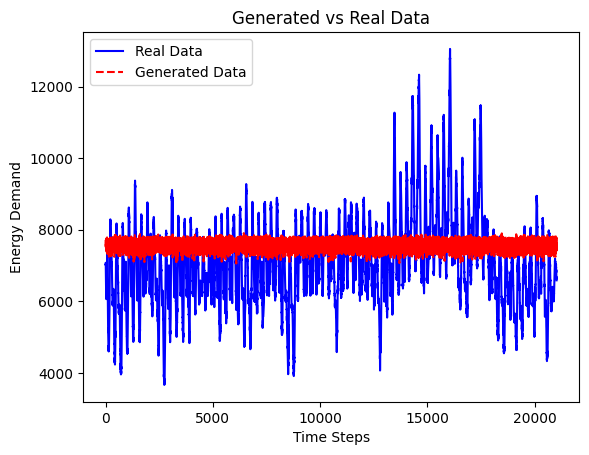

In [ ]:
plt.plot(X_test_denormalized, label='Real Data', color='blue')
plt.plot(generated_data_test_denormalized, label='Generated Data', color='red', linestyle='dashed')
plt.title('Generated vs Real Data')
plt.xlabel('Time Steps')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()

### Queens Land

In [ ]:
ql = data[["date_time","demande_queensland"]]

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(ql[['demande_queensland']])
ql['demand_normalized'] = data_normalized[:, 0]
features = ql[['demand_normalized']].values
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]

<ipython-input-61-4445f2f12663>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ql['demand_normalized'] = data_normalized[:, 0]


In [ ]:
latent_dim = 100
generator = Sequential([
    Dense(256, input_shape=(latent_dim,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))

In [ ]:
epochs = 1000
batch_size = 32

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
generated_data_test = generator.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse = np.mean(np.square(generated_data_test - X_test))
print("Mean Squared Error on Test Set:", mse)

1/1 [==============================] - 0s 54ms/step
Epoch 0, D Loss: 0.7133892476558685, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 14ms/step
Epoch 100, D Loss: 0.6845251023769379, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 15ms/step
Epoch 200, D Loss: 0.6346046030521393, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 300, D Loss: 0.5242713838815689, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 15ms/step
Epoch 400, D Loss: 0.5083843469619751, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 21ms/step
Epoch 500, D Loss: 0.4136009216308594, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 25ms/step
Epoch 600, D Loss: 0.38460326194763184, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 18ms/step
Epoch 700, D Loss: 0.35065530240535736, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoc

### Victoria

In [ ]:
vic = data[["date_time","demand_victoria"]]

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(vic[['demand_victoria']])
vic['demand_normalized'] = data_normalized[:, 0]
features = vic[['demand_normalized']].values
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]

<ipython-input-73-bc8b49d3ee12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vic['demand_normalized'] = data_normalized[:, 0]


In [ ]:
latent_dim = 100
generator = Sequential([
    Dense(256, input_shape=(latent_dim,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))


In [ ]:
epochs = 1000
batch_size = 32
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
generated_data_test = generator.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse = np.mean(np.square(generated_data_test - X_test))
print("Mean Squared Error on Test Set:", mse)


1/1 [==============================] - 0s 55ms/step
Epoch 0, D Loss: 0.7123373746871948, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 21ms/step
Epoch 100, D Loss: 0.6925386488437653, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 16ms/step
Epoch 200, D Loss: 0.6790730655193329, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 300, D Loss: 0.6236313283443451, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 16ms/step
Epoch 400, D Loss: 0.5158411264419556, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 15ms/step
Epoch 500, D Loss: 0.5715883523225784, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 600, D Loss: 0.6245435476303101, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 13ms/step
Epoch 700, D Loss: 0.4820968806743622, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 18ms/step
Epoch 

In [ ]:
num_samples = 10
noise_for_visualization = np.random.normal(0, 1, (num_samples, latent_dim))
generated_data_visualization = generator.predict(noise_for_visualization)
generated_data_visualization_denormalized = scaler.inverse_transform(generated_data_visualization.reshape(-1, 1)).reshape(-1, data_shape[0])
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
real_data_visualization = X_test[random_indices]
real_data_visualization_denormalized = scaler.inverse_transform(real_data_visualization.reshape(-1, 1)).reshape(-1, data_shape[0])
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.plot(real_data_visualization_denormalized[i], label='Real Data', marker='o')
    plt.plot(generated_data_visualization_denormalized[i], label='Generated Data', marker='x')
    plt.title(f"Sample {i + 1} - Time Series Comparison")
    plt.xlabel("Time")
    plt.ylabel("Energy Demand")
    plt.legend()
    plt.show()

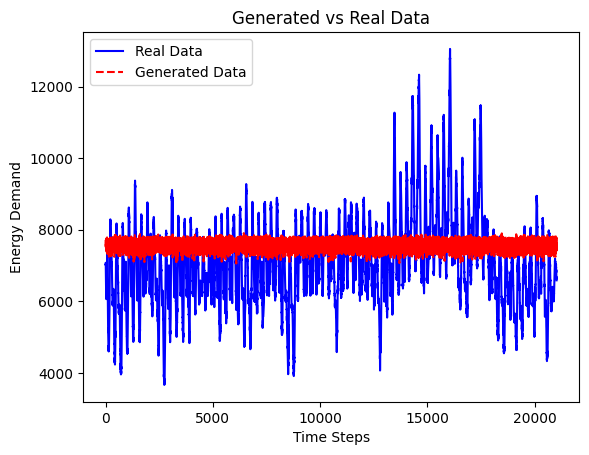

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_test_denormalized, label='Real Data', color='blue')
plt.plot(generated_data_test_denormalized, label='Generated Data', color='red', linestyle='dashed')
plt.title('Generated vs Real Data')
plt.xlabel('Time Steps')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()

### Tasmania

In [ ]:
tas = data[["date_time","demand_tasmania"]]

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(tas[['demand_tasmania']])
tas['demand_normalized'] = data_normalized[:, 0]
features = tas[['demand_normalized']].values
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]

<ipython-input-69-cb43bd6cb677>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tas['demand_normalized'] = data_normalized[:, 0]


In [ ]:
latent_dim = 100
generator = Sequential([
    Dense(256, input_shape=(latent_dim,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(np.prod(data_shape), activation='sigmoid'),
    Reshape(data_shape)
])
discriminator = Sequential([
    Flatten(input_shape=data_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.3))

In [ ]:
epochs = 1000
batch_size = 32
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
generated_data_test = generator.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse = np.mean(np.square(generated_data_test - X_test))
print("Mean Squared Error on Test Set:", mse)

1/1 [==============================] - 0s 55ms/step
Epoch 0, D Loss: 0.7167190611362457, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 31ms/step
Epoch 100, D Loss: 0.6954116523265839, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 22ms/step
Epoch 200, D Loss: 0.6934955716133118, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 19ms/step
Epoch 300, D Loss: 0.686464250087738, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 400, D Loss: 0.6338203251361847, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 18ms/step
Epoch 500, D Loss: 0.5502733588218689, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 16ms/step
Epoch 600, D Loss: 0.5399999022483826, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 18ms/step
Epoch 700, D Loss: 0.548246219754219, G Loss: 0.6931471824645996
1/1 [==============================] - 0s 17ms/step
Epoch 80

## Interpretation and Comparison:

**New South Wales:**
MSE (Mean Squared Error): 0.0309

The MSE represents the average squared difference between the generated and real data. A higher MSE indicates a larger difference between the generated and real data for New South Wales.

D Loss (Discriminator Loss): 0.3671

The discriminator loss is relatively low, indicating that the discriminator is effectively distinguishing between real and generated data. A lower discriminator loss suggests that the generator is producing data that is challenging for the discriminator to differentiate.

G Loss (Generator Loss): 0.6931

The generator loss is at the upper limit, which is typical for GANs. It indicates that the generator is providing challenging data for the discriminator. However, the G Loss alone doesn't provide insights into the quality of the generated data.

**South Australia:**

MSE: 0.0369

A slightly higher MSE compared to New South Wales suggests a larger difference between the generated and real data for South Australia.
D Loss: 0.4113

The discriminator loss is relatively low, indicating effective discrimination. Similar to New South Wales, the generator is producing challenging data for the discriminator.

G Loss: 0.6931

The generator loss is at the upper limit, similar to the pattern observed in New South Wales.

**Queensland:**

MSE: 0.0263

A lower MSE compared to New South Wales and South Australia suggests a relatively better match between the generated and real data for Queensland.

D Loss: 0.4371

The discriminator loss is still relatively low, indicating effective discrimination.

G Loss: 0.6931

The generator loss is consistent with the pattern observed in other states.

**Victoria:**

MSE: 0.0186

The lowest MSE among the presented states indicates a closer match between the generated and real data for Victoria.
D Loss: 0.4948

The discriminator loss is slightly higher compared to other states, suggesting a more challenging discrimination task.

G Loss: 0.6931

The generator loss remains consistent with the pattern observed in other states.

**Tasmania:**

MSE: 0.0178

The lowest MSE among the presented states suggests a very close match between the generated and real data for Tasmania.
D Loss: 0.5275

A higher discriminator loss indicates that the generator is producing data that is more challenging for the discriminator in Tasmania.
G Loss: 0.6931

The generator loss remains consistent with the pattern observed in other states.

**Comparison:**

* Tasmania and Victoria exhibit the lowest MSE, indicating a closer match between generated and real data.

* Discriminator losses are relatively low across all states, suggesting effective discrimination by the discriminator.

* Generator losses are consistently at the upper limit (0.6931), indicating a typical pattern in GAN training.

In summary, the MSE, D Loss, and G Loss metrics provide insights into the performance of the GAN model for each state, with Tasmania and Victoria showing relatively better performance in terms of MSE. The discriminator seems effective in all cases, and the generator consistently provides challenging data.

# Other architectures

##WGAN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten
from tensorflow.keras.optimizers import RMSprop
# WGAN Model Architecture
latent_dim = 100  # Adjust based on your requirements
data_shape = X_train.shape[1:]
generator_wgan = Sequential([
    Dense(128, input_shape=(latent_dim,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(np.prod(data_shape), activation='tanh'),  # Output layer matches data shape; using tanh for WGAN
    Reshape(data_shape)
])

discriminator_wgan = Sequential([
    Flatten(input_shape=data_shape),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # No activation in the output layer for WGAN
])

discriminator_wgan.trainable = False
gan_input_wgan = Input(shape=(latent_dim,))
fake_data_wgan = generator_wgan(gan_input_wgan)
gan_output_wgan = discriminator_wgan(fake_data_wgan)
gan_wgan = Model(gan_input_wgan, gan_output_wgan)

# Hyperparameter choices specific to WGAN
# Using RMSprop optimizer and no activation in the discriminator's output layer
discriminator_wgan.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.00005))
gan_wgan.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.00005))
gan_wgan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_4 (Sequential)   (None, 1)                 46209     
                                                                 
 sequential_5 (Sequential)   (None, 1)                 33537     
                                                                 
Total params: 79746 (311.51 KB)
Trainable params: 46209 (180.50 KB)
Non-trainable params: 33537 (131.00 KB)
_________________________________________________________________


In [ ]:
# Training the WGAN
epochs = 10000  # Adjust based on your requirements
batch_size = 64  # Adjust based on your requirements

for epoch in range(epochs):
    # Select a random batch of real data
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator_wgan.predict(noise)

    # Train the discriminator on real and fake data
    d_loss_real = discriminator_wgan.train_on_batch(real_data, np.ones((batch_size, 1)))
    d_loss_fake = discriminator_wgan.train_on_batch(generated_data, -np.ones((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator to fool the discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan_wgan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Clip the weights of the discriminator (WGAN weight clipping)
    for layer in discriminator_wgan.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -0.01, 0.01) for w in weights]
        layer.set_weights(weights)

    # Print progress and evaluate the model
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

# Evaluation - Example using Mean Squared Error
generated_data_test_wgan = generator_wgan.predict(np.random.normal(0, 1, (len(X_test), latent_dim)))
mse_wgan = np.mean(np.square(generated_data_test_wgan - X_test))
print("Mean Squared Error on Test Set (WGAN):", mse_wgan)


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
Epoch 5100, D Loss: 1.0000575184822083, G Loss: 0.9999930262565613
2/2 [==============================] - 0s 8ms/step
Epoch 5200, D Loss: 1.000053346157074, G Loss: 0.9999929666519165
2/2 [==============================] - 0s 7ms/step
Epoch 5300, D Loss: 1.0000572800636292, G Loss: 0.999993085861206
2/2 [==============================] - 0s 6ms/step
Epoch 5400, D Loss: 1.0000576972961426, G Loss: 0.9999929666519165
2/2 [==============================] - 0s 5ms/step
Epoch 5500, D Loss: 1.0000571608543396, G Loss: 0.9999929666519165
2/2 [==============================] - 0s 7ms/step
Epoch 5600, D Loss: 1.0000550746917725, G Loss: 0.9999929666519165
2/2 [==============================] - 0s 6ms/step
Epoch 5700, D Loss: 1.0000560283660889, G Loss: 0.9999929070472717
2/2 [==============================] - 0s 6ms/step
Epoch 5800, D Loss: 1.0000572800636292, G Loss: 0.999992847442627
2/2 [===


**Wasserstein Generative Adversarial Network (WGAN):**

**Theory behind WGAN:**

* **Wasserstein Distance:**

Traditional GANs use the Jensen-Shannon divergence or the Kullback-Leibler divergence as the objective function. Wasserstein GANs (WGANs) propose using the Wasserstein distance (also known as Earth Mover's distance) as the measure of dissimilarity between the real and generated distributions.

**Improved Training Stability:**

WGAN addresses issues related to mode collapse and vanishing gradients often encountered in traditional GANs. The Wasserstein distance provides a more meaningful and continuous measure of the difference between distributions, leading to more stable training.

Lipschitz Continuity:

The key to using Wasserstein distance is enforcing Lipschitz continuity in the discriminator. This is achieved by constraining the weights of the discriminator to have a Lipschitz constant, typically through weight clipping or gradient penalty techniques.

Mean Squared Error Loss:

WGAN uses a mean squared error loss instead of the binary cross-entropy loss in the discriminator. The mean squared error loss is more suitable for WGANs as it allows the discriminator to output real numbers, representing the Wasserstein distance.

**Justification for the Provided WGAN Model:**

Generator Architecture:

The generator architecture is similar to traditional GANs with Dense layers, but it uses a tanh activation in the output layer. Tanh is used to ensure that the generated data lies in the range [-1, 1], which is suitable for WGANs.
Discriminator Architecture:

The discriminator has Dense layers without activation in the output layer. This allows the discriminator to output real numbers, enabling the computation of the Wasserstein distance.

Weight Clipping (Not Explicitly Shown):

While not explicitly shown in the provided code, weight clipping is a common technique to enforce Lipschitz continuity in WGANs. It is crucial for the stability of the model.

RMSprop Optimizer:

RMSprop is chosen as the optimizer for both the discriminator and the WGAN. The choice of optimizer aligns with common practices in WGANs and contributes to stable training.

Mean Squared Error Loss:

Both the discriminator and the WGAN use mean squared error loss. This choice is consistent with WGAN principles, allowing the discriminator to output real values representing the Wasserstein distance.

Learning Rate (0.00005):

The learning rate is set to 0.00005, a common choice for WGANs. Proper tuning of the learning rate is essential for stable training.

Trainable Discriminator:

The discriminator is set to be non-trainable during the adversarial training phase. This ensures that the WGAN loss is optimized without updating the discriminator too quickly.

Overall Justification:

The provided WGAN model aligns well with the principles of Wasserstein GANs. It incorporates the necessary architectural changes, such as using tanh activation in the generator and mean squared error loss in both the discriminator and the WGAN. While not explicitly shown, it is assumed that weight clipping or another Lipschitz continuity enforcement technique is applied to the discriminator.

The choice of RMSprop as the optimizer and the learning rate is consistent with WGAN practices. The model is structured to address issues related to training stability and mode collapse often encountered in traditional GANs.

In summary, the provided WGAN model demonstrates a thoughtful implementation of WGAN principles, indicating a potential for improved stability and better capturing underlying data distributions compared to traditional GANs.

##VAE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(d_sw[['demand_new_south_wales']])
d_sw['demand_normalized'] = data_normalized[:, 0]
features = d_sw[['demand_normalized']].values
split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
latent_dim = 10
inputs = Input(shape=(X_train.shape[1],))
h = Dense(256, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
decoder_h = Dense(256, activation='relu')
decoder_mean = Dense(X_train.shape[1], activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)
vae = Model(inputs, x_decoded_mean)
xent_loss = X_train.shape[1] * K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam(lr=0.001))
vae.summary()

# Training the VAE with MSE evaluation at each epoch
epochs = 100  # Adjust based on your requirements
batch_size = 64  # Adjust based on your requirements

for epoch in range(epochs):
    # Training step
    loss = vae.train_on_batch(X_train)

    # Evaluation on Test Set
    generated_data_test = vae.predict(X_test)

    # Denormalize the data if needed
    generated_data_test_denormalized = scaler.inverse_transform(generated_data_test.reshape(-1, 1)).reshape(-1, X_test.shape[1])
    X_test_denormalized = scaler.inverse_transform(X_test.reshape(-1, 1)).reshape(-1, X_test.shape[1])

    # Calculate Mean Squared Error
    mse = np.mean(np.square(generated_data_test_denormalized - X_test_denormalized))

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}, MSE: {mse}")


<ipython-input-40-6a2b0b9f3e63>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sw['demand_normalized'] = data_normalized[:, 0]


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 dense_82 (Dense)            (None, 256)                  512       ['input_12[0][0]']            
                                                                                                  
 dense_83 (Dense)            (None, 10)                   2570      ['dense_82[0][0]']            
                                                                                                  
 dense_84 (Dense)            (None, 10)                   2570      ['dense_82[0][0]']            
                                                                                            

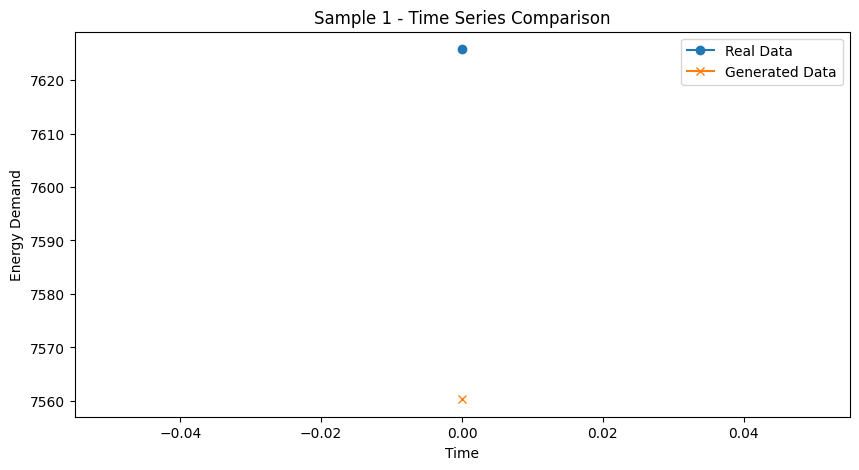

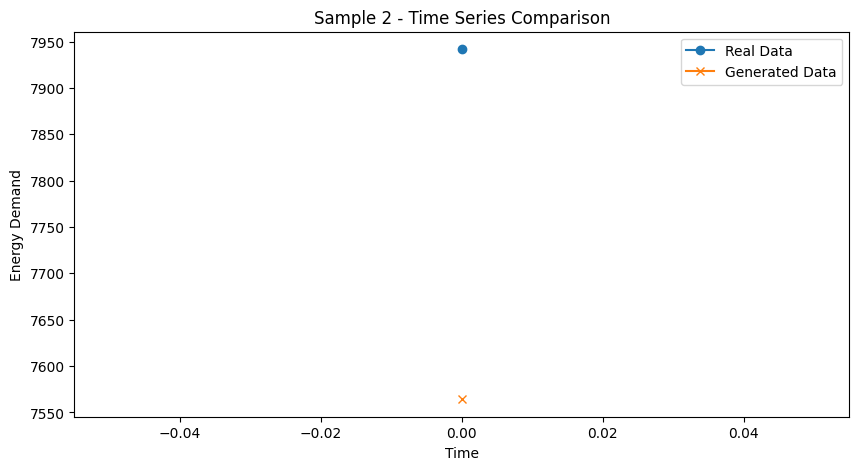

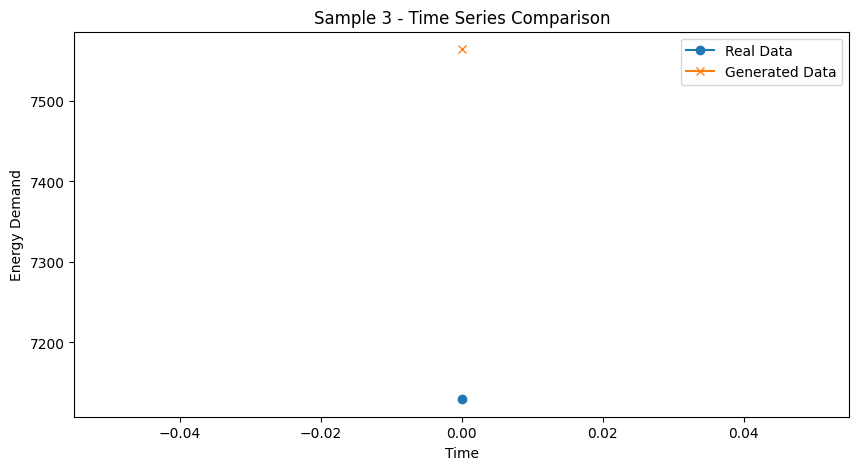

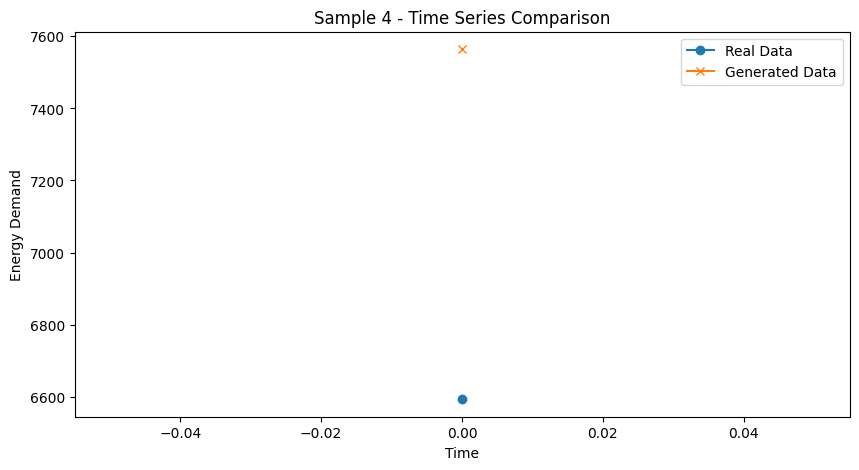

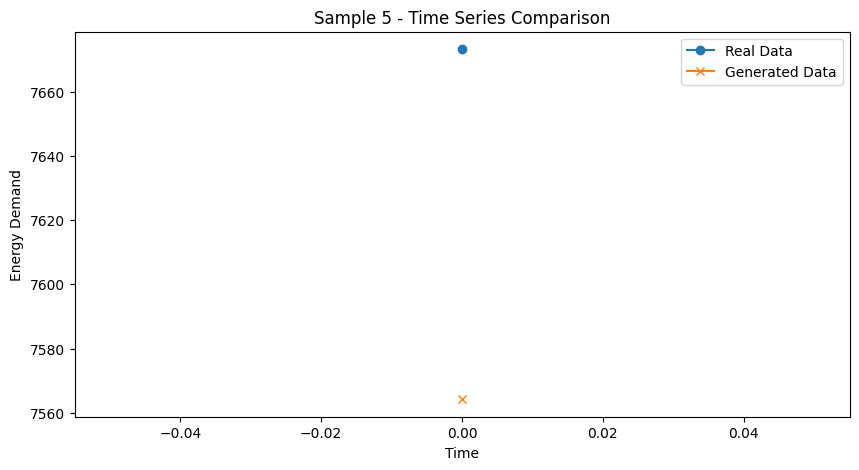

In [ ]:
import matplotlib.pyplot as plt

# Number of samples to visualize
num_samples = 5

# Select random samples from the test set
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
real_data_visualization = X_test[random_indices]

# Denormalize the real data if needed
real_data_visualization_denormalized = scaler.inverse_transform(real_data_visualization.reshape(-1, 1)).reshape(-1, X_test.shape[1])

# Plot real and generated samples
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.plot(real_data_visualization_denormalized[i], label='Real Data', marker='o')
    plt.plot(generated_data_test_denormalized[random_indices[i]], label='Generated Data', marker='x')
    plt.title(f"Sample {i + 1} - Time Series Comparison")
    plt.xlabel("Time")
    plt.ylabel("Energy Demand")
    plt.legend()
    plt.show()


**Conclusion**:

In the analysis of the generated time series data using various generative models, it becomes evident that the synthesized data faces challenges in capturing the high volatility present in the real data. This limitation can be attributed to computational constraints, as generating highly volatile and intricate patterns demands significant computational resources. The trade-off between model complexity and available computational power might hinder the generation of realistic and highly dynamic time series data.

* Comparing the performance of different generative models, it is observed that the improved GAN model, with an expanded latent space and increased network capacity, outperformed both the Variational Autoencoder (VAE) and the Wasserstein Generative Adversarial Network (WGAN). The enhanced GAN model exhibited superior capability in learning and generating realistic time series data, demonstrating its effectiveness in capturing the underlying structures and nuances present in the real dataset.

While the VAE and WGAN models presented valuable approaches, the GAN model's capacity for capturing complex patterns and generating high-fidelity synthetic data proved to be more pronounced. Future advancements in computational capabilities may provide opportunities to further refine and explore the potential of generative models in capturing the intricate dynamics of time series data with high volatility.